In [133]:
# Open Json file
!pip install tqdm

In [395]:
import os
import sys
import json
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [396]:
file_0 = "C:0_Posts_PSAW-PRAW_controversial_batch_0_999.json"  # "Seed" for the full dataframe.

In [397]:
# Se añadirán al dataframe después de la anterior, por orden.
files_list = ["C:1_Posts_PSAW-PRAW_controversial_batch_1000_1999.json",
         "C:2_Posts_PSAW-PRAW_controversial_batch_2000_2999.json", "C:3_Posts_PSAW-PRAW_controversial_batch_3000_3999.json",
         "C:4_Posts_PSAW-PRAW_controversial_batch_4000_4999.json", "C:5_Posts_PSAW-PRAW_controversial_batch_5000_5999.json",
         "C:6_Posts_PSAW-PRAW_controversial_batch_6000_6999.json"]

In [101]:
type(files)

list

In [398]:
results_df = pd.DataFrame()

with open(file_0) as f_json:
    batch_0 = json.load(f_json)
    results_df = pd.DataFrame(batch_0)

# Recogemos el primer "batch" de datos incluyendo en este caso el "header" de títulos.



In [103]:
results_df

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,comments
0,vnl86g,"Ethnicity isn’t something that can be changed,...",ZaMeneDushaDava,1.656524e+09,1,0.57,12,Left wing liberals usually think that ethnicit...,<praw.models.comment_forest.CommentForest obje...
1,vn82rq,Assuming someones gender or ethnicity based on...,donotholdyourbreath,1.656481e+09,4,0.70,7,Unless you are willing to do that for every op...,<praw.models.comment_forest.CommentForest obje...
2,vn41at,The Tucker Carlson Tonight show gets unfair cr...,IMEUF,1.656468e+09,6,0.58,12,I think the strongest criticism comes from peo...,<praw.models.comment_forest.CommentForest obje...
3,vn2jmj,"It's time for federal abortion legislation, bu...",YourEyesAreBleeding,1.656464e+09,0,0.50,28,The left is calling for federal laws that ensh...,<praw.models.comment_forest.CommentForest obje...
4,vn1kii,Sex workers develop men romantically.,princessscarlet12,1.656461e+09,24,0.68,28,"As a stripper, I have had to explain feminine ...",<praw.models.comment_forest.CommentForest obje...
...,...,...,...,...,...,...,...,...,...
328,uqwyyb,r/AgainstDegenerateSubs Is the most degenerate...,EarthenPersen,1.652711e+09,1,0.52,25,All they seem to do is skim around for posts t...,<praw.models.comment_forest.CommentForest obje...
329,uqscvh,The anti-education anti college trend is dange...,Crafty-Bunch-2675,1.652695e+09,107,0.68,149,If you type college into a google or a youtube...,<praw.models.comment_forest.CommentForest obje...
330,uqo2ph,The prevalence of white hate is exaggerated,None,1.652677e+09,6,0.54,71,[deleted],<praw.models.comment_forest.CommentForest obje...
331,uqnyzo,The West is not better than in slavery times,ballsofstyle,1.652677e+09,0,0.38,18,In our own narrative the liberal west feels a ...,<praw.models.comment_forest.CommentForest obje...


In [399]:
batch = pd.DataFrame()

In [400]:
# Añadimos el resto de ficheros al dataframe.

for file in files_list:
    with open(file) as f_json:
        batch = json.load(f_json)  # Cargamos un fichero .json parcial
        batch = pd.DataFrame(batch)  # Convertimos a dataframe pandas.
        results_df = pd.concat([results_df, batch], ignore_index = True)  # Consolidamos en un único fichero.
        
        print("Added " + str(file) + " to the dataframe.")

Added C:1_Posts_PSAW-PRAW_controversial_batch_1000_1999.json to the dataframe.
Added C:2_Posts_PSAW-PRAW_controversial_batch_2000_2999.json to the dataframe.
Added C:3_Posts_PSAW-PRAW_controversial_batch_3000_3999.json to the dataframe.
Added C:4_Posts_PSAW-PRAW_controversial_batch_4000_4999.json to the dataframe.
Added C:5_Posts_PSAW-PRAW_controversial_batch_5000_5999.json to the dataframe.
Added C:6_Posts_PSAW-PRAW_controversial_batch_6000_6999.json to the dataframe.


In [401]:
len(results_df)  # Tenemos 1881 posts.

1881

In [107]:
results_df   # We join the dataframes into one.

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,comments
0,vnl86g,"Ethnicity isn’t something that can be changed,...",ZaMeneDushaDava,1.656524e+09,1,0.57,12,Left wing liberals usually think that ethnicit...,<praw.models.comment_forest.CommentForest obje...
1,vn82rq,Assuming someones gender or ethnicity based on...,donotholdyourbreath,1.656481e+09,4,0.70,7,Unless you are willing to do that for every op...,<praw.models.comment_forest.CommentForest obje...
2,vn41at,The Tucker Carlson Tonight show gets unfair cr...,IMEUF,1.656468e+09,6,0.58,12,I think the strongest criticism comes from peo...,<praw.models.comment_forest.CommentForest obje...
3,vn2jmj,"It's time for federal abortion legislation, bu...",YourEyesAreBleeding,1.656464e+09,0,0.50,28,The left is calling for federal laws that ensh...,<praw.models.comment_forest.CommentForest obje...
4,vn1kii,Sex workers develop men romantically.,princessscarlet12,1.656461e+09,24,0.68,28,"As a stripper, I have had to explain feminine ...",<praw.models.comment_forest.CommentForest obje...
...,...,...,...,...,...,...,...,...,...
1876,pmju6n,[deleted by user],None,1.631411e+09,1,0.52,14,[removed],<praw.models.comment_forest.CommentForest obje...
1877,pmgqro,I’m ok with a vaccine mandate,Orginal_Ricardo,1.631399e+09,42,0.62,243,This might be popular in a broad sense but it ...,<praw.models.comment_forest.CommentForest obje...
1878,pmg3ee,America seriously needs to move on from 9/11.,MySockHurts,1.631397e+09,0,0.47,88,[removed],<praw.models.comment_forest.CommentForest obje...
1879,pme498,People who hate Wall Street are people who don...,gaudog,1.631390e+09,8,0.60,11,I'm not a financial genius or anything but I'd...,<praw.models.comment_forest.CommentForest obje...


In [441]:
results_df["score"].describe()

# Vemos que 

count    1881.000000
mean        7.090909
std        18.520539
min         0.000000
25%         0.000000
50%         1.000000
75%         7.000000
max       265.000000
Name: score, dtype: float64

In [442]:
results_df["upvote_ratio"].describe()

count    1881.000000
mean        0.516353
std         0.128206
min         0.070000
25%         0.430000
50%         0.530000
75%         0.620000
max         0.700000
Name: upvote_ratio, dtype: float64

In [444]:
results_df["num_comments"].describe()

count    1881.000000
mean       38.185540
std        58.960365
min         5.000000
25%        11.000000
50%        20.000000
75%        43.000000
max       797.000000
Name: num_comments, dtype: float64

In [108]:
results_df.iloc[1879]["selftext"]

"I'm not a financial genius or anything but I'd bet if you threw your money into an index fund while you're young like the SP500 and leave it alone for a couple decades, history has shown you'll end up richer than you were from when you started.  Yes this is called an investment.  It's so easy you could get a monkey to throw darts to pick a bunch of stocks and make money off it after a couple decades.  People who hate Wall Street hate it because they aren't using it to make money, or have bet on speculative yolo stock gambles. Because Wall Street can make money for everybody. The rich and poor and in-between."

In [109]:
results_df.iloc[1880]["selftext"]

'[removed]'

In [110]:
# Exploración...

for i in (range(len(results_df))):
    print(results_df.iloc[i]["title"])
    print(results_df.iloc[i]["selftext"])
    print(i)

Ethnicity isn’t something that can be changed, it’s inherited.
Left wing liberals usually think that ethnicity is something one can choose or that it’s entirely a cultural thing, while ethnicity is certainly cultural to a very large extent that isn’t the only aspect of it, it’s also a matter of ancestry, if a French man and a Russian woman have a kid born and raised in Germany that kid will **not** be ethnically German in any way, a German citizen? Yes, of course. Culturally German? Very much possible. **Ethnically** German? No, ethnically can’t be chosen, if you’re born a specific ethnicity you can’t change it.

Liberals say this is racist but i don’t see how that’s the case, i am **not** in **any way** saying a person should be treated a certain way based on their ethnicity, but to pretend that ethnicity is entirely cultural and that ancestry has no role in defining it just isn’t true.
0
Assuming someones gender or ethnicity based on their opinion is dumb and hypocritical
Unless you 

Living at the same time as Elon Musk is probably what it was like living at the same time as Moses, Jesus, and Muhammad.
Our vocabulary is different now and our frame of reference is different, but the feeling is still the same. Musk buying Twitter is like Moses going into Pharaoh's court and demanding to let my people go, or jesus going into the temple and kicking out the money changers.  It's am act of defiance against the status quo.  

Musk is building rocket ships to colonize Mars.  That's as interesting and amazing as anything Moses, Jesus or Muhammad ever claimed to do.  

Also, most people either love him or hate him.  But, regardless of your opinion, everybody knows him.  And everybody realizes that he's different.  He's not the same as the rest of us.  

He's like a goddamned prophet.
512
Banning abortions creates more unhappy men.
Women don’t really like being forced into parenthood but who cares about what they want, right? However, I assume the men who helped get them preg

Think about it.
1031
people on the internet really aren't interested in understanding other's points of view they just want to mindlessly react to everything
[removed]
1032
[deleted by user]
[removed]
1033
If you are a guy and you like Futanaris, that does not make you gay.
Quite the opposite in fact; I myself am a Heteroromantic Asexual guy, and I have noticed that, straight guys will often question their sexuality, just because they like women that happen to have male genitalia. Just because she has that appendage, and you still fantasize about sexually interacting with male genitalia; than this could mean the following possibility

You are still straight and only attracted romantically to women; it's just that, due to a combination of it being taboo, and finding it to be interesting, you are willing to ignore what society deems to be "straight" and still be willing to sexually interact with such a woman; and possibly still loving her on spite of her male genitalia; and you show that

But I think even if it were true that lots of incels turn violent, I think that can be fixed with you should go to jail if you hurt someone. Being lonely sucks, but I think (and I think this is the key unpopular part) no society needs to ensure you get the partner you want. Those incels either need to live with it and understand it or I don't feel sorry for them going to jail. Its not jail time for lonely people, its jail for those that act on it.
1526
[deleted by user]
[removed]
1527
People are being way too sympathetic towards Alec Baldwin
In case you haven't heard, Baldwin accidently killed a woman on the set of a movie.

It's bizarre how quickly people have come out to comfort Baldwin. Yes, I'm certain he feels terrible. But someone died; the victim should be the primary focus of people's sympathies. People are tripping over each other to circlejerk about the remorse the actor must feel, who is soon going to overcome this and return to being a millionaire celebrity. 

It's also wor

In [407]:
# Consolidamos los datos:

sys.setrecursionlimit(10000)   # <-- Parece no funcionar, si no.
results_df.to_json(r'.\Posts_PSAW-PRAW_controversial_CONSOLIDATED.json', default_handler=str)
# En el paso anterior parecía necesario usar "str" como default_handler. Si no, volvía a quejarse de "demasiada recursión".

In [112]:
results_df

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,comments
0,vnl86g,"Ethnicity isn’t something that can be changed,...",ZaMeneDushaDava,1.656524e+09,1,0.57,12,Left wing liberals usually think that ethnicit...,<praw.models.comment_forest.CommentForest obje...
1,vn82rq,Assuming someones gender or ethnicity based on...,donotholdyourbreath,1.656481e+09,4,0.70,7,Unless you are willing to do that for every op...,<praw.models.comment_forest.CommentForest obje...
2,vn41at,The Tucker Carlson Tonight show gets unfair cr...,IMEUF,1.656468e+09,6,0.58,12,I think the strongest criticism comes from peo...,<praw.models.comment_forest.CommentForest obje...
3,vn2jmj,"It's time for federal abortion legislation, bu...",YourEyesAreBleeding,1.656464e+09,0,0.50,28,The left is calling for federal laws that ensh...,<praw.models.comment_forest.CommentForest obje...
4,vn1kii,Sex workers develop men romantically.,princessscarlet12,1.656461e+09,24,0.68,28,"As a stripper, I have had to explain feminine ...",<praw.models.comment_forest.CommentForest obje...
...,...,...,...,...,...,...,...,...,...
1876,pmju6n,[deleted by user],None,1.631411e+09,1,0.52,14,[removed],<praw.models.comment_forest.CommentForest obje...
1877,pmgqro,I’m ok with a vaccine mandate,Orginal_Ricardo,1.631399e+09,42,0.62,243,This might be popular in a broad sense but it ...,<praw.models.comment_forest.CommentForest obje...
1878,pmg3ee,America seriously needs to move on from 9/11.,MySockHurts,1.631397e+09,0,0.47,88,[removed],<praw.models.comment_forest.CommentForest obje...
1879,pme498,People who hate Wall Street are people who don...,gaudog,1.631390e+09,8,0.60,11,I'm not a financial genius or anything but I'd...,<praw.models.comment_forest.CommentForest obje...


In [119]:
for i in range(1, 10):
    print(results_df.iloc[i])

id                                                         vn82rq
title           Assuming someones gender or ethnicity based on...
author                                        donotholdyourbreath
created_utc                                          1656480822.0
score                                                           4
upvote_ratio                                                  0.7
num_comments                                                    7
selftext        Unless you are willing to do that for every op...
comments        <praw.models.comment_forest.CommentForest obje...
Name: 1, dtype: object
id                                                         vn41at
title           The Tucker Carlson Tonight show gets unfair cr...
author                                                      IMEUF
created_utc                                          1656468033.0
score                                                           6
upvote_ratio                                         

In [ ]:
# Podemos ordenar el dataframe de mayor a menor en función de la ratio de votos positivos,
# o del número de comentarios.

In [408]:
results_df_arrange = results_df

In [413]:
results_df_arranged_ratio = results_df_arrange.sort_values(by=['upvote_ratio'])

In [418]:
results_df_arranged_ratio.head(20)

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,comments
684,thkeny,The Golden Rule is a somewhat lef⁠tist concept...,verystockbro,1.647653e+09,0,0.07,15,According to Wikipedia:\n\n“The Golden Rule is...,<praw.models.comment_forest.CommentForest obje...
788,t1o1aj,[deleted by user],None,1.645850e+09,0,0.07,5,[removed],<praw.models.comment_forest.CommentForest obje...
958,seqyox,80s relationships are full of covert racism an...,Thick-Nature8555,1.643377e+09,0,0.09,5,Here are some trends that I am seeing from cas...,<praw.models.comment_forest.CommentForest obje...
310,utdnzb,"North Korea is a good country, the USA is not.",None,1.652996e+09,0,0.11,18,[deleted],<praw.models.comment_forest.CommentForest obje...
7,vmlcje,Childless people should not be eligible for pe...,dangerousman8,1.656417e+09,0,0.11,7,[removed],<praw.models.comment_forest.CommentForest obje...
125,vcbqlx,All supernatural and unproven science fiction ...,Moist_Flan_1159,1.655236e+09,0,0.12,36,"I believe that all supernatural creatures, wor...",<praw.models.comment_forest.CommentForest obje...
249,uz3bd6,"It's easy to say ""cops should run head first i...",None,1.653673e+09,0,0.13,10,[deleted],<praw.models.comment_forest.CommentForest obje...
373,ume57i,"""Free Tibet"" is dumb, at least if you don't li...",ImaPredditor,1.652172e+09,0,0.14,7,\n\nFree Tibet is one of the most stupid mov...,<praw.models.comment_forest.CommentForest obje...
836,svptmk,Conservatives need to f off with their victim-...,the_turt,1.645211e+09,0,0.14,19,Seeing how this is an unpopular opinion in my ...,<praw.models.comment_forest.CommentForest obje...
579,twgpmd,Parents using verbal rebuke and emotional with...,None,1.649115e+09,0,0.15,12,One of parents' main jobs is to prepare their ...,<praw.models.comment_forest.CommentForest obje...


In [419]:
results_df_arranged_ratio.tail(8)

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,comments
854,st606c,being a coward isnt necessarily a character flaw,donotholdyourbreath,1.644940e+09,9,0.7,21,A coward that runs away from war lives to see ...,<praw.models.comment_forest.CommentForest obje...
1583,q953xr,People who still think that the United States ...,Cookiecuttermaxy,1.634360e+09,14,0.7,22,I think the first impressions that come to peo...,<praw.models.comment_forest.CommentForest obje...
862,srs0er,Bringing up 'the other groups' horrible things...,WaterDemonPhoenix,1.644784e+09,9,0.7,14,If I point out my disagreements with the Quran...,<praw.models.comment_forest.CommentForest obje...
1684,q0r5jm,Canadian servers don't have a reason to compla...,donotholdyourbreath,1.633296e+09,5,0.7,9,"Just a quick glance, a lot of provinces server...",<praw.models.comment_forest.CommentForest obje...
1298,r7dqa0,The obsession with sex work here needs to stop,finnjakefionnacake,1.638469e+09,24,0.7,306,"I rarely make ""response"" posts here, but it's ...",<praw.models.comment_forest.CommentForest obje...
146,v8zuih,"FDS sucks, but there are just as many misandri...",cakebats,1.654837e+09,18,0.7,27,"I'm not a fan of r/FDS, I think it's shallow a...",<praw.models.comment_forest.CommentForest obje...
271,uxo8qy,"As a leftist, I think Democrats should give up...",None,1.653505e+09,25,0.7,77,[deleted],<praw.models.comment_forest.CommentForest obje...
423,ufh6xg,"There is a big loophole in the ""pro-choice"" mo...",Cut-Unique,1.651344e+09,36,0.7,81,"So, I am pro-choice. But I have a different de...",<praw.models.comment_forest.CommentForest obje...


In [405]:
# SENTIMENT ANALYSIS

In [120]:
from pysentimiento import create_analyzer
sent_analyzer = create_analyzer(task="sentiment", lang="en")

In [138]:
prediction_list = []
for index, row in results_df.iterrows():
    print(row["id"])
    test_title = row["title"]
    prediction_list.append(sent_analyzer.predict(test_title))
    print(index)
    print(prediction)

vnl86g
0
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vn82rq
1
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vn41at
2
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vn2jmj
3
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vn1kii
4
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vmp9di
5
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vmm2vb
6
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vmlcje
7
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vmg26k
8
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vmet37
9
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vm9xva
10
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vm9cjn
11
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vm5jo5
12
AnalyzerOutput(o

101
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vf3f5h
102
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vem5oh
103
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vekbat
104
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vegic7
105
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vefreo
106
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
veezz2
107
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ve4xs8
108
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vdzm5s
109
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vdoa5o
110
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vdnsdj
111
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vdnnp6
112
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
vdl7hu
113


200
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3o9hd
201
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3nc00
202
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3mhs4
203
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3lpmh
204
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3jh1x
205
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3jfto
206
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v3i5tn
207
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v36l25
208
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v35j1v
209
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v34nn3
210
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v2xj1e
211
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
v2tf85
212


299
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uu7fuc
300
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uu4qju
301
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uu495o
302
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uu0l3x
303
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
utw0fr
304
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uto22h
305
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
utnqgd
306
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
utjqbb
307
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
utiqou
308
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uteacx
309
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
utdnzb
310
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
utc7gb
311


399
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uix991
400
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uirp4w
401
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uib4x2
402
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ui9ug6
403
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ui66si
404
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ui3t59
405
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ui1ej3
406
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uhtcsj
407
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uhr95y
408
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uhqcic
409
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uhm3bg
410
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
uhm2av
411


498
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u582y7
499
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u57250
500
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u55zns
501
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u554xa
502
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u51kkv
503
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u4zi58
504
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u4yfgh
505
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u4vzi9
506
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u4vttp
507
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u4sbp6
508
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u4r663
509
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
u41r7q
510


599
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tstsmd
600
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tscwud
601
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tscwsy
602
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tsci34
603
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ts43gx
604
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
trvwnu
605
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
trulrx
606
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tra2ql
607
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tr8mvu
608
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tqx1hl
609
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tqu7d8
610
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tqp3d8
611


699
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
te7nn7
700
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tdn21b
701
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tdbv16
702
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
td7140
703
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tcv69e
704
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tcp00x
705
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tcf43t
706
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tcagdt
707
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tc7m17
708
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tbyo7d
709
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tbr9q4
710
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
tbe5yo
711


800
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0pysn
801
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0o5rd
802
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0j0yo
803
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0h6yh
804
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0f6kl
805
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0e3t1
806
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t0dxlj
807
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t06d6v
808
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
t034ly
809
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
szzo48
810
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
szq220
811
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
szczo1
812


899
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
snc8xw
900
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
snbmk4
901
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
sn4kg1
902
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
sn2rf2
903
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
smxf5a
904
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
smnlu2
905
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
smjohr
906
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
smf3b2
907
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
sm0qbx
908
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
slqoji
909
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
slpggb
910
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
sll15n
911


998
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s8wbfj
999
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s8klyn
1000
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s8kdio
1001
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s8he3f
1002
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s8a72x
1003
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s830li
1004
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s82s75
1005
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s7zxvx
1006
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s7q9xy
1007
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s7jczu
1008
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s7hnas
1009
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
s

1096
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
runrgt
1097
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rul5y6
1098
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ruka4u
1099
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ruj1qb
1100
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ruhkw2
1101
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ruen5k
1102
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ruefcf
1103
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ru944q
1104
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ru58fz
1105
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ru0ev0
1106
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ru036t
1107
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1194
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rjnech
1195
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rjdcnu
1196
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rjbnuj
1197
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rjbgxu
1198
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rjb1n6
1199
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rj7y1o
1200
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rj522u
1201
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rj43zh
1202
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rj10u1
1203
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
rinqmk
1204
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ri9uvw
1205
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1294
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7oig1
1295
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7myxe
1296
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7e8zr
1297
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7dqa0
1298
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7cqk1
1299
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7bxzh
1300
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r79ahq
1301
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r78j4c
1302
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r7664t
1303
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r6z7e5
1304
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
r6urhk
1305
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1393
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qxbuoj
1394
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qx6lmf
1395
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qwraka
1396
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qw5uhp
1397
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qw58ko
1398
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qw3a1h
1399
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qw2284
1400
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qw1wa1
1401
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qvkfzl
1402
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qv6h44
1403
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qus0dz
1404
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1491
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qk8dqx
1492
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qk06nx
1493
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qjy9wq
1494
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qjuidy
1495
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qjqzyc
1496
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qje3g7
1497
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qj2g0n
1498
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qizsom
1499
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qiz4rc
1500
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qiyvfs
1501
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
qiwf8z
1502
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1593
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q86v1v
1594
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q84vah
1595
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q83ifr
1596
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q82cps
1597
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q80lsm
1598
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q80d33
1599
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q7sw4j
1600
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q7r4o1
1601
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q7glou
1602
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q7fk9p
1603
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q7ewrn
1604
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1693
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzz4lt
1694
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzypvr
1695
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzxrds
1696
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzxmz3
1697
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzwz7v
1698
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzwjsn
1699
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pzpiie
1700
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pz8t2r
1701
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pz8g9j
1702
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pz81nx
1703
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
pz5u8x
1704
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

1792
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
psceqg
1793
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
psa4xk
1794
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps8nh3
1795
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps7qqv
1796
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps7n7o
1797
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps6a9r
1798
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps67kn
1799
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps2c5g
1800
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
ps0bg2
1801
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
prwgcr
1802
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
prwfqo
1803
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})

In [149]:
prediction_list_selftext = []
for index, row in tqdm(results_df.iterrows()):
    print(row["id"])
    test_selftext = row["selftext"]
    prediction = sent_analyzer.predict(test_selftext)
    prediction_list_selftext.append(prediction)
    print(index)
    print(prediction)

0it [00:00, ?it/s]

vnl86g


1it [00:00,  2.27it/s]

0
AnalyzerOutput(output=NEU, probas={NEU: 0.857, NEG: 0.135, POS: 0.008})
vn82rq


2it [00:00,  2.37it/s]

1
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.039, POS: 0.003})
vn41at


3it [00:01,  2.58it/s]

2
AnalyzerOutput(output=NEU, probas={NEU: 0.759, NEG: 0.170, POS: 0.071})
vn2jmj


4it [00:01,  2.51it/s]

3
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.087, POS: 0.003})
vn1kii


5it [00:02,  2.37it/s]

4
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.084, POS: 0.003})
vmp9di


6it [00:02,  2.31it/s]

5
AnalyzerOutput(output=NEG, probas={NEG: 0.771, NEU: 0.222, POS: 0.007})
vmm2vb


7it [00:02,  2.32it/s]

6
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
vmlcje
7
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vmg26k


9it [00:03,  2.91it/s]

8
AnalyzerOutput(output=NEG, probas={NEG: 0.642, NEU: 0.351, POS: 0.007})
vmet37


10it [00:03,  2.78it/s]

9
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
vm9xva


11it [00:04,  2.71it/s]

10
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
vm9cjn


12it [00:04,  2.59it/s]

11
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})
vm5jo5


14it [00:05,  2.95it/s]

12
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
vm3mn9
13
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
vm2p8q


15it [00:05,  2.77it/s]

14
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
vm1gav


16it [00:06,  2.66it/s]

15
AnalyzerOutput(output=NEU, probas={NEU: 0.963, NEG: 0.023, POS: 0.013})
vm06g8


17it [00:06,  2.59it/s]

16
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.085, POS: 0.004})
vlvcvl


18it [00:06,  2.47it/s]

17
AnalyzerOutput(output=NEG, probas={NEG: 0.830, NEU: 0.164, POS: 0.005})
vlujkf


19it [00:07,  2.37it/s]

18
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
vlub67
19
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vlnyhi


21it [00:07,  2.94it/s]

20
AnalyzerOutput(output=NEU, probas={NEU: 0.757, NEG: 0.216, POS: 0.027})
vllbxw


22it [00:08,  2.81it/s]

21
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
vlj5sv


23it [00:08,  2.64it/s]

22
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
vlag1x


26it [00:09,  4.08it/s]

23
AnalyzerOutput(output=NEU, probas={NEU: 0.502, NEG: 0.492, POS: 0.006})
vl9qvn
24
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vl854c
25
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vl166i


27it [00:09,  3.36it/s]

26
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
vkykos


28it [00:10,  2.99it/s]

27
AnalyzerOutput(output=NEU, probas={NEU: 0.901, POS: 0.081, NEG: 0.018})
vkus1e


29it [00:10,  2.78it/s]

28
AnalyzerOutput(output=NEU, probas={NEU: 0.475, NEG: 0.461, POS: 0.063})
vkuhkx


30it [00:11,  2.64it/s]

29
AnalyzerOutput(output=NEU, probas={NEU: 0.611, NEG: 0.381, POS: 0.008})
vkqz5e


31it [00:11,  2.59it/s]

30
AnalyzerOutput(output=NEG, probas={NEG: 0.785, NEU: 0.210, POS: 0.005})
vkoe79


32it [00:11,  2.56it/s]

31
AnalyzerOutput(output=NEG, probas={NEG: 0.837, NEU: 0.158, POS: 0.004})
vknv2e


33it [00:12,  2.64it/s]

32
AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})
vknrfy


34it [00:12,  2.81it/s]

33
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.041, POS: 0.003})
vkm06f


35it [00:12,  2.69it/s]

34
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
vklmac


36it [00:13,  2.58it/s]

35
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
vkkdko


37it [00:13,  2.57it/s]

36
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
vkj74o


38it [00:14,  2.48it/s]

37
AnalyzerOutput(output=NEU, probas={NEU: 0.956, NEG: 0.030, POS: 0.014})
vkirwt


41it [00:14,  4.04it/s]

38
AnalyzerOutput(output=NEG, probas={NEG: 0.542, NEU: 0.453, POS: 0.006})
vkir4p
39
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vkd9c5
40
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vkctzv


42it [00:15,  3.42it/s]

41
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.027, POS: 0.003})
vkbxuj


43it [00:15,  3.05it/s]

42
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
vkamf8


44it [00:16,  2.88it/s]

43
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
vk7qgu


45it [00:16,  2.73it/s]

44
AnalyzerOutput(output=NEG, probas={NEG: 0.834, NEU: 0.161, POS: 0.005})
vk7gr2
45
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vk6p4n


47it [00:16,  3.48it/s]

46
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.146, POS: 0.006})
vk65zz


48it [00:17,  3.18it/s]

47
AnalyzerOutput(output=NEU, probas={NEU: 0.657, POS: 0.251, NEG: 0.092})
vk2zcy


49it [00:17,  3.38it/s]

48
AnalyzerOutput(output=NEU, probas={NEU: 0.823, NEG: 0.144, POS: 0.033})
vk2q9p


52it [00:17,  4.78it/s]

49
AnalyzerOutput(output=NEU, probas={NEU: 0.703, NEG: 0.276, POS: 0.021})
vk1zle
50
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vjzx5x
51
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vjrwto
52
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vjn2q7


54it [00:18,  4.37it/s]

53
AnalyzerOutput(output=NEU, probas={NEU: 0.574, NEG: 0.420, POS: 0.006})
vjjh1t
54
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vjh0bx


56it [00:18,  4.38it/s]

55
AnalyzerOutput(output=NEG, probas={NEG: 0.695, NEU: 0.299, POS: 0.006})
vje5gb


57it [00:19,  3.73it/s]

56
AnalyzerOutput(output=NEU, probas={NEU: 0.624, NEG: 0.368, POS: 0.008})
vjcgst


58it [00:19,  3.18it/s]

57
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
vj9cvi
58
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vj7dz0


60it [00:20,  3.39it/s]

59
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.090, POS: 0.004})
vj4e7o
60
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vixs72


62it [00:20,  3.57it/s]

61
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
visat1


63it [00:21,  3.50it/s]

62
AnalyzerOutput(output=NEG, probas={NEG: 0.816, NEU: 0.180, POS: 0.004})
viqivq


64it [00:21,  3.19it/s]

63
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
vip32o


65it [00:22,  2.88it/s]

64
AnalyzerOutput(output=NEU, probas={NEU: 0.944, NEG: 0.039, POS: 0.016})
vif7rm


66it [00:22,  2.64it/s]

65
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.102, POS: 0.003})
vi9gtv


67it [00:22,  2.56it/s]

66
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})
vi8f90


68it [00:23,  2.47it/s]

67
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
vi8882


69it [00:23,  2.33it/s]

68
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
vi71i4


70it [00:24,  2.28it/s]

69
AnalyzerOutput(output=NEG, probas={NEG: 0.854, NEU: 0.142, POS: 0.004})
vi24vf


71it [00:24,  2.29it/s]

70
AnalyzerOutput(output=NEG, probas={NEG: 0.923, NEU: 0.074, POS: 0.003})
vhy38u


72it [00:25,  2.67it/s]

71
AnalyzerOutput(output=NEU, probas={NEU: 0.579, NEG: 0.412, POS: 0.009})
vhwa3i


73it [00:25,  2.58it/s]

72
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
vhoemk


74it [00:25,  2.96it/s]

73
AnalyzerOutput(output=POS, probas={POS: 0.974, NEU: 0.025, NEG: 0.001})
vhih4f


75it [00:26,  2.69it/s]

74
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.036, POS: 0.004})
vhfovh


76it [00:26,  2.59it/s]

75
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.044, POS: 0.016})
vhf8j7


77it [00:26,  2.55it/s]

76
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.092, POS: 0.004})
vher51


78it [00:27,  2.49it/s]

77
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.048, POS: 0.003})
vh65pb


79it [00:27,  2.58it/s]

78
AnalyzerOutput(output=NEG, probas={NEG: 0.794, NEU: 0.202, POS: 0.005})
vh4cuq


80it [00:28,  2.53it/s]

79
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.003})
vh42j6


81it [00:28,  2.84it/s]

80
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
vh3hkt


82it [00:28,  2.94it/s]

81
AnalyzerOutput(output=NEU, probas={NEU: 0.833, NEG: 0.156, POS: 0.011})
vh1t98


83it [00:29,  2.67it/s]

82
AnalyzerOutput(output=NEU, probas={NEU: 0.494, POS: 0.477, NEG: 0.029})
vh0n1r


84it [00:29,  2.37it/s]

83
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
vgzgaz


85it [00:30,  2.48it/s]

84
AnalyzerOutput(output=NEG, probas={NEG: 0.689, NEU: 0.302, POS: 0.009})
vgy3n4


86it [00:30,  2.46it/s]

85
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.041, POS: 0.004})
vgkt4e


87it [00:30,  2.57it/s]

86
AnalyzerOutput(output=NEU, probas={NEU: 0.965, POS: 0.020, NEG: 0.015})
vgjup4


88it [00:31,  2.20it/s]

87
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.093, POS: 0.004})
vgbvs4


89it [00:31,  2.19it/s]

88
AnalyzerOutput(output=NEU, probas={NEU: 0.829, NEG: 0.118, POS: 0.053})
vgat36


90it [00:32,  2.00it/s]

89
AnalyzerOutput(output=NEG, probas={NEG: 0.770, NEU: 0.226, POS: 0.005})
vg9pm7
90
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vg7f33


92it [00:32,  2.70it/s]

91
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.012, POS: 0.004})
vg45md


93it [00:33,  2.44it/s]

92
AnalyzerOutput(output=NEG, probas={NEG: 0.799, NEU: 0.191, POS: 0.010})
vfy8aw


94it [00:33,  2.26it/s]

93
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
vfvc9o


95it [00:34,  2.12it/s]

94
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.029, POS: 0.003})
vfulz2


96it [00:35,  2.03it/s]

95
AnalyzerOutput(output=NEG, probas={NEG: 0.519, NEU: 0.475, POS: 0.006})
vfpyie


97it [00:35,  2.05it/s]

96
AnalyzerOutput(output=NEG, probas={NEG: 0.531, NEU: 0.395, POS: 0.074})
vfp44w


98it [00:36,  2.03it/s]

97
AnalyzerOutput(output=NEG, probas={NEG: 0.909, NEU: 0.087, POS: 0.004})
vffde8


99it [00:36,  2.07it/s]

98
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
vfdh5l


100it [00:36,  2.17it/s]

99
AnalyzerOutput(output=NEU, probas={NEU: 0.967, NEG: 0.020, POS: 0.013})
vf8s9x
100
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vf7xb4


103it [00:37,  3.20it/s]

101
AnalyzerOutput(output=NEG, probas={NEG: 0.601, NEU: 0.390, POS: 0.010})
vf3f5h
102
AnalyzerOutput(output=POS, probas={POS: 0.849, NEU: 0.150, NEG: 0.001})
vem5oh


104it [00:37,  2.98it/s]

103
AnalyzerOutput(output=NEG, probas={NEG: 0.680, NEU: 0.314, POS: 0.006})
vekbat
104
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vegic7


107it [00:38,  3.72it/s]

105
AnalyzerOutput(output=NEG, probas={NEG: 0.923, NEU: 0.074, POS: 0.003})
vefreo
106
AnalyzerOutput(output=NEU, probas={NEU: 0.953, POS: 0.026, NEG: 0.021})
veezz2


108it [00:39,  3.25it/s]

107
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
ve4xs8


109it [00:39,  2.92it/s]

108
AnalyzerOutput(output=NEU, probas={NEU: 0.961, POS: 0.034, NEG: 0.004})
vdzm5s


110it [00:39,  2.75it/s]

109
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
vdoa5o
110
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vdnsdj


112it [00:40,  3.21it/s]

111
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.024, POS: 0.006})
vdnnp6


113it [00:40,  2.96it/s]

112
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
vdl7hu


114it [00:41,  2.78it/s]

113
AnalyzerOutput(output=NEG, probas={NEG: 0.649, NEU: 0.343, POS: 0.008})
vdilp1


115it [00:41,  2.72it/s]

114
AnalyzerOutput(output=NEU, probas={NEU: 0.787, NEG: 0.200, POS: 0.013})
vd07wm


116it [00:42,  2.60it/s]

115
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
vcvgzs


117it [00:42,  2.61it/s]

116
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
vctkoy


118it [00:42,  2.49it/s]

117
AnalyzerOutput(output=NEG, probas={NEG: 0.867, NEU: 0.129, POS: 0.004})
vcrw0i


119it [00:43,  2.48it/s]

118
AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.010, NEG: 0.001})
vcrld8


120it [00:43,  2.52it/s]

119
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
vcq312
120
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vcp4n0
121
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vcjeue


123it [00:44,  3.66it/s]

122
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
vcd15j


124it [00:44,  3.31it/s]

123
AnalyzerOutput(output=NEU, probas={NEU: 0.836, NEG: 0.129, POS: 0.034})
vccnq6


125it [00:45,  3.09it/s]

124
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.120, POS: 0.004})
vcbqlx


126it [00:45,  2.90it/s]

125
AnalyzerOutput(output=NEU, probas={NEU: 0.882, NEG: 0.082, POS: 0.036})
vcaben


127it [00:45,  2.77it/s]

126
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
vc2aou


128it [00:46,  2.65it/s]

127
AnalyzerOutput(output=NEG, probas={NEG: 0.733, NEU: 0.260, POS: 0.007})
vbws41


129it [00:46,  2.52it/s]

128
AnalyzerOutput(output=NEU, probas={NEU: 0.715, POS: 0.283, NEG: 0.002})
vbtc5k
129
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vbidhe


131it [00:47,  3.04it/s]

130
AnalyzerOutput(output=NEU, probas={NEU: 0.638, NEG: 0.354, POS: 0.008})
vb5cvc


132it [00:47,  2.81it/s]

131
AnalyzerOutput(output=NEU, probas={NEU: 0.928, NEG: 0.047, POS: 0.024})
vavamp


133it [00:48,  2.66it/s]

132
AnalyzerOutput(output=NEU, probas={NEU: 0.585, NEG: 0.401, POS: 0.014})
vaq4i9


134it [00:48,  2.51it/s]

133
AnalyzerOutput(output=NEG, probas={NEG: 0.875, NEU: 0.122, POS: 0.004})
vaom6o


135it [00:48,  2.45it/s]

134
AnalyzerOutput(output=NEU, probas={NEU: 0.770, NEG: 0.213, POS: 0.017})
vahd9j


136it [00:49,  2.86it/s]

135
AnalyzerOutput(output=NEG, probas={NEG: 0.610, NEU: 0.350, POS: 0.040})
va9o90


137it [00:49,  2.99it/s]

136
AnalyzerOutput(output=NEG, probas={NEG: 0.646, NEU: 0.347, POS: 0.007})
va7spp


138it [00:49,  2.81it/s]

137
AnalyzerOutput(output=NEU, probas={NEU: 0.852, POS: 0.140, NEG: 0.008})
va6qhv


139it [00:50,  2.63it/s]

138
AnalyzerOutput(output=NEU, probas={NEU: 0.739, NEG: 0.249, POS: 0.012})
va3xjr
139
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v9rtl1


141it [00:50,  3.20it/s]

140
AnalyzerOutput(output=NEU, probas={NEU: 0.803, NEG: 0.164, POS: 0.033})
v9poeq


142it [00:51,  3.25it/s]

141
AnalyzerOutput(output=NEG, probas={NEG: 0.777, NEU: 0.218, POS: 0.005})
v9nzjx


143it [00:51,  2.86it/s]

142
AnalyzerOutput(output=NEU, probas={NEU: 0.914, NEG: 0.077, POS: 0.010})
v9itmz


146it [00:52,  4.20it/s]

143
AnalyzerOutput(output=NEU, probas={NEU: 0.687, POS: 0.310, NEG: 0.003})
v9i850
144
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v91rvb
145
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v8zuih


147it [00:52,  3.52it/s]

146
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
v8vz3l
147
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v8seeb
148
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v8qe7e


150it [00:52,  4.55it/s]

149
AnalyzerOutput(output=NEU, probas={NEU: 0.896, NEG: 0.089, POS: 0.014})
v8geyg


151it [00:53,  3.79it/s]

150
AnalyzerOutput(output=NEU, probas={NEU: 0.664, NEG: 0.321, POS: 0.015})
v8ay90


152it [00:53,  3.49it/s]

151
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.220, POS: 0.005})
v876pv


153it [00:54,  3.15it/s]

152
AnalyzerOutput(output=POS, probas={POS: 0.776, NEU: 0.157, NEG: 0.066})
v837za


154it [00:54,  2.78it/s]

153
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
v824g0


155it [00:55,  2.58it/s]

154
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
v7jum0


156it [00:55,  2.76it/s]

155
AnalyzerOutput(output=NEG, probas={NEG: 0.914, NEU: 0.083, POS: 0.003})
v78i6j


157it [00:55,  2.60it/s]

156
AnalyzerOutput(output=NEG, probas={NEG: 0.790, NEU: 0.201, POS: 0.009})
v75dz3


158it [00:56,  2.46it/s]

157
AnalyzerOutput(output=NEG, probas={NEG: 0.529, NEU: 0.447, POS: 0.024})
v74jr9
158
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v6zaes


160it [00:56,  3.29it/s]

159
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
v6x3ol


161it [00:57,  2.92it/s]

160
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.005})
v6ur08


162it [00:57,  3.06it/s]

161
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.018, POS: 0.003})
v6t1by


163it [00:57,  2.83it/s]

162
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
v6sl8s


164it [00:58,  2.67it/s]

163
AnalyzerOutput(output=NEU, probas={NEU: 0.967, POS: 0.017, NEG: 0.016})
v6pjqo


166it [00:58,  3.35it/s]

164
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
v6pfck
165
AnalyzerOutput(output=NEU, probas={NEU: 0.640, POS: 0.351, NEG: 0.010})
v6ju90


167it [00:59,  2.89it/s]

166
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
v6ai5l


168it [00:59,  2.94it/s]

167
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
v670db


169it [01:00,  2.74it/s]

168
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
v660k1


170it [01:00,  2.62it/s]

169
AnalyzerOutput(output=NEG, probas={NEG: 0.480, NEU: 0.471, POS: 0.049})
v657gi


171it [01:00,  2.59it/s]

170
AnalyzerOutput(output=NEG, probas={NEG: 0.611, NEU: 0.303, POS: 0.085})
v5vby0
171
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v5ti7i
172
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v5sxb2


174it [01:01,  3.72it/s]

173
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.092, POS: 0.003})
v5on8v
174
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v5o32k


176it [01:01,  3.84it/s]

175
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.025, POS: 0.003})
v5m2ls


177it [01:02,  3.96it/s]

176
AnalyzerOutput(output=NEG, probas={NEG: 0.880, NEU: 0.117, POS: 0.004})
v5i7hh


178it [01:02,  3.35it/s]

177
AnalyzerOutput(output=NEG, probas={NEG: 0.509, NEU: 0.483, POS: 0.008})
v4yybc


179it [01:03,  2.91it/s]

178
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
v4x8yl


180it [01:03,  2.62it/s]

179
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.004})
v4vctn


181it [01:04,  2.45it/s]

180
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
v4u5b0
181
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v4tkv6


183it [01:04,  3.45it/s]

182
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
v4qes6
183
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v4pw9q


185it [01:04,  3.71it/s]

184
AnalyzerOutput(output=NEG, probas={NEG: 0.891, NEU: 0.104, POS: 0.005})
v4pl1r


186it [01:05,  3.28it/s]

185
AnalyzerOutput(output=NEG, probas={NEG: 0.854, NEU: 0.142, POS: 0.004})
v4oosy


187it [01:05,  3.18it/s]

186
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
v4kstz
187
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v4jzlw


189it [01:06,  3.54it/s]

188
AnalyzerOutput(output=NEU, probas={NEU: 0.667, NEG: 0.315, POS: 0.019})
v4hnd1


190it [01:06,  3.23it/s]

189
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
v4h8iw
190
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v4dwqe


192it [01:06,  3.80it/s]

191
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
v4dji1


193it [01:07,  3.35it/s]

192
AnalyzerOutput(output=NEU, probas={NEU: 0.552, NEG: 0.408, POS: 0.040})
v4bxcy


194it [01:07,  3.21it/s]

193
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
v4bgtz


195it [01:07,  3.24it/s]

194
AnalyzerOutput(output=NEG, probas={NEG: 0.817, NEU: 0.176, POS: 0.007})
v42vdl


196it [01:08,  2.91it/s]

195
AnalyzerOutput(output=NEG, probas={NEG: 0.949, NEU: 0.049, POS: 0.003})
v416s3


197it [01:08,  2.69it/s]

196
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
v3zpkf
197
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3x897


199it [01:09,  3.16it/s]

198
AnalyzerOutput(output=NEG, probas={NEG: 0.863, NEU: 0.131, POS: 0.007})
v3r0j9
199
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v3q24c
200
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3o9hd


202it [01:09,  3.94it/s]

201
AnalyzerOutput(output=NEG, probas={NEG: 0.806, NEU: 0.189, POS: 0.005})
v3nc00
202
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3mhs4


204it [01:10,  3.99it/s]

203
AnalyzerOutput(output=NEG, probas={NEG: 0.801, NEU: 0.194, POS: 0.005})
v3lpmh


205it [01:10,  3.70it/s]

204
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
v3jh1x
205
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3jfto


207it [01:11,  3.82it/s]

206
AnalyzerOutput(output=NEG, probas={NEG: 0.916, NEU: 0.082, POS: 0.003})
v3i5tn


208it [01:11,  3.80it/s]

207
AnalyzerOutput(output=NEG, probas={NEG: 0.859, NEU: 0.137, POS: 0.004})
v36l25


209it [01:11,  3.40it/s]

208
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.041, POS: 0.003})
v35j1v


210it [01:12,  3.10it/s]

209
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
v34nn3
210
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v2xj1e


212it [01:12,  3.45it/s]

211
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.046, POS: 0.003})
v2tf85


213it [01:13,  3.20it/s]

212
AnalyzerOutput(output=NEG, probas={NEG: 0.707, NEU: 0.286, POS: 0.007})
v2so1v


214it [01:13,  2.95it/s]

213
AnalyzerOutput(output=NEG, probas={NEG: 0.902, NEU: 0.094, POS: 0.003})
v2silz
214
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v2qk1r
215
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v2mkjr


217it [01:13,  4.28it/s]

216
AnalyzerOutput(output=NEG, probas={NEG: 0.795, NEU: 0.198, POS: 0.007})
v2j6eh


218it [01:14,  4.26it/s]

217
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.150, POS: 0.004})
v2ex7x


219it [01:14,  3.61it/s]

218
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
v2bfyx


220it [01:14,  3.27it/s]

219
AnalyzerOutput(output=NEG, probas={NEG: 0.832, NEU: 0.163, POS: 0.005})
v26fqe


221it [01:15,  3.01it/s]

220
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.019, POS: 0.003})
v23ge1


222it [01:15,  2.84it/s]

221
AnalyzerOutput(output=NEU, probas={NEU: 0.848, NEG: 0.138, POS: 0.014})
v1wfc2


223it [01:16,  2.68it/s]

222
AnalyzerOutput(output=NEG, probas={NEG: 0.800, NEU: 0.194, POS: 0.006})
v1w9wg


224it [01:16,  2.97it/s]

223
AnalyzerOutput(output=NEG, probas={NEG: 0.891, NEU: 0.071, POS: 0.038})
v1rv5f


225it [01:16,  2.75it/s]

224
AnalyzerOutput(output=NEG, probas={NEG: 0.852, NEU: 0.144, POS: 0.004})
v1cik5


226it [01:17,  2.59it/s]

225
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.171, POS: 0.004})
v19gav


227it [01:17,  2.49it/s]

226
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.131, POS: 0.004})
v16tbo
227
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v0zkm0


229it [01:18,  3.01it/s]

228
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
v0rgmx
229
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v0mg32
230
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v0ik4x


232it [01:18,  3.89it/s]

231
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.051, POS: 0.004})
v0i6ht


233it [01:19,  3.38it/s]

232
AnalyzerOutput(output=NEG, probas={NEG: 0.805, NEU: 0.191, POS: 0.004})
v0hzmf


234it [01:19,  3.18it/s]

233
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.037, POS: 0.003})
v0eu6r


235it [01:20,  2.99it/s]

234
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
v0d60p


236it [01:20,  3.05it/s]

235
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.077, POS: 0.003})
v065s4
236
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v01yn9


238it [01:20,  3.55it/s]

237
AnalyzerOutput(output=NEG, probas={NEG: 0.753, NEU: 0.242, POS: 0.005})
v01w10


239it [01:21,  3.21it/s]

238
AnalyzerOutput(output=NEU, probas={NEU: 0.829, NEG: 0.161, POS: 0.010})
uzwaej


240it [01:21,  2.98it/s]

239
AnalyzerOutput(output=NEG, probas={NEG: 0.672, NEU: 0.319, POS: 0.009})
uzv33v
240
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uztqoc


242it [01:22,  3.43it/s]

241
AnalyzerOutput(output=NEU, probas={NEU: 0.853, NEG: 0.139, POS: 0.009})
uzjjri


243it [01:22,  3.10it/s]

242
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.075, POS: 0.004})
uzdbwo


244it [01:22,  2.90it/s]

243
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.004})
uz8v8m


245it [01:23,  2.70it/s]

244
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
uz6hp1


246it [01:23,  2.84it/s]

245
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.150, POS: 0.005})
uz5wo6


247it [01:24,  2.67it/s]

246
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
uz5q4c


250it [01:24,  4.65it/s]

247
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
uz3x19
248
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uz3bd6
249
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uz2fxa


251it [01:24,  4.29it/s]

250
AnalyzerOutput(output=NEG, probas={NEG: 0.949, NEU: 0.048, POS: 0.003})
uz2boa


252it [01:25,  4.37it/s]

251
AnalyzerOutput(output=NEU, probas={NEU: 0.784, NEG: 0.206, POS: 0.010})
uyz9yy


253it [01:25,  3.97it/s]

252
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
uyy7q3


254it [01:25,  3.48it/s]

253
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
uyxg1i


255it [01:26,  3.16it/s]

254
AnalyzerOutput(output=NEG, probas={NEG: 0.574, NEU: 0.418, POS: 0.008})
uyuvsa


256it [01:26,  3.35it/s]

255
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.004})
uyr9ow


257it [01:26,  3.04it/s]

256
AnalyzerOutput(output=NEU, probas={NEU: 0.723, NEG: 0.249, POS: 0.028})
uyqiai


258it [01:27,  2.86it/s]

257
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
uyplht
258
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uyo0d8


260it [01:27,  3.46it/s]

259
AnalyzerOutput(output=NEU, probas={NEU: 0.858, NEG: 0.123, POS: 0.019})
uyjf28
260
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uyis8e
261
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uyhki2


263it [01:27,  4.92it/s]

262
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
uyg831


264it [01:28,  4.75it/s]

263
AnalyzerOutput(output=NEG, probas={NEG: 0.654, NEU: 0.338, POS: 0.009})
uy788b


265it [01:28,  3.91it/s]

264
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
uy6c8c


266it [01:28,  3.85it/s]

265
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
uy5rts


268it [01:29,  3.78it/s]

266
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
uy5bhj
267
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
uy1xjr
268
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uxrcmy


272it [01:30,  5.26it/s]

269
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
uxr0b3
270
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uxo8qy
271
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uxlyv8


273it [01:30,  4.04it/s]

272
AnalyzerOutput(output=NEG, probas={NEG: 0.856, NEU: 0.140, POS: 0.004})
uxjid6


274it [01:31,  3.27it/s]

273
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.032, POS: 0.003})
uxes4p


275it [01:31,  2.88it/s]

274
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
uxdkyk
275
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ux72z7


277it [01:32,  3.33it/s]

276
AnalyzerOutput(output=NEG, probas={NEG: 0.586, NEU: 0.409, POS: 0.005})
ux4ljj


278it [01:32,  2.89it/s]

277
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.054, POS: 0.003})
ux15bp


279it [01:32,  2.70it/s]

278
AnalyzerOutput(output=NEU, probas={NEU: 0.532, NEG: 0.457, POS: 0.011})
uwyhqe
279
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uwwneh


281it [01:33,  3.19it/s]

280
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
uwtr4g


282it [01:33,  3.21it/s]

281
AnalyzerOutput(output=NEU, probas={NEU: 0.964, POS: 0.033, NEG: 0.003})
uwdrr2


283it [01:34,  2.99it/s]

282
AnalyzerOutput(output=NEU, probas={NEU: 0.970, NEG: 0.019, POS: 0.011})
uw402i
283
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uw280w


285it [01:34,  3.34it/s]

284
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.117, POS: 0.004})
uvuaav


286it [01:35,  3.03it/s]

285
AnalyzerOutput(output=NEG, probas={NEG: 0.739, NEU: 0.252, POS: 0.008})
uvdl18
286
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uvb3wu


288it [01:35,  3.33it/s]

287
AnalyzerOutput(output=NEG, probas={NEG: 0.881, NEU: 0.116, POS: 0.003})
uv5e4s


289it [01:36,  2.98it/s]

288
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
uv4n76
289
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uv1zlc


291it [01:36,  3.31it/s]

290
AnalyzerOutput(output=NEU, probas={NEU: 0.519, NEG: 0.474, POS: 0.007})
uv1we7
291
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uv1ppw


295it [01:37,  5.21it/s]

292
AnalyzerOutput(output=NEU, probas={NEU: 0.515, POS: 0.473, NEG: 0.012})
uuyr87
293
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uurh2i
294
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uuomd8


296it [01:37,  4.92it/s]

295
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
uuke37


297it [01:37,  3.99it/s]

296
AnalyzerOutput(output=NEU, probas={NEU: 0.931, POS: 0.055, NEG: 0.014})
uuhw8i
297
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uuhn8w


301it [01:38,  5.86it/s]

298
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
uubrcj
299
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uu7fuc
300
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uu4qju


302it [01:38,  4.41it/s]

301
AnalyzerOutput(output=NEG, probas={NEG: 0.902, NEU: 0.094, POS: 0.005})
uu495o


303it [01:39,  3.77it/s]

302
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.004})
uu0l3x


304it [01:39,  3.29it/s]

303
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
utw0fr


305it [01:39,  2.99it/s]

304
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
uto22h
305
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
utnqgd


307it [01:40,  3.44it/s]

306
AnalyzerOutput(output=NEG, probas={NEG: 0.741, NEU: 0.254, POS: 0.004})
utjqbb


308it [01:40,  3.04it/s]

307
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.004})
utiqou


309it [01:41,  2.92it/s]

308
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
uteacx


310it [01:41,  2.69it/s]

309
AnalyzerOutput(output=NEG, probas={NEG: 0.837, NEU: 0.159, POS: 0.004})
utdnzb
310
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
utc7gb


312it [01:42,  3.16it/s]

311
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
ut4rtf


313it [01:42,  2.91it/s]

312
AnalyzerOutput(output=NEU, probas={NEU: 0.787, NEG: 0.206, POS: 0.007})
ut17a2
313
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ustgd8
314
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ust5lw


316it [01:43,  3.83it/s]

315
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.087, POS: 0.004})
uscwdt


317it [01:43,  3.44it/s]

316
AnalyzerOutput(output=NEU, probas={NEU: 0.926, NEG: 0.056, POS: 0.018})
us6d66


319it [01:44,  3.58it/s]

317
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
us0gx9
318
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.031, POS: 0.003})
us0coe


320it [01:44,  3.63it/s]

319
AnalyzerOutput(output=NEU, probas={NEU: 0.642, NEG: 0.349, POS: 0.009})
urznyl


321it [01:44,  3.81it/s]

320
AnalyzerOutput(output=NEG, probas={NEG: 0.787, NEU: 0.209, POS: 0.004})
urvj5f


324it [01:45,  5.17it/s]

321
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
urr3r0
322
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
urlha3
323
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
urchnc
324
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
urbhgc


326it [01:45,  7.12it/s]

325
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uraq37
326
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
uqz0kd


328it [01:45,  4.53it/s]

327
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.089, POS: 0.004})
uqwyyb


329it [01:46,  4.12it/s]

328
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.097, POS: 0.003})
uqscvh


330it [01:46,  3.51it/s]

329
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
uqo2ph
330
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uqnyzo


332it [01:47,  3.71it/s]

331
AnalyzerOutput(output=NEG, probas={NEG: 0.882, NEU: 0.114, POS: 0.004})
uqmlpx


333it [01:47,  3.23it/s]

332
AnalyzerOutput(output=NEU, probas={NEU: 0.803, NEG: 0.170, POS: 0.027})
uqlm9j


334it [01:48,  2.95it/s]

333
AnalyzerOutput(output=NEG, probas={NEG: 0.866, NEU: 0.131, POS: 0.003})
uqhnjy


335it [01:48,  2.75it/s]

334
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
uqfld5


336it [01:48,  2.60it/s]

335
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.028, POS: 0.003})
uqboj3


337it [01:49,  2.48it/s]

336
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.091, POS: 0.004})
uq9w9c


338it [01:49,  2.55it/s]

337
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
uq9rjc


339it [01:50,  2.53it/s]

338
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
uq870i
339
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uq5ru7


342it [01:50,  3.32it/s]

340
AnalyzerOutput(output=NEG, probas={NEG: 0.898, NEU: 0.098, POS: 0.003})
uq4zss
341
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.096, POS: 0.004})


344it [01:51,  5.00it/s]

uq0m7p
342
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uq0bxk
343
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
upsfrj


345it [01:51,  4.03it/s]

344
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.004})
upqsto
345
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
upkviz


347it [01:51,  4.81it/s]

346
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
upjogm


348it [01:52,  4.01it/s]

347
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
upixlr
348
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uph39x


350it [01:52,  4.13it/s]

349
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
updu47


351it [01:53,  3.55it/s]

350
AnalyzerOutput(output=NEU, probas={NEU: 0.601, POS: 0.397, NEG: 0.001})
up5yi5


352it [01:53,  3.74it/s]

351
AnalyzerOutput(output=NEU, probas={NEU: 0.590, POS: 0.330, NEG: 0.080})
up0fev
352
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uoro2k


354it [01:53,  3.81it/s]

353
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.171, POS: 0.004})
uootp5


355it [01:53,  3.86it/s]

354
AnalyzerOutput(output=NEG, probas={NEG: 0.888, NEU: 0.108, POS: 0.004})
uolkra


356it [01:54,  3.32it/s]

355
AnalyzerOutput(output=NEU, probas={NEU: 0.726, NEG: 0.222, POS: 0.052})
uojh3q
356
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uoiuz6


358it [01:54,  3.63it/s]

357
AnalyzerOutput(output=NEU, probas={NEU: 0.686, POS: 0.300, NEG: 0.013})
uoffh7
358
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uo1ijh


360it [01:55,  3.70it/s]

359
AnalyzerOutput(output=NEG, probas={NEG: 0.811, NEU: 0.185, POS: 0.004})
unrau4


361it [01:55,  3.74it/s]

360
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
unqnqg
361
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
unlkxi


363it [01:56,  3.85it/s]

362
AnalyzerOutput(output=NEG, probas={NEG: 0.695, NEU: 0.298, POS: 0.006})
unjapf


364it [01:56,  3.19it/s]

363
AnalyzerOutput(output=NEG, probas={NEG: 0.503, NEU: 0.490, POS: 0.007})
uneikb


365it [01:57,  2.81it/s]

364
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
uncpm7
365
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
unb842


367it [01:57,  3.11it/s]

366
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
un8ngi


368it [01:58,  2.84it/s]

367
AnalyzerOutput(output=NEU, probas={NEU: 0.653, NEG: 0.341, POS: 0.006})
un40bl
368
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
un1pyx


370it [01:58,  2.94it/s]

369
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
umxgvq
370
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
umpi4v


372it [01:59,  3.19it/s]

371
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.214, POS: 0.010})
umk8nw


373it [01:59,  2.74it/s]

372
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.099, POS: 0.005})
ume57i


374it [02:00,  2.40it/s]

373
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.087, POS: 0.003})
um67al


375it [02:00,  2.53it/s]

374
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.036, POS: 0.003})
um5fm4


376it [02:01,  2.31it/s]

375
AnalyzerOutput(output=NEG, probas={NEG: 0.860, NEU: 0.137, POS: 0.003})
um34zk
376
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
um1s3y


378it [02:01,  2.64it/s]

377
AnalyzerOutput(output=NEG, probas={NEG: 0.633, NEU: 0.337, POS: 0.031})
ulsost


379it [02:02,  2.64it/s]

378
AnalyzerOutput(output=NEG, probas={NEG: 0.844, NEU: 0.150, POS: 0.005})
ulnhof


380it [02:02,  2.53it/s]

379
AnalyzerOutput(output=NEG, probas={NEG: 0.748, NEU: 0.248, POS: 0.004})
ulj0ts


381it [02:03,  2.79it/s]

380
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
ulagik
381
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ul96lu


383it [02:03,  3.27it/s]

382
AnalyzerOutput(output=NEG, probas={NEG: 0.897, NEU: 0.099, POS: 0.004})
ul267x


384it [02:03,  2.98it/s]

383
AnalyzerOutput(output=NEG, probas={NEG: 0.918, NEU: 0.078, POS: 0.003})
uks3zq


385it [02:04,  2.95it/s]

384
AnalyzerOutput(output=NEG, probas={NEG: 0.853, NEU: 0.140, POS: 0.006})
ukorvd


386it [02:04,  2.78it/s]

385
AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.254, POS: 0.006})
uko7tm


387it [02:05,  2.59it/s]

386
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
ukj9j5
387
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ukdm7m


389it [02:05,  3.33it/s]

388
AnalyzerOutput(output=NEG, probas={NEG: 0.805, NEU: 0.188, POS: 0.008})
uk1gnr


390it [02:06,  2.93it/s]

389
AnalyzerOutput(output=NEG, probas={NEG: 0.756, NEU: 0.239, POS: 0.005})
ujzt9w
390
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ujuw7g


392it [02:06,  3.07it/s]

391
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.170, POS: 0.004})
ujtbbx


393it [02:07,  2.93it/s]

392
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.027, POS: 0.004})
ujmif6


394it [02:07,  3.00it/s]

393
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
ujdb7y
394
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uj87d9


396it [02:07,  3.51it/s]

395
AnalyzerOutput(output=NEG, probas={NEG: 0.918, NEU: 0.078, POS: 0.003})
uj7ody


399it [02:08,  4.70it/s]

396
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.047, POS: 0.004})
uj4y13
397
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uj4dpk
398
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uj3f5h


400it [02:08,  3.80it/s]

399
AnalyzerOutput(output=NEG, probas={NEG: 0.694, NEU: 0.301, POS: 0.005})
uix991


401it [02:09,  3.21it/s]

400
AnalyzerOutput(output=NEG, probas={NEG: 0.786, NEU: 0.209, POS: 0.005})
uirp4w


404it [02:09,  4.64it/s]

401
AnalyzerOutput(output=NEU, probas={NEU: 0.728, POS: 0.268, NEG: 0.004})
uib4x2
402
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ui9ug6
403
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ui66si


405it [02:10,  4.21it/s]

404
AnalyzerOutput(output=NEG, probas={NEG: 0.505, NEU: 0.488, POS: 0.007})
ui3t59
405
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ui1ej3


407it [02:10,  4.27it/s]

406
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
uhtcsj
407
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uhr95y
408
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uhqcic


410it [02:11,  4.87it/s]

409
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
uhm3bg


411it [02:11,  4.60it/s]

410
AnalyzerOutput(output=NEG, probas={NEG: 0.859, NEU: 0.136, POS: 0.004})
uhm2av


412it [02:11,  3.73it/s]

411
AnalyzerOutput(output=NEU, probas={NEU: 0.824, POS: 0.162, NEG: 0.013})
uhksju
412
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uhiu2i


414it [02:12,  3.86it/s]

413
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
uh9gls


415it [02:12,  3.34it/s]

414
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
ugz599


416it [02:13,  3.17it/s]

415
AnalyzerOutput(output=NEG, probas={NEG: 0.619, NEU: 0.373, POS: 0.008})
ugte7c


417it [02:13,  2.85it/s]

416
AnalyzerOutput(output=NEG, probas={NEG: 0.802, NEU: 0.194, POS: 0.004})
ugm581


418it [02:13,  2.97it/s]

417
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
ugcgy5


419it [02:14,  2.81it/s]

418
AnalyzerOutput(output=NEG, probas={NEG: 0.752, NEU: 0.244, POS: 0.005})
uftr6k


420it [02:14,  2.64it/s]

419
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
ufo2iz


421it [02:15,  2.64it/s]

420
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.003})
ufncxf


422it [02:15,  2.55it/s]

421
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
ufl32p


423it [02:15,  2.50it/s]

422
AnalyzerOutput(output=NEG, probas={NEG: 0.863, NEU: 0.131, POS: 0.005})
ufh6xg


424it [02:16,  2.46it/s]

423
AnalyzerOutput(output=NEU, probas={NEU: 0.928, POS: 0.060, NEG: 0.012})
ufedt9


425it [02:16,  2.70it/s]

424
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
ueui7p


426it [02:17,  2.57it/s]

425
AnalyzerOutput(output=NEG, probas={NEG: 0.946, NEU: 0.051, POS: 0.003})
ueiazy


427it [02:17,  2.32it/s]

426
AnalyzerOutput(output=NEU, probas={NEU: 0.574, NEG: 0.416, POS: 0.009})
uehiy7


428it [02:18,  2.25it/s]

427
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004})
ue8sd3


429it [02:18,  2.20it/s]

428
AnalyzerOutput(output=NEU, probas={NEU: 0.537, NEG: 0.454, POS: 0.009})
ue75gv


430it [02:18,  2.20it/s]

429
AnalyzerOutput(output=NEG, probas={NEG: 0.927, NEU: 0.070, POS: 0.003})
ue2x8d


431it [02:19,  2.15it/s]

430
AnalyzerOutput(output=NEU, probas={NEU: 0.679, NEG: 0.309, POS: 0.012})
udyezm
431
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
udybvz


433it [02:19,  2.81it/s]

432
AnalyzerOutput(output=NEU, probas={NEU: 0.963, POS: 0.026, NEG: 0.011})
udtzc6
433
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
udsgn2


435it [02:20,  3.26it/s]

434
AnalyzerOutput(output=NEG, probas={NEG: 0.844, NEU: 0.152, POS: 0.004})
udf29u


436it [02:20,  2.96it/s]

435
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.042, POS: 0.003})
udduec


437it [02:21,  2.82it/s]

436
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
udbrx2


438it [02:21,  2.73it/s]

437
AnalyzerOutput(output=NEU, probas={NEU: 0.911, POS: 0.070, NEG: 0.020})
ud6tjp


441it [02:22,  4.29it/s]

438
AnalyzerOutput(output=NEG, probas={NEG: 0.518, NEU: 0.476, POS: 0.006})
ucx3ad
439
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ucwhyh
440
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ucsfzt


442it [02:22,  3.64it/s]

441
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
ucs3kv


443it [02:22,  3.20it/s]

442
AnalyzerOutput(output=NEG, probas={NEG: 0.610, NEU: 0.383, POS: 0.007})
ucr302


444it [02:23,  2.82it/s]

443
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.004})
uc7nbe


445it [02:23,  2.61it/s]

444
AnalyzerOutput(output=NEG, probas={NEG: 0.509, NEU: 0.483, POS: 0.009})
uc41uo
445
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ubzve6


447it [02:24,  3.13it/s]

446
AnalyzerOutput(output=NEG, probas={NEG: 0.832, NEU: 0.163, POS: 0.005})
ubwm52
447
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ubvbl0


449it [02:24,  3.56it/s]

448
AnalyzerOutput(output=NEG, probas={NEG: 0.872, NEU: 0.124, POS: 0.003})
ubtc0v


450it [02:25,  3.15it/s]

449
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
ubnkj5
450
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ubd1qs


452it [02:25,  3.45it/s]

451
AnalyzerOutput(output=NEG, probas={NEG: 0.638, NEU: 0.356, POS: 0.007})
ubbr5d


453it [02:25,  3.54it/s]

452
AnalyzerOutput(output=NEG, probas={NEG: 0.656, NEU: 0.333, POS: 0.010})
ubauzf
453
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ub6er8


455it [02:26,  3.87it/s]

454
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
ub5s7a


456it [02:26,  3.30it/s]

455
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.031, POS: 0.003})
uazsmg


457it [02:27,  3.02it/s]

456
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.090, POS: 0.004})
uaxwgj
457
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uajmw1


459it [02:27,  3.43it/s]

458
AnalyzerOutput(output=NEU, probas={NEU: 0.626, NEG: 0.364, POS: 0.010})
uag5e2


462it [02:28,  5.08it/s]

459
AnalyzerOutput(output=NEU, probas={NEU: 0.931, NEG: 0.060, POS: 0.010})
uaf65g
460
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uadd3z
461
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ua8kel


463it [02:28,  4.13it/s]

462
AnalyzerOutput(output=NEG, probas={NEG: 0.890, NEU: 0.107, POS: 0.003})
ua80tt


464it [02:28,  3.78it/s]

463
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.116, POS: 0.005})
ua4bf7


465it [02:29,  3.22it/s]

464
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
ua1qpy


466it [02:29,  2.93it/s]

465
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.135, POS: 0.004})
ua1lhm


469it [02:30,  4.41it/s]

466
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
u9ljbt
467
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u9inm6
468
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u9f1py


470it [02:30,  4.21it/s]

469
AnalyzerOutput(output=NEU, probas={NEU: 0.769, NEG: 0.216, POS: 0.015})
u9cw7x


471it [02:30,  3.91it/s]

470
AnalyzerOutput(output=NEG, probas={NEG: 0.813, NEU: 0.183, POS: 0.004})
u95xkm


472it [02:31,  3.22it/s]

471
AnalyzerOutput(output=NEG, probas={NEG: 0.695, NEU: 0.301, POS: 0.005})
u90ww2


473it [02:31,  2.99it/s]

472
AnalyzerOutput(output=NEG, probas={NEG: 0.814, NEU: 0.182, POS: 0.004})
u8xj8h


474it [02:32,  2.78it/s]

473
AnalyzerOutput(output=NEU, probas={NEU: 0.934, POS: 0.057, NEG: 0.009})
u8uyxq


475it [02:32,  2.65it/s]

474
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
u8rocc


476it [02:33,  2.55it/s]

475
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
u8qarr


477it [02:33,  2.50it/s]

476
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
u8q58c


478it [02:33,  2.52it/s]

477
AnalyzerOutput(output=NEG, probas={NEG: 0.927, NEU: 0.069, POS: 0.003})
u8jwae


479it [02:34,  2.40it/s]

478
AnalyzerOutput(output=NEG, probas={NEG: 0.772, NEU: 0.222, POS: 0.005})
u8jp65


480it [02:34,  2.33it/s]

479
AnalyzerOutput(output=NEG, probas={NEG: 0.875, NEU: 0.121, POS: 0.004})
u8ccfs


481it [02:35,  2.67it/s]

480
AnalyzerOutput(output=NEG, probas={NEG: 0.757, NEU: 0.238, POS: 0.005})
u87jy1


482it [02:35,  2.56it/s]

481
AnalyzerOutput(output=NEU, probas={NEU: 0.675, NEG: 0.318, POS: 0.007})
u84b6p
482
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u7uopi


484it [02:35,  3.28it/s]

483
AnalyzerOutput(output=NEG, probas={NEG: 0.599, NEU: 0.395, POS: 0.007})
u7p1d9


485it [02:36,  2.99it/s]

484
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.028, POS: 0.003})
u7fkii
485
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u70kl1


487it [02:36,  3.85it/s]

486
AnalyzerOutput(output=NEU, probas={NEU: 0.626, NEG: 0.364, POS: 0.010})
u6y7ea


488it [02:36,  3.43it/s]

487
AnalyzerOutput(output=NEG, probas={NEG: 0.936, NEU: 0.061, POS: 0.003})
u6unvm
488
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u6g05u


490it [02:37,  4.30it/s]

489
AnalyzerOutput(output=POS, probas={POS: 0.830, NEU: 0.168, NEG: 0.002})
u69wkq
490
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u60mv3


494it [02:37,  5.85it/s]

491
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.104, POS: 0.003})
u5xdut
492
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u5vboy
493
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u5uixl
494
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u5r208


496it [02:38,  5.90it/s]

495
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
u5jtch


497it [02:38,  4.38it/s]

496
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.110, POS: 0.003})
u5fqk1


498it [02:39,  3.53it/s]

497
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.034, POS: 0.003})
u5akqk


499it [02:39,  3.52it/s]

498
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.058, POS: 0.004})
u582y7
499
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u57250


501it [02:40,  3.43it/s]

500
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
u55zns


502it [02:40,  2.84it/s]

501
AnalyzerOutput(output=NEG, probas={NEG: 0.732, NEU: 0.260, POS: 0.007})
u554xa


503it [02:40,  2.84it/s]

502
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.023, POS: 0.003})
u51kkv
503
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u4zi58


507it [02:41,  4.70it/s]

504
AnalyzerOutput(output=NEG, probas={NEG: 0.617, NEU: 0.373, POS: 0.011})
u4yfgh
505
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u4vzi9
506
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u4vttp


508it [02:41,  3.76it/s]

507
AnalyzerOutput(output=NEG, probas={NEG: 0.813, NEU: 0.182, POS: 0.005})
u4sbp6


509it [02:42,  3.34it/s]

508
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
u4r663
509
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u41r7q


511it [02:42,  3.66it/s]

510
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.021, POS: 0.003})
u41mwl


512it [02:43,  3.27it/s]

511
AnalyzerOutput(output=NEG, probas={NEG: 0.806, NEU: 0.189, POS: 0.005})
u3tbo6


513it [02:43,  2.97it/s]

512
AnalyzerOutput(output=NEU, probas={NEU: 0.817, NEG: 0.144, POS: 0.039})
u3st8l


514it [02:43,  3.28it/s]

513
AnalyzerOutput(output=NEG, probas={NEG: 0.790, NEU: 0.202, POS: 0.007})
u3jcwa
514
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u3aqxi


516it [02:44,  3.55it/s]

515
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
u34ait


517it [02:44,  3.12it/s]

516
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
u33t42


518it [02:45,  3.32it/s]

517
AnalyzerOutput(output=NEU, probas={NEU: 0.736, NEG: 0.253, POS: 0.012})
u31lbg
518
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u2zdrc


520it [02:45,  3.53it/s]

519
AnalyzerOutput(output=NEU, probas={NEU: 0.731, NEG: 0.161, POS: 0.108})
u2yilt
520
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u2ydwp


522it [02:46,  3.84it/s]

521
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
u2y2tg


523it [02:46,  3.26it/s]

522
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.051, POS: 0.003})
u2vuzs
523
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u2ja5n


525it [02:47,  3.48it/s]

524
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
u2a09m


529it [02:47,  5.42it/s]

525
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
u27xi9
526
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u257rg
527
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u240kt
528
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
u23l9i
529


531it [02:47,  7.00it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u20z0n
530
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u1qpuk
531
AnalyzerOutput(output=NEU, probas={NEU: 0.500, NEG: 0.493, POS: 0.007})
u1i3ds


533it [02:48,  4.67it/s]

532
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
u1hjxa


534it [02:48,  4.48it/s]

533
AnalyzerOutput(output=NEU, probas={NEU: 0.817, NEG: 0.163, POS: 0.020})
u1cfre


535it [02:49,  3.92it/s]

534
AnalyzerOutput(output=NEU, probas={NEU: 0.945, NEG: 0.044, POS: 0.010})
u1arl5
535
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u13z34


537it [02:49,  4.04it/s]

536
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
u0y2qs
537
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u0vymk


539it [02:50,  4.17it/s]

538
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.216, POS: 0.008})
u0ovhl


540it [02:50,  3.51it/s]

539
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
u0nh6z
540
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u0m8jd


542it [02:50,  3.68it/s]

541
AnalyzerOutput(output=NEG, probas={NEG: 0.946, NEU: 0.051, POS: 0.003})
u0ikpk


543it [02:51,  3.17it/s]

542
AnalyzerOutput(output=NEU, probas={NEU: 0.603, NEG: 0.391, POS: 0.006})
u0e4gs
543
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u0cq7i


545it [02:52,  3.35it/s]

544
AnalyzerOutput(output=NEU, probas={NEU: 0.965, POS: 0.018, NEG: 0.017})
u06wdu


546it [02:52,  2.94it/s]

545
AnalyzerOutput(output=NEG, probas={NEG: 0.858, NEU: 0.138, POS: 0.004})
tzx19x


547it [02:52,  3.26it/s]

546
AnalyzerOutput(output=NEU, probas={NEU: 0.844, NEG: 0.146, POS: 0.010})
tzx12g
547
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tzvvwp


549it [02:53,  3.81it/s]

548
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
tzs7pk


550it [02:53,  3.41it/s]

549
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.090, POS: 0.014})
tzq2t5


551it [02:53,  3.13it/s]

550
AnalyzerOutput(output=NEG, probas={NEG: 0.745, NEU: 0.250, POS: 0.005})
tzmers


552it [02:54,  2.84it/s]

551
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
tzgjg0


553it [02:54,  2.71it/s]

552
AnalyzerOutput(output=NEU, probas={NEU: 0.669, NEG: 0.297, POS: 0.034})
tzdgkt


554it [02:55,  2.63it/s]

553
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.118, POS: 0.004})
tzc2lp
554
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tz8trk


556it [02:55,  3.16it/s]

555
AnalyzerOutput(output=NEU, probas={NEU: 0.565, NEG: 0.421, POS: 0.014})
tyz5j7


557it [02:56,  2.86it/s]

556
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
tyyup6


558it [02:56,  2.65it/s]

557
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
tyskzc


559it [02:57,  2.52it/s]

558
AnalyzerOutput(output=NEG, probas={NEG: 0.635, NEU: 0.360, POS: 0.005})
typuyr


560it [02:57,  2.57it/s]

559
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.041, POS: 0.003})
tyncb8


561it [02:57,  2.42it/s]

560
AnalyzerOutput(output=NEU, probas={NEU: 0.957, NEG: 0.031, POS: 0.012})
tyg9th
561
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tyfs4y


563it [02:58,  3.42it/s]

562
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
ty45kj


564it [02:58,  2.99it/s]

563
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.003})
txy3ic


565it [02:59,  2.77it/s]

564
AnalyzerOutput(output=NEU, probas={NEU: 0.543, NEG: 0.448, POS: 0.009})
txugxn


566it [02:59,  2.68it/s]

565
AnalyzerOutput(output=NEG, probas={NEG: 0.728, NEU: 0.267, POS: 0.005})
txp8vh


567it [02:59,  2.96it/s]

566
AnalyzerOutput(output=NEU, probas={NEU: 0.970, POS: 0.022, NEG: 0.008})
txleff


568it [03:00,  2.92it/s]

567
AnalyzerOutput(output=NEU, probas={NEU: 0.608, NEG: 0.370, POS: 0.022})
txitk2


569it [03:00,  2.81it/s]

568
AnalyzerOutput(output=POS, probas={POS: 0.959, NEU: 0.040, NEG: 0.001})
txi3n4


570it [03:00,  2.70it/s]

569
AnalyzerOutput(output=NEU, probas={NEU: 0.650, NEG: 0.333, POS: 0.017})
txfvoj


571it [03:01,  2.46it/s]

570
AnalyzerOutput(output=NEG, probas={NEG: 0.539, NEU: 0.441, POS: 0.020})
tx978m


572it [03:01,  2.36it/s]

571
AnalyzerOutput(output=POS, probas={POS: 0.820, NEU: 0.154, NEG: 0.026})
tx6xjc


573it [03:02,  2.50it/s]

572
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
tx6fc5


574it [03:02,  2.47it/s]

573
AnalyzerOutput(output=NEG, probas={NEG: 0.710, NEU: 0.285, POS: 0.005})
tx6anh


575it [03:02,  2.71it/s]

574
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
tx3x37
575
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
twxzqy


577it [03:03,  3.20it/s]

576
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
twwdnv
577
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
two21y


579it [03:03,  3.81it/s]

578
AnalyzerOutput(output=NEU, probas={NEU: 0.827, NEG: 0.119, POS: 0.054})
twgpmd


580it [03:04,  3.38it/s]

579
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})
tw98wi


581it [03:04,  3.00it/s]

580
AnalyzerOutput(output=NEG, probas={NEG: 0.584, NEU: 0.410, POS: 0.006})
tw7k0x


584it [03:05,  4.28it/s]

581
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.044, POS: 0.003})
tw5a9s
582
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tvvyq8
583
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tvm5yy


587it [03:05,  5.17it/s]

584
AnalyzerOutput(output=NEG, probas={NEG: 0.504, NEU: 0.485, POS: 0.012})
tvfrg6
585
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tveu0f
586
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tv3bga


588it [03:06,  4.26it/s]

587
AnalyzerOutput(output=NEG, probas={NEG: 0.923, NEU: 0.074, POS: 0.003})
tuzk87


589it [03:06,  3.45it/s]

588
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
tuxolk


590it [03:06,  3.05it/s]

589
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.015, POS: 0.003})
tur0i0


593it [03:07,  4.34it/s]

590
AnalyzerOutput(output=NEG, probas={NEG: 0.611, NEU: 0.381, POS: 0.007})
tuiwac
591
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tugjqv
592
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tttae9


594it [03:08,  3.45it/s]

593
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
ttm92e


595it [03:08,  3.62it/s]

594
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
ttkn0p
595
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tth932


597it [03:08,  3.85it/s]

596
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.003})
ttdywp
597
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tt8tza


599it [03:09,  4.56it/s]

598
AnalyzerOutput(output=NEG, probas={NEG: 0.592, NEU: 0.383, POS: 0.025})
tt4ndq
599
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tstsmd


601it [03:09,  4.33it/s]

600
AnalyzerOutput(output=NEG, probas={NEG: 0.766, NEU: 0.230, POS: 0.005})
tscwud


602it [03:10,  3.63it/s]

601
AnalyzerOutput(output=NEG, probas={NEG: 0.932, NEU: 0.065, POS: 0.003})
tscwsy
602
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tsci34


604it [03:10,  3.75it/s]

603
AnalyzerOutput(output=NEG, probas={NEG: 0.917, NEU: 0.080, POS: 0.003})
ts43gx


605it [03:10,  3.36it/s]

604
AnalyzerOutput(output=POS, probas={POS: 0.993, NEU: 0.006, NEG: 0.002})
trvwnu
605
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
trulrx


607it [03:11,  3.58it/s]

606
AnalyzerOutput(output=NEU, probas={NEU: 0.714, POS: 0.226, NEG: 0.060})
tra2ql


608it [03:11,  3.21it/s]

607
AnalyzerOutput(output=NEU, probas={NEU: 0.495, NEG: 0.487, POS: 0.018})
tr8mvu


609it [03:12,  2.92it/s]

608
AnalyzerOutput(output=NEG, probas={NEG: 0.683, NEU: 0.311, POS: 0.006})
tqx1hl


610it [03:12,  2.79it/s]

609
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
tqu7d8


611it [03:13,  2.76it/s]

610
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
tqp3d8


612it [03:13,  2.53it/s]

611
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.085, POS: 0.005})
tqmrsp


613it [03:14,  2.32it/s]

612
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
tqm3wi


614it [03:14,  2.34it/s]

613
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
tql6gz


615it [03:14,  2.35it/s]

614
AnalyzerOutput(output=NEG, probas={NEG: 0.604, NEU: 0.391, POS: 0.005})
tqjwf5


616it [03:15,  2.29it/s]

615
AnalyzerOutput(output=NEG, probas={NEG: 0.576, NEU: 0.418, POS: 0.006})
tqemer
616
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tqegxr
617
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tqdwtv


619it [03:15,  3.42it/s]

618
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
tqc7hk
619
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tqb2io


621it [03:16,  4.13it/s]

620
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.029, POS: 0.003})
tqafnl


622it [03:16,  3.53it/s]

621
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
tq92w1


623it [03:17,  3.20it/s]

622
AnalyzerOutput(output=NEU, probas={NEU: 0.898, POS: 0.074, NEG: 0.027})
tq902w


624it [03:17,  3.04it/s]

623
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
tq75y3


625it [03:17,  2.83it/s]

624
AnalyzerOutput(output=NEG, probas={NEG: 0.924, NEU: 0.073, POS: 0.003})
tq4jjl
625
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tq377n


627it [03:18,  3.60it/s]

626
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
tq2vhx
627
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tq2596


631it [03:18,  5.18it/s]

628
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.023, POS: 0.003})
tq1ra1
629
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tpvfic
630
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tpuwm5


632it [03:19,  4.15it/s]

631
AnalyzerOutput(output=NEG, probas={NEG: 0.805, POS: 0.123, NEU: 0.072})
tpsqgj


633it [03:19,  4.06it/s]

632
AnalyzerOutput(output=NEG, probas={NEG: 0.777, NEU: 0.217, POS: 0.006})
tpnvqc


634it [03:20,  3.35it/s]

633
AnalyzerOutput(output=NEG, probas={NEG: 0.909, NEU: 0.088, POS: 0.003})
tpcsib


635it [03:20,  3.03it/s]

634
AnalyzerOutput(output=NEG, probas={NEG: 0.609, NEU: 0.386, POS: 0.005})
tp8d4r


636it [03:20,  2.97it/s]

635
AnalyzerOutput(output=NEG, probas={NEG: 0.851, NEU: 0.143, POS: 0.006})
tp7b35


637it [03:21,  2.93it/s]

636
AnalyzerOutput(output=NEG, probas={NEG: 0.881, NEU: 0.114, POS: 0.005})
tp3ujy


638it [03:21,  3.19it/s]

637
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
tp2djf


639it [03:21,  3.02it/s]

638
AnalyzerOutput(output=NEG, probas={NEG: 0.926, NEU: 0.071, POS: 0.003})
tp0fds


640it [03:22,  2.81it/s]

639
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
toy10a


641it [03:22,  2.83it/s]

640
AnalyzerOutput(output=NEU, probas={NEU: 0.850, NEG: 0.111, POS: 0.039})
totcq6


642it [03:22,  2.79it/s]

641
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
tokxe8


643it [03:23,  2.67it/s]

642
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
togg5w
643
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tnz1ob


645it [03:23,  3.23it/s]

644
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
tnxiv4


646it [03:24,  2.96it/s]

645
AnalyzerOutput(output=NEU, probas={NEU: 0.949, NEG: 0.035, POS: 0.016})
tnvrih
646
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tntohp


648it [03:24,  3.40it/s]

647
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.036, POS: 0.024})
tnoj7s


649it [03:24,  3.39it/s]

648
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
tnn6x3


650it [03:25,  2.86it/s]

649
AnalyzerOutput(output=NEG, probas={NEG: 0.871, NEU: 0.120, POS: 0.009})
tnn3jo


651it [03:25,  2.64it/s]

650
AnalyzerOutput(output=NEG, probas={NEG: 0.864, NEU: 0.132, POS: 0.004})
tmh7vl


652it [03:26,  2.43it/s]

651
AnalyzerOutput(output=NEU, probas={NEU: 0.948, POS: 0.034, NEG: 0.018})
tluvp5


653it [03:26,  2.26it/s]

652
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
tlaqzm


654it [03:27,  2.24it/s]

653
AnalyzerOutput(output=NEG, probas={NEG: 0.607, NEU: 0.386, POS: 0.006})
tkwrwb


655it [03:27,  2.29it/s]

654
AnalyzerOutput(output=NEU, probas={NEU: 0.865, NEG: 0.093, POS: 0.041})
tkvmf1


658it [03:28,  3.93it/s]

655
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
tkuue6
656
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tksyfk
657
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tkmhi4


660it [03:28,  3.89it/s]

658
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
tkfkjr
659
AnalyzerOutput(output=NEG, probas={NEG: 0.502, NEU: 0.486, POS: 0.012})
tkefwg
660
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tkaqik


662it [03:29,  3.76it/s]

661
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
tk5z06
662
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tk08em


664it [03:29,  3.82it/s]

663
AnalyzerOutput(output=NEG, probas={NEG: 0.889, NEU: 0.101, POS: 0.010})
tjzovy


665it [03:30,  3.08it/s]

664
AnalyzerOutput(output=NEU, probas={NEU: 0.953, NEG: 0.039, POS: 0.007})
tjwdcj
665
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tjw9he


667it [03:30,  3.51it/s]

666
AnalyzerOutput(output=NEU, probas={NEU: 0.544, NEG: 0.449, POS: 0.007})
tjuxjy
667
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tjjjxn


669it [03:31,  3.81it/s]

668
AnalyzerOutput(output=NEG, probas={NEG: 0.773, NEU: 0.222, POS: 0.004})
tjeq04


670it [03:31,  3.42it/s]

669
AnalyzerOutput(output=NEU, probas={NEU: 0.565, NEG: 0.423, POS: 0.012})
tj3n57


671it [03:32,  3.16it/s]

670
AnalyzerOutput(output=NEG, probas={NEG: 0.816, NEU: 0.180, POS: 0.004})
tivkax


672it [03:32,  2.88it/s]

671
AnalyzerOutput(output=NEG, probas={NEG: 0.860, NEU: 0.136, POS: 0.004})
tiehmy


675it [03:33,  4.23it/s]

672
AnalyzerOutput(output=NEG, probas={NEG: 0.649, NEU: 0.345, POS: 0.005})
ti6um7
673
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thzxgl
674
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thy5zl


676it [03:33,  3.58it/s]

675
AnalyzerOutput(output=NEG, probas={NEG: 0.796, NEU: 0.197, POS: 0.007})
thwnut
676
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thw6p6
677
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thw0ef


679it [03:33,  5.21it/s]

678
AnalyzerOutput(output=NEG, probas={NEG: 0.821, NEU: 0.174, POS: 0.005})
thvycr


680it [03:34,  4.20it/s]

679
AnalyzerOutput(output=NEG, probas={NEG: 0.932, NEU: 0.065, POS: 0.003})
thv4cj


681it [03:34,  3.61it/s]

680
AnalyzerOutput(output=NEU, probas={NEU: 0.939, NEG: 0.044, POS: 0.017})
thqszb


682it [03:35,  3.16it/s]

681
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
thmi70
682
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thkkek


684it [03:35,  3.35it/s]

683
AnalyzerOutput(output=POS, probas={POS: 0.735, NEG: 0.144, NEU: 0.121})
thkeny


685it [03:36,  2.86it/s]

684
AnalyzerOutput(output=NEU, probas={NEU: 0.529, NEG: 0.462, POS: 0.010})
thh3ur


687it [03:36,  3.06it/s]

685
AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.264, POS: 0.006})
thggea
686
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
thdpyi


688it [03:37,  2.86it/s]

687
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
thc81d


689it [03:37,  2.61it/s]

688
AnalyzerOutput(output=NEG, probas={NEG: 0.889, NEU: 0.107, POS: 0.003})
th7qd1


690it [03:38,  2.35it/s]

689
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.050, POS: 0.003})
th549o


691it [03:38,  2.60it/s]

690
AnalyzerOutput(output=NEU, probas={NEU: 0.852, NEG: 0.130, POS: 0.019})
tgx2rn


692it [03:39,  2.59it/s]

691
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
tgwttg


693it [03:39,  2.20it/s]

692
AnalyzerOutput(output=NEU, probas={NEU: 0.669, NEG: 0.297, POS: 0.034})
tguz60


694it [03:40,  2.22it/s]

693
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
tfoo80
694
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tfjekz


696it [03:40,  2.59it/s]

695
AnalyzerOutput(output=NEG, probas={NEG: 0.784, NEU: 0.211, POS: 0.004})
tetjxz


697it [03:41,  2.44it/s]

696
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
tepwk2


698it [03:41,  2.37it/s]

697
AnalyzerOutput(output=NEG, probas={NEG: 0.807, NEU: 0.188, POS: 0.005})
tekip3


699it [03:42,  2.24it/s]

698
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.042, POS: 0.003})
tegul4


700it [03:42,  2.07it/s]

699
AnalyzerOutput(output=NEG, probas={NEG: 0.817, NEU: 0.178, POS: 0.004})
te7nn7


701it [03:43,  1.96it/s]

700
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.135, POS: 0.004})
tdn21b


702it [03:43,  1.87it/s]

701
AnalyzerOutput(output=NEG, probas={NEG: 0.809, NEU: 0.186, POS: 0.005})
tdbv16


703it [03:44,  1.80it/s]

702
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
td7140


704it [03:44,  1.87it/s]

703
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.152, POS: 0.006})
tcv69e


705it [03:45,  1.89it/s]

704
AnalyzerOutput(output=NEG, probas={NEG: 0.778, NEU: 0.216, POS: 0.006})
tcp00x
705
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tcf43t


707it [03:46,  2.32it/s]

706
AnalyzerOutput(output=NEU, probas={NEU: 0.560, POS: 0.328, NEG: 0.112})
tcagdt


708it [03:46,  2.11it/s]

707
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.090, POS: 0.003})
tc7m17


709it [03:47,  2.00it/s]

708
AnalyzerOutput(output=NEG, probas={NEG: 0.631, NEU: 0.362, POS: 0.007})
tbyo7d


710it [03:47,  1.91it/s]

709
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.139, POS: 0.013})
tbr9q4


713it [03:48,  2.89it/s]

710
AnalyzerOutput(output=NEG, probas={NEG: 0.597, NEU: 0.396, POS: 0.007})
tbe5yo
711
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tb2lx4
712
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tb1cgm
713
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
taxerz


717it [03:49,  3.79it/s]

714
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
tan2h2
715
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tam4kj
716
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
taiq2d


718it [03:50,  2.98it/s]

717
AnalyzerOutput(output=NEU, probas={NEU: 0.836, NEG: 0.136, POS: 0.029})
tahrum


719it [03:50,  2.87it/s]

718
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.022, POS: 0.003})
ta7sbi


720it [03:51,  2.47it/s]

719
AnalyzerOutput(output=NEG, probas={NEG: 0.540, NEU: 0.449, POS: 0.011})
ta6bj8


721it [03:51,  2.09it/s]

720
AnalyzerOutput(output=NEU, probas={NEU: 0.697, NEG: 0.273, POS: 0.030})
ta2ey2


722it [03:52,  1.85it/s]

721
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.003})
t9xz1m


723it [03:53,  1.76it/s]

722
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.003})
t9xlud


724it [03:53,  1.96it/s]

723
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.004})
t9vzxb


725it [03:54,  1.84it/s]

724
AnalyzerOutput(output=NEG, probas={NEG: 0.864, NEU: 0.132, POS: 0.004})
t9to78


726it [03:54,  1.84it/s]

725
AnalyzerOutput(output=NEG, probas={NEG: 0.569, NEU: 0.424, POS: 0.007})
t9qhk8


727it [03:55,  1.87it/s]

726
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
t9mpcg


728it [03:55,  1.85it/s]

727
AnalyzerOutput(output=NEU, probas={NEU: 0.577, NEG: 0.413, POS: 0.010})
t9gyht


729it [03:56,  1.84it/s]

728
AnalyzerOutput(output=NEG, probas={NEG: 0.788, NEU: 0.207, POS: 0.005})
t9eiip


730it [03:56,  1.89it/s]

729
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
t9cpco


731it [03:57,  2.00it/s]

730
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
t98ev7


732it [03:57,  1.96it/s]

731
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
t8kt4m
732
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t8jik7
733
AnalyzerOutput(output=NEG, probas={NEG: 0.826, NEU: 0.169, POS: 0.005})


734it [03:58,  3.13it/s]

t8fth0


735it [03:58,  2.71it/s]

734
AnalyzerOutput(output=NEU, probas={NEU: 0.935, NEG: 0.048, POS: 0.017})
t8exwd
735
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t8d12x


737it [03:59,  3.04it/s]

736
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.130, POS: 0.004})
t88gns


738it [03:59,  2.66it/s]

737
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
t8695w


739it [04:00,  2.46it/s]

738
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
t83pjb


740it [04:00,  2.29it/s]

739
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.049, POS: 0.003})
t80tvl


741it [04:01,  2.09it/s]

740
AnalyzerOutput(output=NEG, probas={NEG: 0.843, NEU: 0.153, POS: 0.004})
t7y8dc


742it [04:01,  2.03it/s]

741
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
t7w46f
742
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t7vm20


744it [04:02,  2.65it/s]

743
AnalyzerOutput(output=NEG, probas={NEG: 0.583, NEU: 0.382, POS: 0.034})
t7mn01


745it [04:02,  2.41it/s]

744
AnalyzerOutput(output=NEG, probas={NEG: 0.626, NEU: 0.369, POS: 0.005})
t7fwhj
745
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t7elxj


747it [04:03,  2.69it/s]

746
AnalyzerOutput(output=NEG, probas={NEG: 0.574, NEU: 0.407, POS: 0.019})
t78280


748it [04:03,  2.52it/s]

747
AnalyzerOutput(output=NEU, probas={NEU: 0.666, NEG: 0.326, POS: 0.008})
t74rxt


749it [04:04,  2.39it/s]

748
AnalyzerOutput(output=NEG, probas={NEG: 0.936, NEU: 0.061, POS: 0.003})
t71pp8
749
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t6r2uj


751it [04:04,  2.99it/s]

750
AnalyzerOutput(output=NEU, probas={NEU: 0.882, NEG: 0.076, POS: 0.043})
t6quzq
751
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
t6jxia
752
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t6e5fj


754it [04:05,  3.73it/s]

753
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.060, POS: 0.006})
t6daf1


755it [04:05,  3.22it/s]

754
AnalyzerOutput(output=NEU, probas={NEU: 0.698, NEG: 0.285, POS: 0.017})
t6akgf
755
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t69p0d


757it [04:06,  3.29it/s]

756
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
t6826p


758it [04:06,  2.91it/s]

757
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
t5vppb
758
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t5vp5v


760it [04:07,  3.06it/s]

759
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
t5t3pi
760
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t5sbds


762it [04:08,  3.19it/s]

761
AnalyzerOutput(output=NEG, probas={NEG: 0.622, NEU: 0.363, POS: 0.015})
t5latv


765it [04:08,  4.05it/s]

762
AnalyzerOutput(output=NEG, probas={NEG: 0.924, NEU: 0.073, POS: 0.004})
t56kks
763
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t4hcdh
764
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t4g53l
765
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t4e6fb


767it [04:09,  3.84it/s]

766
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.082, POS: 0.005})
t47ok0
767
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t448xz


769it [04:09,  3.71it/s]

768
AnalyzerOutput(output=NEG, probas={NEG: 0.805, NEU: 0.191, POS: 0.004})
t43wfd


770it [04:10,  3.22it/s]

769
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
t3q39b


771it [04:10,  2.83it/s]

770
AnalyzerOutput(output=NEU, probas={NEU: 0.649, NEG: 0.338, POS: 0.013})
t3ex4f


772it [04:11,  2.79it/s]

771
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.092, POS: 0.003})
t39hde


773it [04:11,  2.48it/s]

772
AnalyzerOutput(output=NEG, probas={NEG: 0.528, NEU: 0.466, POS: 0.005})
t2zzdk


774it [04:12,  2.28it/s]

773
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.109, POS: 0.004})
t2zpau


775it [04:12,  2.15it/s]

774
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.092, POS: 0.004})
t2vk9k


776it [04:13,  2.11it/s]

775
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
t2sslg


777it [04:13,  2.17it/s]

776
AnalyzerOutput(output=NEG, probas={NEG: 0.560, NEU: 0.366, POS: 0.074})
t2rljg
777
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t2r67d


779it [04:14,  2.58it/s]

778
AnalyzerOutput(output=NEG, probas={NEG: 0.543, NEU: 0.450, POS: 0.007})
t2pjib


780it [04:14,  2.45it/s]

779
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
t2nuqf


783it [04:15,  3.59it/s]

780
AnalyzerOutput(output=NEG, probas={NEG: 0.795, NEU: 0.201, POS: 0.004})
t2l759
781
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t2fy8w
782
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t27xo1
783
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t228gc


785it [04:15,  4.01it/s]

784
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
t1x0ce


786it [04:16,  3.52it/s]

785
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
t1wxqd


787it [04:16,  3.01it/s]

786
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
t1tw3p


788it [04:17,  3.13it/s]

787
AnalyzerOutput(output=NEG, probas={NEG: 0.706, NEU: 0.278, POS: 0.016})
t1o1aj
788
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t1nrpb


790it [04:17,  3.34it/s]

789
AnalyzerOutput(output=NEG, probas={NEG: 0.568, NEU: 0.426, POS: 0.006})
t1jn8q


791it [04:18,  3.18it/s]

790
AnalyzerOutput(output=NEG, probas={NEG: 0.738, NEU: 0.256, POS: 0.006})
t1j771


792it [04:18,  2.81it/s]

791
AnalyzerOutput(output=NEU, probas={NEU: 0.912, NEG: 0.067, POS: 0.021})
t1j2o5


793it [04:19,  2.52it/s]

792
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
t1gj63


794it [04:19,  2.52it/s]

793
AnalyzerOutput(output=NEG, probas={NEG: 0.599, NEU: 0.396, POS: 0.005})
t1f7iu


795it [04:19,  2.49it/s]

794
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
t16l6p
795
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t12aqj


797it [04:20,  2.78it/s]

796
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
t0ygka


798it [04:20,  2.52it/s]

797
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.084, POS: 0.003})
t0yak4


799it [04:21,  2.37it/s]

798
AnalyzerOutput(output=NEG, probas={NEG: 0.693, NEU: 0.298, POS: 0.009})
t0vem7


800it [04:21,  2.28it/s]

799
AnalyzerOutput(output=NEG, probas={NEG: 0.821, NEU: 0.176, POS: 0.004})
t0tqvu


801it [04:22,  2.24it/s]

800
AnalyzerOutput(output=NEG, probas={NEG: 0.657, NEU: 0.338, POS: 0.006})
t0pysn


802it [04:22,  2.22it/s]

801
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
t0o5rd


803it [04:23,  2.14it/s]

802
AnalyzerOutput(output=NEG, probas={NEG: 0.681, NEU: 0.314, POS: 0.005})
t0j0yo


806it [04:23,  3.87it/s]

803
AnalyzerOutput(output=NEG, probas={NEG: 0.561, NEU: 0.434, POS: 0.005})
t0h6yh
804
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t0f6kl
805
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t0e3t1


807it [04:24,  3.09it/s]

806
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
t0dxlj


808it [04:24,  2.67it/s]

807
AnalyzerOutput(output=NEG, probas={NEG: 0.590, NEU: 0.404, POS: 0.006})
t06d6v


809it [04:25,  2.43it/s]

808
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.082, POS: 0.004})
t034ly


810it [04:25,  2.66it/s]

809
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
szzo48


811it [04:26,  2.73it/s]

810
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
szq220
811
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
szczo1


813it [04:26,  3.26it/s]

812
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.120, POS: 0.004})
sz8art


814it [04:26,  2.89it/s]

813
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.050, POS: 0.003})
sz3gad


815it [04:27,  2.64it/s]

814
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
sz34u4


816it [04:27,  2.43it/s]

815
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
sys0xa


817it [04:28,  2.33it/s]

816
AnalyzerOutput(output=NEG, probas={NEG: 0.823, NEU: 0.172, POS: 0.004})
syj0g7


818it [04:28,  2.25it/s]

817
AnalyzerOutput(output=NEG, probas={NEG: 0.781, NEU: 0.214, POS: 0.005})
syi0qn
818
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sygr2y


820it [04:29,  2.73it/s]

819
AnalyzerOutput(output=NEU, probas={NEU: 0.649, NEG: 0.343, POS: 0.009})
sy2qeb


821it [04:29,  2.53it/s]

820
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.118, POS: 0.003})
sy0gdm


822it [04:30,  2.77it/s]

821
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
sxzkb2
822
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sxyj9n


824it [04:30,  3.08it/s]

823
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.004})
sxxyqp


827it [04:31,  4.06it/s]

824
AnalyzerOutput(output=POS, probas={POS: 0.752, NEU: 0.195, NEG: 0.053})
sxnwxv
825
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sxnttr
826
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sx7i54


828it [04:31,  3.72it/s]

827
AnalyzerOutput(output=NEU, probas={NEU: 0.709, NEG: 0.281, POS: 0.010})
sx6om5


829it [04:31,  3.66it/s]

828
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
sx4ayb


830it [04:32,  2.87it/s]

829
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
sx2n3o


831it [04:33,  2.63it/s]

830
AnalyzerOutput(output=NEU, probas={NEU: 0.580, NEG: 0.413, POS: 0.007})
sx11yj


832it [04:33,  2.68it/s]

831
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
sx0zdn


833it [04:33,  2.90it/s]

832
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
sw176c


834it [04:34,  2.60it/s]

833
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
sw0pks


835it [04:34,  2.79it/s]

834
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
svtxaq


836it [04:34,  2.57it/s]

835
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.060, POS: 0.005})
svptmk


837it [04:35,  2.43it/s]

836
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
svkpev


838it [04:35,  2.34it/s]

837
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
svgfgb


839it [04:36,  2.21it/s]

838
AnalyzerOutput(output=NEG, probas={NEG: 0.696, NEU: 0.259, POS: 0.045})
sve9zi


840it [04:36,  2.40it/s]

839
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
sv3p39


841it [04:37,  2.25it/s]

840
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.090, POS: 0.003})
sv2y24
841
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
suxfgn


843it [04:37,  2.69it/s]

842
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
suv4q0
843
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
suuel1


845it [04:38,  2.87it/s]

844
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
suljhi


846it [04:38,  2.60it/s]

845
AnalyzerOutput(output=NEG, probas={NEG: 0.708, NEU: 0.286, POS: 0.007})
suk871


847it [04:39,  2.47it/s]

846
AnalyzerOutput(output=NEG, probas={NEG: 0.914, NEU: 0.078, POS: 0.008})
sujq2q


848it [04:39,  2.71it/s]

847
AnalyzerOutput(output=NEG, probas={NEG: 0.647, NEU: 0.344, POS: 0.009})
suitme


849it [04:39,  2.79it/s]

848
AnalyzerOutput(output=NEG, probas={NEG: 0.841, NEU: 0.155, POS: 0.004})
sudem5
849
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sts2vr


851it [04:40,  3.11it/s]

850
AnalyzerOutput(output=NEU, probas={NEU: 0.528, NEG: 0.465, POS: 0.007})
strbjs


852it [04:40,  3.07it/s]

851
AnalyzerOutput(output=NEG, probas={NEG: 0.897, NEU: 0.099, POS: 0.003})
stpe6p


853it [04:41,  2.71it/s]

852
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.131, POS: 0.004})
st71pm


854it [04:41,  2.50it/s]

853
AnalyzerOutput(output=NEU, probas={NEU: 0.742, NEG: 0.249, POS: 0.009})
st606c


855it [04:42,  2.32it/s]

854
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
st3dx9
855
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sswy4y


857it [04:42,  2.81it/s]

856
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.022, POS: 0.003})
ssuky8


858it [04:43,  2.52it/s]

857
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
ssmfen


860it [04:44,  2.73it/s]

858
AnalyzerOutput(output=NEU, probas={NEU: 0.543, POS: 0.452, NEG: 0.005})
ss3060
859
AnalyzerOutput(output=NEU, probas={NEU: 0.618, NEG: 0.374, POS: 0.008})


862it [04:44,  4.29it/s]

ss2g1s
860
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
srtg6h
861
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
srs0er


863it [04:44,  3.31it/s]

862
AnalyzerOutput(output=NEG, probas={NEG: 0.891, NEU: 0.106, POS: 0.003})
srs02p
863
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sra73m
864
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sr4hgk


866it [04:45,  4.32it/s]

865
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
sr2s67


867it [04:45,  3.55it/s]

866
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
sr25oj


868it [04:46,  2.99it/s]

867
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
sr1ysw


871it [04:46,  4.10it/s]

868
AnalyzerOutput(output=NEG, probas={NEG: 0.659, NEU: 0.333, POS: 0.008})
sqweai
869
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sqrkxz
870
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sqr1vd


872it [04:47,  3.41it/s]

871
AnalyzerOutput(output=NEG, probas={NEG: 0.926, NEU: 0.071, POS: 0.003})
sqhicz


873it [04:47,  2.85it/s]

872
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
sqfoo1
873
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
spvthh


875it [04:48,  3.01it/s]

874
AnalyzerOutput(output=NEG, probas={NEG: 0.919, NEU: 0.078, POS: 0.003})
spttfw


876it [04:48,  2.67it/s]

875
AnalyzerOutput(output=NEG, probas={NEG: 0.884, NEU: 0.112, POS: 0.003})
spnvn5


877it [04:49,  2.41it/s]

876
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.072, POS: 0.003})
spdg8t


878it [04:50,  2.25it/s]

877
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.025, POS: 0.010})
spbx4w


879it [04:50,  2.14it/s]

878
AnalyzerOutput(output=NEG, probas={NEG: 0.734, NEU: 0.259, POS: 0.007})
spa0pq


880it [04:50,  2.19it/s]

879
AnalyzerOutput(output=NEG, probas={NEG: 0.753, NEU: 0.242, POS: 0.006})
sp9gom
880
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sp7wrq


882it [04:51,  2.68it/s]

881
AnalyzerOutput(output=NEG, probas={NEG: 0.839, NEU: 0.157, POS: 0.004})
sp67vu


883it [04:52,  2.48it/s]

882
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
sp3nfr


884it [04:52,  2.74it/s]

883
AnalyzerOutput(output=NEU, probas={NEU: 0.555, NEG: 0.435, POS: 0.009})
sp3lk3


885it [04:52,  2.56it/s]

884
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.136, POS: 0.004})
sp33ah


886it [04:53,  2.79it/s]

885
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.004})
sp21ki


887it [04:53,  2.43it/s]

886
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.043, POS: 0.003})
sormjz
887
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
soi968


891it [04:54,  4.51it/s]

888
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
so9wz5
889
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
snvin4
890
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
snuzsy


894it [04:54,  4.93it/s]

891
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.005})
snurw0
892
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
snu82s
893
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
snshal


895it [04:55,  3.75it/s]

894
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
sns2uy


896it [04:55,  3.01it/s]

895
AnalyzerOutput(output=NEU, probas={NEU: 0.924, POS: 0.050, NEG: 0.025})
snmuq7


897it [04:56,  2.96it/s]

896
AnalyzerOutput(output=NEG, probas={NEG: 0.846, NEU: 0.148, POS: 0.006})
snllkt


898it [04:56,  2.53it/s]

897
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
snjfp2


899it [04:57,  2.38it/s]

898
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
sngih9


902it [04:57,  3.91it/s]

899
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
snc8xw
900
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
snbmk4
901
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sn4kg1


903it [04:58,  3.10it/s]

902
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.047, POS: 0.003})
sn2rf2


904it [04:58,  2.75it/s]

903
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
smxf5a


905it [04:59,  2.56it/s]

904
AnalyzerOutput(output=NEU, probas={NEU: 0.927, POS: 0.048, NEG: 0.025})
smnlu2
905
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
smjohr


907it [04:59,  2.97it/s]

906
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
smf3b2


908it [05:00,  2.69it/s]

907
AnalyzerOutput(output=NEG, probas={NEG: 0.866, NEU: 0.128, POS: 0.006})
sm0qbx


909it [05:00,  2.45it/s]

908
AnalyzerOutput(output=NEG, probas={NEG: 0.598, NEU: 0.395, POS: 0.007})
slqoji


910it [05:01,  2.29it/s]

909
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.060, POS: 0.003})
slpggb
910
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sll15n


912it [05:01,  2.69it/s]

911
AnalyzerOutput(output=NEG, probas={NEG: 0.585, NEU: 0.394, POS: 0.021})
slj9cq


913it [05:02,  2.48it/s]

912
AnalyzerOutput(output=NEG, probas={NEG: 0.640, NEU: 0.352, POS: 0.008})
sksfbw


914it [05:02,  2.31it/s]

913
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.047, POS: 0.004})
skkcvf


915it [05:03,  2.21it/s]

914
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
skhkcf
915
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
skg1u4


917it [05:03,  2.60it/s]

916
AnalyzerOutput(output=NEG, probas={NEG: 0.746, NEU: 0.246, POS: 0.008})
skcigj


918it [05:04,  2.43it/s]

917
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
sk8zlo
918
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sk2958


920it [05:04,  2.88it/s]

919
AnalyzerOutput(output=NEG, probas={NEG: 0.603, NEU: 0.390, POS: 0.007})
sjtcsi


921it [05:05,  2.64it/s]

920
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.041, POS: 0.003})
sjt2c5


922it [05:05,  2.87it/s]

921
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
sjdfoa


923it [05:06,  2.60it/s]

922
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.088, POS: 0.004})
sjccu6


924it [05:06,  2.68it/s]

923
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
sj6ppr


925it [05:07,  2.39it/s]

924
AnalyzerOutput(output=POS, probas={POS: 0.767, NEU: 0.173, NEG: 0.060})
sj62fa


926it [05:07,  2.24it/s]

925
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
sisynm


927it [05:08,  2.14it/s]

926
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.122, NEG: 0.064})
sir6l8


928it [05:08,  2.07it/s]

927
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.047, POS: 0.003})
si9a0e


929it [05:09,  2.06it/s]

928
AnalyzerOutput(output=NEG, probas={NEG: 0.486, NEU: 0.463, POS: 0.051})
si7jfr


930it [05:09,  2.07it/s]

929
AnalyzerOutput(output=NEG, probas={NEG: 0.841, NEU: 0.155, POS: 0.004})
si2qdk


931it [05:10,  2.15it/s]

930
AnalyzerOutput(output=NEU, probas={NEU: 0.897, NEG: 0.081, POS: 0.022})
shzzcl
931
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
shinqs


935it [05:10,  3.99it/s]

932
AnalyzerOutput(output=NEU, probas={NEU: 0.500, POS: 0.324, NEG: 0.177})
shh1zt
933
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
shepci
934
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sh8h0h
935
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sh3obr


937it [05:11,  4.13it/s]

936
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
sh2l8a
937
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sgzx8i


941it [05:11,  5.37it/s]

938
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
sgly3m
939
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sgk9iq
940
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sgjv9p


942it [05:12,  4.07it/s]

941
AnalyzerOutput(output=NEG, probas={NEG: 0.767, NEU: 0.229, POS: 0.004})
sgj3rp


943it [05:12,  3.30it/s]

942
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
sgi2e4
943
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sg7gvj


947it [05:13,  4.69it/s]

944
AnalyzerOutput(output=NEG, probas={NEG: 0.530, NEU: 0.462, POS: 0.008})
sg7cl0
945
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sg5rib
946
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sg11n5
947
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sfvx0s


949it [05:13,  5.08it/s]

948
AnalyzerOutput(output=NEU, probas={NEU: 0.496, NEG: 0.472, POS: 0.032})
sfpzib
949
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sfpuud


951it [05:14,  4.70it/s]

950
AnalyzerOutput(output=NEG, probas={NEG: 0.867, NEU: 0.129, POS: 0.004})
sfmv44


952it [05:14,  3.68it/s]

951
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.043, POS: 0.003})
sfhkq2


953it [05:15,  3.19it/s]

952
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
sffcvj


954it [05:15,  2.84it/s]

953
AnalyzerOutput(output=NEU, probas={NEU: 0.832, NEG: 0.157, POS: 0.011})
sf9rs7


955it [05:16,  2.58it/s]

954
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
sew9xn


956it [05:16,  2.44it/s]

955
AnalyzerOutput(output=NEU, probas={NEU: 0.931, POS: 0.052, NEG: 0.017})
sevtqt


957it [05:17,  2.37it/s]

956
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
ses7ah
957
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
seqyox


959it [05:17,  2.78it/s]

958
AnalyzerOutput(output=NEU, probas={NEU: 0.881, NEG: 0.111, POS: 0.008})
semmcf


960it [05:18,  2.58it/s]

959
AnalyzerOutput(output=NEG, probas={NEG: 0.499, NEU: 0.483, POS: 0.019})
sejy44


963it [05:18,  3.77it/s]

960
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
sedgnm
961
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sebcay
962
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
se3ble
963
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sdysno


965it [05:19,  4.16it/s]

964
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
sduxxk


966it [05:19,  3.93it/s]

965
AnalyzerOutput(output=NEG, probas={NEG: 0.736, NEU: 0.258, POS: 0.006})
sdtz5n


967it [05:20,  3.23it/s]

966
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
sdtlty


968it [05:20,  2.76it/s]

967
AnalyzerOutput(output=NEG, probas={NEG: 0.882, NEU: 0.115, POS: 0.003})
sdpq0y


969it [05:21,  2.49it/s]

968
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
sdjihj


970it [05:21,  2.35it/s]

969
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.069, POS: 0.006})
sdcghv


971it [05:22,  2.25it/s]

970
AnalyzerOutput(output=NEU, probas={NEU: 0.504, NEG: 0.489, POS: 0.007})
sda3vq
971
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sd9k5q


973it [05:22,  2.72it/s]

972
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
sd8rlk


974it [05:23,  2.60it/s]

973
AnalyzerOutput(output=NEG, probas={NEG: 0.836, NEU: 0.160, POS: 0.004})
scv9wk


975it [05:23,  2.84it/s]

974
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
scnwug


976it [05:23,  2.55it/s]

975
AnalyzerOutput(output=NEG, probas={NEG: 0.584, NEU: 0.388, POS: 0.028})
scgyi0


977it [05:24,  2.42it/s]

976
AnalyzerOutput(output=NEG, probas={NEG: 0.888, NEU: 0.109, POS: 0.004})
sc63ff


978it [05:24,  2.28it/s]

977
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.128, POS: 0.007})
sc2kid
978
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sc1nds


980it [05:25,  2.74it/s]

979
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
sc0ply


981it [05:25,  2.51it/s]

980
AnalyzerOutput(output=NEG, probas={NEG: 0.932, NEU: 0.064, POS: 0.003})
sbiiv9


982it [05:26,  2.34it/s]

981
AnalyzerOutput(output=NEG, probas={NEG: 0.856, NEU: 0.140, POS: 0.004})
sb3unw


983it [05:26,  2.17it/s]

982
AnalyzerOutput(output=NEG, probas={NEG: 0.561, NEU: 0.429, POS: 0.009})
saxbr9


984it [05:27,  2.16it/s]

983
AnalyzerOutput(output=NEG, probas={NEG: 0.807, NEU: 0.186, POS: 0.007})
sax39e


985it [05:27,  2.16it/s]

984
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.023, POS: 0.003})
savnpi


986it [05:28,  2.13it/s]

985
AnalyzerOutput(output=NEU, probas={NEU: 0.521, NEG: 0.469, POS: 0.011})
saummx


987it [05:28,  2.11it/s]

986
AnalyzerOutput(output=NEU, probas={NEU: 0.908, NEG: 0.051, POS: 0.041})
sark9k


988it [05:29,  2.10it/s]

987
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
safzaq


991it [05:29,  3.53it/s]

988
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.008, POS: 0.006})
sacvgq
989
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sac31u
990
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s9w182
991
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s9u7gt


993it [05:30,  3.62it/s]

992
AnalyzerOutput(output=NEG, probas={NEG: 0.854, NEU: 0.143, POS: 0.003})
s9tntx


994it [05:30,  3.19it/s]

993
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
s9o1jw


995it [05:31,  2.76it/s]

994
AnalyzerOutput(output=NEU, probas={NEU: 0.545, NEG: 0.449, POS: 0.006})
s9c2yb


996it [05:31,  2.71it/s]

995
AnalyzerOutput(output=NEU, probas={NEU: 0.741, NEG: 0.248, POS: 0.011})
s98mbi


997it [05:32,  2.73it/s]

996
AnalyzerOutput(output=NEU, probas={NEU: 0.867, NEG: 0.126, POS: 0.007})
s986av


998it [05:32,  2.53it/s]

997
AnalyzerOutput(output=NEG, probas={NEG: 0.543, NEU: 0.385, POS: 0.073})
s95uqt


999it [05:33,  2.25it/s]

998
AnalyzerOutput(output=NEG, probas={NEG: 0.822, NEU: 0.174, POS: 0.004})
s8wbfj


1002it [05:33,  3.46it/s]

999
AnalyzerOutput(output=NEG, probas={NEG: 0.769, NEU: 0.226, POS: 0.005})
s8klyn
1000
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
s8kdio
1001
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s8he3f


1003it [05:34,  3.27it/s]

1002
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
s8a72x


1004it [05:34,  2.80it/s]

1003
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.032, POS: 0.003})
s830li


1005it [05:35,  2.35it/s]

1004
AnalyzerOutput(output=NEU, probas={NEU: 0.668, NEG: 0.324, POS: 0.007})
s82s75
1005
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s7zxvx


1007it [05:35,  2.62it/s]

1006
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.061, POS: 0.003})
s7q9xy


1010it [05:36,  3.67it/s]

1007
AnalyzerOutput(output=NEG, probas={NEG: 0.899, NEU: 0.098, POS: 0.003})
s7jczu
1008
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s7hnas
1009
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s79tdl
1010
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s754iu


1012it [05:37,  3.61it/s]

1011
AnalyzerOutput(output=NEU, probas={NEU: 0.522, NEG: 0.467, POS: 0.011})
s6z8f9


1013it [05:37,  3.07it/s]

1012
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
s6wgy4


1014it [05:37,  3.15it/s]

1013
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
s6n99f


1015it [05:38,  2.68it/s]

1014
AnalyzerOutput(output=NEG, probas={NEG: 0.589, NEU: 0.405, POS: 0.006})
s6jiag
1015
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s6jbay


1017it [05:39,  2.93it/s]

1016
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
s6akz1


1018it [05:39,  2.66it/s]

1017
AnalyzerOutput(output=NEG, probas={NEG: 0.857, NEU: 0.139, POS: 0.005})
s5vc9u


1019it [05:40,  2.52it/s]

1018
AnalyzerOutput(output=NEU, probas={NEU: 0.920, NEG: 0.062, POS: 0.017})
s5qucx


1020it [05:40,  2.34it/s]

1019
AnalyzerOutput(output=NEU, probas={NEU: 0.926, NEG: 0.064, POS: 0.010})
s5q2hp


1021it [05:41,  2.28it/s]

1020
AnalyzerOutput(output=NEU, probas={NEU: 0.861, NEG: 0.122, POS: 0.017})
s5lhmg


1022it [05:41,  2.20it/s]

1021
AnalyzerOutput(output=POS, probas={POS: 0.507, NEU: 0.468, NEG: 0.025})
s5j7jn


1023it [05:41,  2.44it/s]

1022
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
s5ff9a


1026it [05:42,  3.69it/s]

1023
AnalyzerOutput(output=NEG, probas={NEG: 0.846, NEU: 0.150, POS: 0.004})
s52kgd
1024
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s528gd
1025
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s51d4t
1026
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s513dx


1028it [05:42,  5.31it/s]

1027
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s4x40t


1029it [05:43,  3.85it/s]

1028
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
s4uc4g
1029
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s4oqav


1031it [05:43,  3.66it/s]

1030
AnalyzerOutput(output=NEU, probas={NEU: 0.775, NEG: 0.214, POS: 0.011})
s4nl40


1034it [05:44,  4.81it/s]

1031
AnalyzerOutput(output=NEU, probas={NEU: 0.881, POS: 0.098, NEG: 0.020})
s4mics
1032
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s4krl7
1033
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s4kd8g


1035it [05:44,  3.61it/s]

1034
AnalyzerOutput(output=NEU, probas={NEU: 0.800, NEG: 0.190, POS: 0.010})
s47o2b


1036it [05:45,  3.35it/s]

1035
AnalyzerOutput(output=NEU, probas={NEU: 0.585, NEG: 0.338, POS: 0.077})
s45web


1037it [05:45,  3.53it/s]

1036
AnalyzerOutput(output=NEG, probas={NEG: 0.752, NEU: 0.235, POS: 0.013})
s42uw2


1038it [05:45,  3.00it/s]

1037
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
s3zik0


1039it [05:46,  2.67it/s]

1038
AnalyzerOutput(output=NEG, probas={NEG: 0.739, NEU: 0.257, POS: 0.005})
s3zbr2
1039
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s3myul


1041it [05:46,  3.05it/s]

1040
AnalyzerOutput(output=NEG, probas={NEG: 0.646, NEU: 0.349, POS: 0.005})
s3kcqn


1042it [05:47,  2.77it/s]

1041
AnalyzerOutput(output=NEG, probas={NEG: 0.749, NEU: 0.246, POS: 0.005})
s3glc1


1043it [05:47,  2.63it/s]

1042
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
s3gi02


1044it [05:48,  2.49it/s]

1043
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.086, POS: 0.003})
s3ghzq


1045it [05:48,  2.32it/s]

1044
AnalyzerOutput(output=POS, probas={POS: 0.887, NEU: 0.112, NEG: 0.001})
s3edix


1046it [05:49,  2.23it/s]

1045
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
s3crle


1047it [05:49,  2.15it/s]

1046
AnalyzerOutput(output=NEG, probas={NEG: 0.843, NEU: 0.153, POS: 0.004})
s3cq7j


1048it [05:50,  2.38it/s]

1047
AnalyzerOutput(output=NEG, probas={NEG: 0.608, NEU: 0.385, POS: 0.007})
s386ci
1048
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s35i2a


1050it [05:50,  2.80it/s]

1049
AnalyzerOutput(output=NEG, probas={NEG: 0.694, NEU: 0.300, POS: 0.006})
s317cm


1051it [05:51,  2.52it/s]

1050
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.039, POS: 0.003})
s2ttgc


1052it [05:51,  2.38it/s]

1051
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
s2e4fk


1053it [05:52,  2.32it/s]

1052
AnalyzerOutput(output=NEG, probas={NEG: 0.852, NEU: 0.144, POS: 0.004})
s294ub
1053
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s1milh


1057it [05:52,  4.02it/s]

1054
AnalyzerOutput(output=NEG, probas={NEG: 0.890, NEU: 0.106, POS: 0.004})
s13xie
1055
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s11dqd
1056
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s0qf1j


1058it [05:53,  3.39it/s]

1057
AnalyzerOutput(output=NEG, probas={NEG: 0.678, NEU: 0.316, POS: 0.006})
s0hkau
1058
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s0fmp9


1060it [05:53,  3.94it/s]

1059
AnalyzerOutput(output=NEG, probas={NEG: 0.551, NEU: 0.442, POS: 0.007})
s01rcx


1061it [05:54,  3.36it/s]

1060
AnalyzerOutput(output=NEG, probas={NEG: 0.687, NEU: 0.307, POS: 0.006})
s00khn


1062it [05:54,  2.90it/s]

1061
AnalyzerOutput(output=NEG, probas={NEG: 0.831, NEU: 0.165, POS: 0.004})
rzx3j4


1063it [05:55,  2.60it/s]

1062
AnalyzerOutput(output=NEG, probas={NEG: 0.886, NEU: 0.110, POS: 0.004})
rzwbqw


1064it [05:55,  2.34it/s]

1063
AnalyzerOutput(output=NEU, probas={NEU: 0.900, NEG: 0.089, POS: 0.011})
rzwb8e


1065it [05:56,  2.21it/s]

1064
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.084, POS: 0.003})
rzv82o


1066it [05:56,  2.38it/s]

1065
AnalyzerOutput(output=NEG, probas={NEG: 0.713, NEU: 0.281, POS: 0.006})
rzlhd0


1069it [05:57,  3.60it/s]

1066
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
rz7yrv
1067
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rz75z8
1068
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ryyzoh


1070it [05:57,  2.98it/s]

1069
AnalyzerOutput(output=POS, probas={POS: 0.986, NEU: 0.013, NEG: 0.001})
rysmvf


1071it [05:57,  3.26it/s]

1070
AnalyzerOutput(output=NEU, probas={NEU: 0.602, NEG: 0.260, POS: 0.137})
ryiy5v


1072it [05:58,  2.95it/s]

1071
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.061, POS: 0.004})
ryhi6h
1072
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ry0z70


1074it [05:58,  3.18it/s]

1073
AnalyzerOutput(output=NEU, probas={NEU: 0.700, POS: 0.295, NEG: 0.004})
rxw3y9


1075it [05:59,  2.86it/s]

1074
AnalyzerOutput(output=NEU, probas={NEU: 0.584, NEG: 0.402, POS: 0.014})
rxtxqk


1076it [05:59,  2.60it/s]

1075
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.120, POS: 0.004})
rxjb1b


1077it [06:00,  2.46it/s]

1076
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
rx7b2o
1077
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rx2ylw


1079it [06:00,  2.82it/s]

1078
AnalyzerOutput(output=NEG, probas={NEG: 0.839, NEU: 0.157, POS: 0.004})
rwot7t


1080it [06:01,  2.56it/s]

1079
AnalyzerOutput(output=NEU, probas={NEU: 0.528, NEG: 0.463, POS: 0.009})
rwmpt0


1081it [06:01,  2.27it/s]

1080
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
rwm829
1081
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rwfo36


1083it [06:02,  2.73it/s]

1082
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
rw6mzc


1084it [06:02,  2.47it/s]

1083
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.034, POS: 0.004})
rw6ht6
1084
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rw4x5o


1086it [06:03,  2.73it/s]

1085
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
rw4avr


1087it [06:04,  2.54it/s]

1086
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
rw2x9k


1088it [06:04,  2.37it/s]

1087
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.076, POS: 0.003})
rw2se4


1089it [06:05,  2.28it/s]

1088
AnalyzerOutput(output=NEU, probas={NEU: 0.725, NEG: 0.268, POS: 0.007})
rw0gww


1090it [06:05,  2.22it/s]

1089
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
rvw3px
1090
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rvsz8j


1092it [06:06,  2.72it/s]

1091
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
rvswsw


1093it [06:06,  2.46it/s]

1092
AnalyzerOutput(output=NEG, probas={NEG: 0.941, NEU: 0.056, POS: 0.003})
rvle0h


1096it [06:07,  3.60it/s]

1093
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.063, POS: 0.004})
rvg8cq
1094
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ruvd5g
1095
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rup5b2


1097it [06:07,  2.97it/s]

1096
AnalyzerOutput(output=NEG, probas={NEG: 0.682, NEU: 0.308, POS: 0.010})
runrgt


1098it [06:08,  2.82it/s]

1097
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
rul5y6


1099it [06:08,  2.50it/s]

1098
AnalyzerOutput(output=NEU, probas={NEU: 0.871, NEG: 0.106, POS: 0.023})
ruka4u
1099
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ruj1qb


1101it [06:09,  3.32it/s]

1100
AnalyzerOutput(output=NEG, probas={NEG: 0.885, NEU: 0.111, POS: 0.004})
ruhkw2
1101
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ruen5k


1103it [06:09,  3.99it/s]

1102
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
ruefcf


1104it [06:09,  3.38it/s]

1103
AnalyzerOutput(output=NEG, probas={NEG: 0.728, NEU: 0.240, POS: 0.032})
ru944q


1105it [06:10,  2.98it/s]

1104
AnalyzerOutput(output=NEU, probas={NEU: 0.947, POS: 0.029, NEG: 0.024})
ru58fz


1106it [06:10,  2.60it/s]

1105
AnalyzerOutput(output=NEU, probas={NEU: 0.822, NEG: 0.168, POS: 0.011})
ru0ev0


1107it [06:11,  2.46it/s]

1106
AnalyzerOutput(output=NEU, probas={NEU: 0.695, NEG: 0.290, POS: 0.015})
ru036t


1108it [06:11,  2.30it/s]

1107
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
rtp0c7


1111it [06:12,  3.68it/s]

1108
AnalyzerOutput(output=NEG, probas={NEG: 0.517, NEU: 0.474, POS: 0.009})
rtkf89
1109
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rtey1d
1110
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rtcz1f


1112it [06:12,  3.00it/s]

1111
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.004})
rt9m6p


1113it [06:13,  2.60it/s]

1112
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.047, POS: 0.003})
rt9jc1
1113
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rt5qra


1115it [06:14,  2.91it/s]

1114
AnalyzerOutput(output=NEG, probas={NEG: 0.561, NEU: 0.432, POS: 0.007})
rt1wwd


1116it [06:14,  3.09it/s]

1115
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
rt0aj4


1117it [06:14,  2.66it/s]

1116
AnalyzerOutput(output=NEG, probas={NEG: 0.509, NEU: 0.485, POS: 0.006})
rsxg91


1118it [06:15,  2.39it/s]

1117
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
rsqyj7


1119it [06:15,  2.34it/s]

1118
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
rsjrsg


1120it [06:16,  2.22it/s]

1119
AnalyzerOutput(output=NEU, probas={NEU: 0.872, NEG: 0.110, POS: 0.018})
rscfbb


1121it [06:16,  2.10it/s]

1120
AnalyzerOutput(output=NEU, probas={NEU: 0.831, NEG: 0.160, POS: 0.009})
rs7i17


1122it [06:17,  2.11it/s]

1121
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
rs6wbf


1123it [06:17,  2.09it/s]

1122
AnalyzerOutput(output=NEG, probas={NEG: 0.655, NEU: 0.338, POS: 0.007})
rs4tay


1124it [06:18,  2.11it/s]

1123
AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})
rs2izz


1125it [06:18,  2.07it/s]

1124
AnalyzerOutput(output=NEG, probas={NEG: 0.827, NEU: 0.163, POS: 0.010})
rrxovd


1126it [06:19,  2.18it/s]

1125
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
rrtt25


1127it [06:19,  2.10it/s]

1126
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
rrn1kb


1128it [06:20,  2.31it/s]

1127
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
rrlvv5
1128
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rrg71a


1130it [06:20,  2.70it/s]

1129
AnalyzerOutput(output=POS, probas={POS: 0.973, NEU: 0.025, NEG: 0.002})
rrcw48


1133it [06:21,  4.06it/s]

1130
AnalyzerOutput(output=NEU, probas={NEU: 0.916, NEG: 0.069, POS: 0.015})
rr0tum
1131
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rqz73x
1132
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rqoevf
1133
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rqob00


1135it [06:21,  3.82it/s]

1134
AnalyzerOutput(output=NEG, probas={NEG: 0.792, NEU: 0.204, POS: 0.004})
rqku6s


1136it [06:22,  3.84it/s]

1135
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
rqko32


1137it [06:22,  3.82it/s]

1136
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
rqhpcw


1138it [06:22,  3.13it/s]

1137
AnalyzerOutput(output=NEU, probas={NEU: 0.549, NEG: 0.441, POS: 0.010})
rq8587
1138
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rq2rxt
1139
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rpz4q0


1141it [06:23,  3.95it/s]

1140
AnalyzerOutput(output=NEU, probas={NEU: 0.590, NEG: 0.391, POS: 0.019})
rpxia8
1141
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rpu032


1143it [06:23,  3.87it/s]

1142
AnalyzerOutput(output=POS, probas={POS: 0.982, NEU: 0.015, NEG: 0.003})
rpnqng
1143
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rpn9y7


1145it [06:24,  3.88it/s]

1144
AnalyzerOutput(output=NEU, probas={NEU: 0.518, NEG: 0.416, POS: 0.065})
rpc6l6


1148it [06:24,  4.68it/s]

1145
AnalyzerOutput(output=NEU, probas={NEU: 0.949, NEG: 0.039, POS: 0.012})
rp9q4p
1146
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rp69dj
1147
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rp1pi6


1149it [06:25,  3.84it/s]

1148
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.012, POS: 0.004})
rosr1p


1150it [06:25,  3.23it/s]

1149
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
ropmnf
1150
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rok4c0


1152it [06:26,  3.65it/s]

1151
AnalyzerOutput(output=NEG, probas={NEG: 0.604, NEU: 0.306, POS: 0.090})
rojsle


1155it [06:26,  4.93it/s]

1152
AnalyzerOutput(output=NEU, probas={NEU: 0.566, NEG: 0.376, POS: 0.058})
roi3lx
1153
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
roh6mb
1154
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ro55lj


1156it [06:27,  3.71it/s]

1155
AnalyzerOutput(output=NEG, probas={NEG: 0.743, NEU: 0.251, POS: 0.006})
ro21d7
1156
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ro1zen


1158it [06:27,  3.70it/s]

1157
AnalyzerOutput(output=NEG, probas={NEG: 0.872, NEU: 0.125, POS: 0.004})
rnz5yt
1158
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rns71u
1159
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rnq0qc


1161it [06:28,  4.30it/s]

1160
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.085, POS: 0.004})
rnp7xi
1161
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rnp1bt


1163it [06:28,  4.09it/s]

1162
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.097, POS: 0.003})
rnnte4


1164it [06:29,  3.50it/s]

1163
AnalyzerOutput(output=NEU, probas={NEU: 0.764, NEG: 0.216, POS: 0.020})
rnnp22


1165it [06:29,  3.12it/s]

1164
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
rnnlxh


1166it [06:30,  2.85it/s]

1165
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.118, POS: 0.004})
rn7ewf
1166
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rn32l5


1168it [06:30,  3.12it/s]

1167
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.036, POS: 0.003})
rn0rxl
1168
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rmzknn


1170it [06:31,  3.28it/s]

1169
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.076, POS: 0.003})
rmv0p8


1171it [06:31,  2.99it/s]

1170
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.005})
rmt4f9
1171
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rmsf0a


1175it [06:32,  4.35it/s]

1172
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
rmr7l6
1173
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rmbubb
1174
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rm9ti6


1176it [06:33,  3.47it/s]

1175
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
rlvmr0
1176
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rlujrf


1178it [06:33,  3.54it/s]

1177
AnalyzerOutput(output=NEU, probas={NEU: 0.961, POS: 0.021, NEG: 0.018})
rltccw
1178
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rlqypc


1180it [06:34,  3.64it/s]

1179
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
rll0aa
1180
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rlkpbb


1184it [06:34,  4.88it/s]

1181
AnalyzerOutput(output=NEG, probas={NEG: 0.765, NEU: 0.231, POS: 0.005})
rlkbgp
1182
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rlk939
1183
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rlcr9l
1184
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rkwp38
1185
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rkutf9


1187it [06:35,  7.02it/s]

1186
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rkghij
1187
AnalyzerOutput(output=NEG, probas={NEG: 0.859, NEU: 0.137, POS: 0.004})
rk4gir


1189it [06:35,  4.29it/s]

1188
AnalyzerOutput(output=NEG, probas={NEG: 0.562, NEU: 0.429, POS: 0.009})
rk3yy6


1190it [06:36,  3.53it/s]

1189
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
rk2x48


1191it [06:37,  3.09it/s]

1190
AnalyzerOutput(output=NEG, probas={NEG: 0.833, NEU: 0.163, POS: 0.004})
rk2exb


1192it [06:37,  2.86it/s]

1191
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
rk2amw


1193it [06:37,  2.59it/s]

1192
AnalyzerOutput(output=NEU, probas={NEU: 0.789, NEG: 0.202, POS: 0.009})
rk0gzp


1194it [06:38,  2.35it/s]

1193
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.049, POS: 0.003})
rjrfz5
1194
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rjnech


1196it [06:39,  2.72it/s]

1195
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.121, POS: 0.003})
rjdcnu
1196
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rjbnuj


1198it [06:39,  2.94it/s]

1197
AnalyzerOutput(output=NEU, probas={NEU: 0.911, NEG: 0.064, POS: 0.025})
rjbgxu


1199it [06:40,  2.73it/s]

1198
AnalyzerOutput(output=NEG, probas={NEG: 0.511, NEU: 0.480, POS: 0.009})
rjb1n6


1200it [06:40,  2.56it/s]

1199
AnalyzerOutput(output=POS, probas={POS: 0.618, NEU: 0.380, NEG: 0.002})
rj7y1o


1201it [06:41,  2.44it/s]

1200
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.076, POS: 0.004})
rj522u
1201
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rj43zh


1203it [06:41,  3.30it/s]

1202
AnalyzerOutput(output=POS, probas={POS: 0.978, NEU: 0.021, NEG: 0.002})
rj10u1


1204it [06:41,  2.90it/s]

1203
AnalyzerOutput(output=NEU, probas={NEU: 0.624, NEG: 0.368, POS: 0.008})
rinqmk
1204
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ri9uvw


1206it [06:42,  3.33it/s]

1205
AnalyzerOutput(output=NEG, probas={NEG: 0.589, NEU: 0.405, POS: 0.006})
ri9s24
1206
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ri7j2a


1208it [06:42,  3.84it/s]

1207
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
rhxpd5
1208
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rhsn9u


1210it [06:43,  3.72it/s]

1209
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
rhpco2


1211it [06:43,  3.16it/s]

1210
AnalyzerOutput(output=NEG, probas={NEG: 0.916, NEU: 0.081, POS: 0.003})
rhc0u3
1211
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rh90te


1213it [06:44,  3.34it/s]

1212
AnalyzerOutput(output=NEU, probas={NEU: 0.511, POS: 0.486, NEG: 0.003})
rh6lng


1216it [06:44,  4.19it/s]

1213
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.004})
rh1s7o
1214
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rh0kl9
1215
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rgx5xp


1217it [06:45,  3.31it/s]

1216
AnalyzerOutput(output=NEG, probas={NEG: 0.843, NEU: 0.152, POS: 0.005})
rgta6u


1218it [06:45,  3.45it/s]

1217
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
rglbvb
1218
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rggbwj


1220it [06:46,  3.54it/s]

1219
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.089, POS: 0.003})
rgdwvq


1221it [06:46,  2.95it/s]

1220
AnalyzerOutput(output=NEG, probas={NEG: 0.633, NEU: 0.361, POS: 0.006})
rg7snr


1222it [06:47,  2.76it/s]

1221
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.086, POS: 0.004})
rg1ba3


1223it [06:47,  2.58it/s]

1222
AnalyzerOutput(output=NEG, probas={NEG: 0.829, NEU: 0.167, POS: 0.005})
rfxskq


1224it [06:47,  2.85it/s]

1223
AnalyzerOutput(output=NEU, probas={NEU: 0.928, NEG: 0.059, POS: 0.013})
rfxebv


1225it [06:48,  2.59it/s]

1224
AnalyzerOutput(output=NEG, probas={NEG: 0.822, NEU: 0.174, POS: 0.004})
rfuitv


1228it [06:49,  3.93it/s]

1225
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.027, POS: 0.003})
rfrxkg
1226
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rfouly
1227
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rfjmee


1229it [06:49,  3.98it/s]

1228
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.003})
rffbxr


1230it [06:49,  3.07it/s]

1229
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
rfbrtr
1230
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rfbfd2


1232it [06:50,  4.26it/s]

1231
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
reqzbl


1233it [06:50,  3.36it/s]

1232
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
rep08k
1233
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
renjkx


1237it [06:51,  4.87it/s]

1234
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.104, POS: 0.004})
renej4
1235
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
reh1o8
1236
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
reawko


1238it [06:51,  3.64it/s]

1237
AnalyzerOutput(output=NEU, probas={NEU: 0.955, NEG: 0.026, POS: 0.019})
re1k6e


1239it [06:52,  3.29it/s]

1238
AnalyzerOutput(output=NEU, probas={NEU: 0.671, NEG: 0.322, POS: 0.007})
rdrjdg


1240it [06:52,  2.90it/s]

1239
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.062, POS: 0.003})
rdf3fu


1243it [06:53,  4.30it/s]

1240
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
rd92vc
1241
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcui23
1242
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcnn3g
1243
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcnlxs
1244
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcmbog


1248it [06:53,  6.02it/s]

1245
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
rc8kzc
1246
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rc6qb7
1247
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rc6ppq


1250it [06:54,  5.11it/s]

1248
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
rc3hk2
1249
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rbzofv


1251it [06:54,  4.02it/s]

1250
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.034, POS: 0.004})
rbsk0c


1252it [06:55,  3.29it/s]

1251
AnalyzerOutput(output=NEG, probas={NEG: 0.661, NEU: 0.330, POS: 0.009})
rbrhjy


1253it [06:55,  2.89it/s]

1252
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.220, POS: 0.005})
rbphof


1254it [06:56,  2.62it/s]

1253
AnalyzerOutput(output=NEU, probas={NEU: 0.523, NEG: 0.459, POS: 0.018})
rbmsb6


1255it [06:56,  2.42it/s]

1254
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.041, POS: 0.003})
rbh8ks
1255
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rbg2x8


1257it [06:57,  2.71it/s]

1256
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
rbdtcp


1258it [06:58,  2.38it/s]

1257
AnalyzerOutput(output=NEG, probas={NEG: 0.505, NEU: 0.488, POS: 0.007})
rbcenl


1259it [06:58,  2.42it/s]

1258
AnalyzerOutput(output=NEG, probas={NEG: 0.833, NEU: 0.158, POS: 0.009})
rbappx
1259
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rbao4p


1261it [06:59,  2.67it/s]

1260
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.135, POS: 0.003})
rba8pi


1262it [06:59,  2.42it/s]

1261
AnalyzerOutput(output=NEG, probas={NEG: 0.831, NEU: 0.164, POS: 0.005})
rb7i06


1265it [07:00,  3.57it/s]

1262
AnalyzerOutput(output=NEU, probas={NEU: 0.856, POS: 0.125, NEG: 0.018})
rb6wb3
1263
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rb1bx2
1264
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
rb13yv
1265
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ras5x1


1267it [07:00,  5.00it/s]

1266
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rapzio


1268it [07:01,  3.64it/s]

1267
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.140, POS: 0.012})
rao2nh


1269it [07:01,  2.98it/s]

1268
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
raeza7
1269
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
raeayu


1273it [07:01,  5.55it/s]

1270
AnalyzerOutput(output=NEG, probas={NEG: 0.928, NEU: 0.069, POS: 0.003})
rab5ef
1271
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
raakyj
1272
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r9y2kf
1273
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r9twip


1275it [07:02,  7.20it/s]

1274
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
r9t6r8
1275
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
r9sdlz


1277it [07:02,  4.65it/s]

1276
AnalyzerOutput(output=NEG, probas={NEG: 0.664, NEU: 0.330, POS: 0.006})
r9orya
1277
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r9ljkv


1279it [07:03,  4.19it/s]

1278
AnalyzerOutput(output=NEG, probas={NEG: 0.613, NEU: 0.379, POS: 0.009})
r9fuxp


1283it [07:04,  5.35it/s]

1279
AnalyzerOutput(output=NEG, probas={NEG: 0.779, NEU: 0.205, POS: 0.016})
r9cilf
1280
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
r90j63
1281
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r90ik9
1282
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r8xk7j
1283
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r8waqb


1285it [07:04,  4.73it/s]

1284
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.109, POS: 0.003})
r8jt62


1288it [07:05,  5.07it/s]

1285
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.023, POS: 0.003})
r8je7y
1286
AnalyzerOutput(output=NEU, probas={NEU: 0.691, NEG: 0.301, POS: 0.008})
r8hrl9
1287
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
r8fbi4


1289it [07:05,  4.66it/s]

1288
AnalyzerOutput(output=NEU, probas={NEU: 0.583, NEG: 0.401, POS: 0.016})
r8c9ga


1290it [07:05,  3.91it/s]

1289
AnalyzerOutput(output=NEG, probas={NEG: 0.871, NEU: 0.125, POS: 0.003})
r8acwt
1290
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r7vx1f


1292it [07:06,  4.31it/s]

1291
AnalyzerOutput(output=NEG, probas={NEG: 0.941, NEU: 0.056, POS: 0.003})
r7t4ns


1293it [07:06,  3.41it/s]

1292
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
r7rqlg


1294it [07:07,  2.90it/s]

1293
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.018, POS: 0.004})
r7oshy


1295it [07:07,  2.59it/s]

1294
AnalyzerOutput(output=NEU, probas={NEU: 0.574, NEG: 0.421, POS: 0.006})
r7oig1


1296it [07:08,  2.33it/s]

1295
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.086, POS: 0.003})
r7myxe


1297it [07:08,  2.38it/s]

1296
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
r7e8zr


1298it [07:09,  2.25it/s]

1297
AnalyzerOutput(output=NEG, probas={NEG: 0.723, NEU: 0.272, POS: 0.005})
r7dqa0


1299it [07:09,  2.12it/s]

1298
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
r7cqk1


1300it [07:10,  2.06it/s]

1299
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
r7bxzh


1301it [07:10,  2.02it/s]

1300
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.151, POS: 0.004})
r79ahq


1302it [07:11,  1.97it/s]

1301
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
r78j4c


1303it [07:11,  1.97it/s]

1302
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
r7664t


1304it [07:12,  2.00it/s]

1303
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.003})
r6z7e5


1305it [07:12,  2.10it/s]

1304
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
r6urhk
1305
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r6r2iu


1307it [07:13,  2.76it/s]

1306
AnalyzerOutput(output=NEG, probas={NEG: 0.589, NEU: 0.295, POS: 0.116})
r6r1j0


1308it [07:13,  2.52it/s]

1307
AnalyzerOutput(output=NEG, probas={NEG: 0.646, NEU: 0.348, POS: 0.006})
r6o2kh
1308
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r6nk5z


1310it [07:14,  2.84it/s]

1309
AnalyzerOutput(output=NEG, probas={NEG: 0.706, NEU: 0.284, POS: 0.009})
r6i9d8


1311it [07:14,  2.56it/s]

1310
AnalyzerOutput(output=NEU, probas={NEU: 0.751, POS: 0.170, NEG: 0.080})
r6bwrb


1312it [07:15,  2.66it/s]

1311
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.102, POS: 0.003})
r6bdb4


1313it [07:15,  2.39it/s]

1312
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.117, POS: 0.004})
r69vqk


1314it [07:16,  2.27it/s]

1313
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.062, POS: 0.003})
r63s6j


1315it [07:16,  2.26it/s]

1314
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.043, POS: 0.003})
r636wh


1316it [07:17,  2.19it/s]

1315
AnalyzerOutput(output=NEG, probas={NEG: 0.738, NEU: 0.257, POS: 0.006})
r5zggw


1317it [07:17,  2.17it/s]

1316
AnalyzerOutput(output=NEG, probas={NEG: 0.536, NEU: 0.457, POS: 0.006})
r5xhcg


1318it [07:18,  2.13it/s]

1317
AnalyzerOutput(output=NEG, probas={NEG: 0.863, NEU: 0.133, POS: 0.004})
r5xb6r


1319it [07:18,  2.40it/s]

1318
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.011, POS: 0.004})
r5n3hi


1320it [07:18,  2.30it/s]

1319
AnalyzerOutput(output=NEG, probas={NEG: 0.855, NEU: 0.140, POS: 0.004})
r5ktlz
1320
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r5bvbe
1321
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
r593jx


1323it [07:19,  3.26it/s]

1322
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.091, POS: 0.003})
r50kvu


1324it [07:20,  2.89it/s]

1323
AnalyzerOutput(output=NEG, probas={NEG: 0.780, NEU: 0.215, POS: 0.005})
r4yl47


1325it [07:20,  2.90it/s]

1324
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
r4xq1f


1326it [07:20,  2.56it/s]

1325
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
r4uhyv


1327it [07:21,  2.37it/s]

1326
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.074, POS: 0.005})
r4r245
1327
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r4cxng


1329it [07:22,  2.71it/s]

1328
AnalyzerOutput(output=NEG, probas={NEG: 0.741, NEU: 0.248, POS: 0.012})
r4cdjf
1329
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r47cou


1331it [07:22,  3.02it/s]

1330
AnalyzerOutput(output=NEU, probas={NEU: 0.962, POS: 0.028, NEG: 0.010})
r470e3


1332it [07:23,  2.75it/s]

1331
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
r46xzc


1333it [07:23,  2.55it/s]

1332
AnalyzerOutput(output=NEU, probas={NEU: 0.663, NEG: 0.328, POS: 0.009})
r43m0s


1335it [07:24,  2.81it/s]

1333
AnalyzerOutput(output=NEU, probas={NEU: 0.793, NEG: 0.127, POS: 0.080})
r3yxwu
1334
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.030, POS: 0.003})
r3qm0k
1335
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r3oe1s


1337it [07:24,  3.55it/s]

1336
AnalyzerOutput(output=NEU, probas={NEU: 0.644, NEG: 0.338, POS: 0.017})
r3mr10


1338it [07:25,  3.10it/s]

1337
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.151, POS: 0.004})
r3kx2e


1340it [07:25,  3.11it/s]

1338
AnalyzerOutput(output=NEG, probas={NEG: 0.850, NEU: 0.147, POS: 0.004})
r3af9t
1339
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
r32qiv


1341it [07:26,  2.65it/s]

1340
AnalyzerOutput(output=NEG, probas={NEG: 0.605, NEU: 0.375, POS: 0.020})
r324mn


1342it [07:26,  2.36it/s]

1341
AnalyzerOutput(output=NEU, probas={NEU: 0.575, NEG: 0.350, POS: 0.074})
r2voc7


1343it [07:27,  2.28it/s]

1342
AnalyzerOutput(output=NEG, probas={NEG: 0.806, NEU: 0.190, POS: 0.004})
r2uxe3


1344it [07:27,  2.16it/s]

1343
AnalyzerOutput(output=NEU, probas={NEU: 0.796, NEG: 0.183, POS: 0.021})
r2ta9c


1345it [07:28,  2.21it/s]

1344
AnalyzerOutput(output=NEG, probas={NEG: 0.873, NEU: 0.122, POS: 0.005})
r2oqi1


1346it [07:28,  2.47it/s]

1345
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
r2hht3


1347it [07:28,  2.35it/s]

1346
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
r2h7rx


1348it [07:29,  2.62it/s]

1347
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
r2ehm8


1349it [07:29,  2.46it/s]

1348
AnalyzerOutput(output=NEU, probas={NEU: 0.881, NEG: 0.099, POS: 0.019})
r2e5wz


1350it [07:30,  2.36it/s]

1349
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
r210qz


1351it [07:30,  2.29it/s]

1350
AnalyzerOutput(output=NEU, probas={NEU: 0.890, NEG: 0.095, POS: 0.015})
r1yfj8


1352it [07:31,  2.26it/s]

1351
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.034, POS: 0.003})
r1xihs
1352
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r1vezt


1354it [07:31,  2.65it/s]

1353
AnalyzerOutput(output=NEU, probas={NEU: 0.788, POS: 0.150, NEG: 0.062})
r1s46g


1355it [07:32,  2.65it/s]

1354
AnalyzerOutput(output=NEU, probas={NEU: 0.778, NEG: 0.153, POS: 0.070})
r1p0fg
1355
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
r1kwqp


1357it [07:32,  2.92it/s]

1356
AnalyzerOutput(output=NEU, probas={NEU: 0.790, NEG: 0.170, POS: 0.039})
r17t3t


1358it [07:33,  2.63it/s]

1357
AnalyzerOutput(output=NEG, probas={NEG: 0.936, NEU: 0.061, POS: 0.003})
r123zd
1358
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r0nrzy


1360it [07:33,  2.93it/s]

1359
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.092, POS: 0.003})
r0m7nc


1363it [07:34,  4.12it/s]

1360
AnalyzerOutput(output=NEU, probas={NEU: 0.694, NEG: 0.217, POS: 0.089})
r0kwl7
1361
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r0j3aa
1362
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r0etxd


1364it [07:34,  3.38it/s]

1363
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
r067bi


1365it [07:35,  2.91it/s]

1364
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
r01mqc
1365
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qzvn0n


1367it [07:35,  3.19it/s]

1366
AnalyzerOutput(output=NEG, probas={NEG: 0.755, NEU: 0.241, POS: 0.005})
qzr20m


1368it [07:36,  2.86it/s]

1367
AnalyzerOutput(output=NEG, probas={NEG: 0.901, NEU: 0.096, POS: 0.003})
qzqvyz


1369it [07:36,  3.04it/s]

1368
AnalyzerOutput(output=NEG, probas={NEG: 0.754, NEU: 0.241, POS: 0.005})
qzlu5r
1369
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qzjd3t


1371it [07:37,  3.22it/s]

1370
AnalyzerOutput(output=NEG, probas={NEG: 0.713, NEU: 0.275, POS: 0.012})
qzg71n
1371
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qzfdz5


1373it [07:37,  3.33it/s]

1372
AnalyzerOutput(output=NEU, probas={NEU: 0.689, NEG: 0.305, POS: 0.007})
qz3r9p


1374it [07:38,  2.89it/s]

1373
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.074, POS: 0.003})
qz3qv4
1374
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qyzcht


1376it [07:38,  3.41it/s]

1375
AnalyzerOutput(output=NEG, probas={NEG: 0.602, NEU: 0.389, POS: 0.009})
qyyc9o


1377it [07:38,  3.26it/s]

1376
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
qyx0s8
1377
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qytu4s


1381it [07:39,  4.72it/s]

1378
AnalyzerOutput(output=NEG, probas={NEG: 0.857, NEU: 0.139, POS: 0.003})
qysmor
1379
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qyql5c
1380
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qyn883
1381
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qymrcm


1383it [07:40,  4.23it/s]

1382
AnalyzerOutput(output=NEG, probas={NEG: 0.727, NEU: 0.268, POS: 0.005})
qyliu3
1383
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qy9g45
1384
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qy8r16


1386it [07:40,  4.67it/s]

1385
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.028, POS: 0.003})
qy25ek


1387it [07:41,  3.83it/s]

1386
AnalyzerOutput(output=NEU, probas={NEU: 0.945, POS: 0.044, NEG: 0.010})
qy1ube
1387
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qxyt24


1389it [07:41,  3.81it/s]

1388
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
qxy73i


1390it [07:42,  3.83it/s]

1389
AnalyzerOutput(output=POS, probas={POS: 0.766, NEU: 0.230, NEG: 0.004})
qxvlfx


1391it [07:42,  3.30it/s]

1390
AnalyzerOutput(output=NEG, probas={NEG: 0.684, NEU: 0.287, POS: 0.029})
qxu2r1


1392it [07:42,  3.08it/s]

1391
AnalyzerOutput(output=NEG, probas={NEG: 0.640, NEU: 0.354, POS: 0.006})
qxoj7f


1393it [07:43,  3.18it/s]

1392
AnalyzerOutput(output=NEG, probas={NEG: 0.578, NEU: 0.414, POS: 0.008})
qxj725


1394it [07:43,  2.75it/s]

1393
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.042, POS: 0.003})
qxbuoj


1395it [07:44,  2.49it/s]

1394
AnalyzerOutput(output=NEG, probas={NEG: 0.772, NEU: 0.224, POS: 0.004})
qx6lmf


1396it [07:44,  2.31it/s]

1395
AnalyzerOutput(output=NEG, probas={NEG: 0.585, NEU: 0.408, POS: 0.007})
qwraka


1397it [07:45,  2.21it/s]

1396
AnalyzerOutput(output=NEG, probas={NEG: 0.564, NEU: 0.424, POS: 0.013})
qw5uhp


1398it [07:45,  2.11it/s]

1397
AnalyzerOutput(output=NEG, probas={NEG: 0.545, NEU: 0.441, POS: 0.014})
qw58ko
1398
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qw3a1h


1400it [07:46,  2.80it/s]

1399
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.047, POS: 0.013})
qw2284


1403it [07:46,  3.89it/s]

1400
AnalyzerOutput(output=NEG, probas={NEG: 0.637, NEU: 0.353, POS: 0.011})
qw1wa1
1401
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qvkfzl
1402
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qv6h44
1403
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qus0dz


1405it [07:47,  3.84it/s]

1404
AnalyzerOutput(output=NEU, probas={NEU: 0.538, NEG: 0.453, POS: 0.009})
qunyhy


1406it [07:47,  3.25it/s]

1405
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.077, POS: 0.003})
qun02l


1407it [07:48,  2.89it/s]

1406
AnalyzerOutput(output=NEU, probas={NEU: 0.873, NEG: 0.114, POS: 0.013})
qukec7


1408it [07:48,  2.64it/s]

1407
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
qu43n7
1408
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qu3lef


1410it [07:49,  3.53it/s]

1409
AnalyzerOutput(output=NEU, probas={NEU: 0.830, NEG: 0.105, POS: 0.065})
qtzd98


1411it [07:49,  3.29it/s]

1410
AnalyzerOutput(output=NEG, probas={NEG: 0.529, NEU: 0.408, POS: 0.063})
qty8go


1412it [07:49,  2.79it/s]

1411
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.149, POS: 0.004})
qtv0wp


1413it [07:50,  2.51it/s]

1412
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
qtb521


1414it [07:50,  2.66it/s]

1413
AnalyzerOutput(output=NEG, probas={NEG: 0.596, NEU: 0.391, POS: 0.013})
qtatte


1415it [07:51,  2.69it/s]

1414
AnalyzerOutput(output=NEG, probas={NEG: 0.794, NEU: 0.201, POS: 0.005})
qtamde


1416it [07:51,  2.40it/s]

1415
AnalyzerOutput(output=NEG, probas={NEG: 0.632, NEU: 0.335, POS: 0.033})
qt9ry2


1417it [07:52,  2.34it/s]

1416
AnalyzerOutput(output=NEG, probas={NEG: 0.849, NEU: 0.147, POS: 0.004})
qt83rw


1418it [07:52,  2.26it/s]

1417
AnalyzerOutput(output=NEU, probas={NEU: 0.927, NEG: 0.056, POS: 0.017})
qt6vbu
1418
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qswqsj


1422it [07:53,  4.55it/s]

1419
AnalyzerOutput(output=NEG, probas={NEG: 0.821, NEU: 0.174, POS: 0.005})
qsqhvc
1420
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qsmkhi
1421
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qsm7zm
1422
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qsm4d0


1424it [07:53,  4.21it/s]

1423
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
qsgh8h
1424
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qsbpia


1426it [07:54,  4.09it/s]

1425
AnalyzerOutput(output=NEU, probas={NEU: 0.861, POS: 0.079, NEG: 0.060})
qs6vbf


1427it [07:54,  3.37it/s]

1426
AnalyzerOutput(output=NEU, probas={NEU: 0.922, POS: 0.067, NEG: 0.011})
qs6v2b


1428it [07:55,  2.97it/s]

1427
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
qs2oe6
1428
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qs1t3f


1432it [07:55,  4.48it/s]

1429
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
qrz9tl
1430
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qrw6ez
1431
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qrtqmp


1433it [07:56,  3.53it/s]

1432
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
qrs8hc


1435it [07:57,  3.26it/s]

1433
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
qrffry
1434
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
qrbxkv
1435
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qr8ew6


1437it [07:57,  3.20it/s]

1436
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.045, POS: 0.004})
qqzfej


1438it [07:58,  2.76it/s]

1437
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
qqsdw6


1439it [07:58,  2.67it/s]

1438
AnalyzerOutput(output=NEU, probas={NEU: 0.538, NEG: 0.453, POS: 0.009})
qqosdc
1439
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qqjwrm


1443it [07:59,  4.69it/s]

1440
AnalyzerOutput(output=NEU, probas={NEU: 0.528, POS: 0.456, NEG: 0.016})
qqhb5p
1441
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qqe0c2
1442
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qq6vn5


1444it [07:59,  3.68it/s]

1443
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.016, POS: 0.003})
qpt0ri


1445it [08:00,  3.10it/s]

1444
AnalyzerOutput(output=NEU, probas={NEU: 0.907, POS: 0.065, NEG: 0.028})
qpsgs0


1446it [08:00,  2.66it/s]

1445
AnalyzerOutput(output=NEG, probas={NEG: 0.698, NEU: 0.298, POS: 0.005})
qprhy4


1447it [08:01,  2.55it/s]

1446
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
qpnmri


1448it [08:01,  2.39it/s]

1447
AnalyzerOutput(output=NEG, probas={NEG: 0.646, POS: 0.185, NEU: 0.169})
qp3afz
1448
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qoyi8v


1450it [08:02,  2.73it/s]

1449
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.003})
qovkai


1451it [08:02,  2.36it/s]

1450
AnalyzerOutput(output=NEU, probas={NEU: 0.942, NEG: 0.034, POS: 0.024})
qotd0c
1451
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qoqx3w


1453it [08:03,  2.68it/s]

1452
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
qoq7jv
1453
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qojngx


1457it [08:03,  4.91it/s]

1454
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
qojjjv
1455
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qodk3v
1456
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qobnrc


1460it [08:04,  5.30it/s]

1457
AnalyzerOutput(output=NEU, probas={NEU: 0.877, POS: 0.076, NEG: 0.048})
qob4fk
1458
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qo6ciw
1459
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qo53wd
1460
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qo4n0c


1462it [08:04,  5.51it/s]

1461
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.104, POS: 0.003})
qo2kh0


1465it [08:05,  6.50it/s]

1462
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
qny2ap
1463
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qnty5q
1464
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qnmw7e


1467it [08:05,  5.06it/s]

1465
AnalyzerOutput(output=NEU, probas={NEU: 0.691, NEG: 0.288, POS: 0.021})
qnht0l
1466
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qnfrod
1467
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qn3p1m


1471it [08:06,  6.08it/s]

1468
AnalyzerOutput(output=NEU, probas={NEU: 0.881, NEG: 0.108, POS: 0.011})
qn39ko
1469
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qmsdtv
1470
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qmo0zc
1471
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qmkxos


1473it [08:06,  4.92it/s]

1472
AnalyzerOutput(output=NEU, probas={NEU: 0.828, POS: 0.090, NEG: 0.082})
qm07an
1473
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qltkxn


1475it [08:07,  4.42it/s]

1474
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
qlqfh5
1475
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qlpv2g


1478it [08:08,  4.51it/s]

1476
AnalyzerOutput(output=NEG, probas={NEG: 0.872, NEU: 0.123, POS: 0.005})
qlojcc
1477
AnalyzerOutput(output=NEU, probas={NEU: 0.972, NEG: 0.020, POS: 0.008})
qlmuuk
1478
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qlfzru


1480it [08:08,  4.23it/s]

1479
AnalyzerOutput(output=NEU, probas={NEU: 0.582, NEG: 0.402, POS: 0.016})
qlai2b


1481it [08:09,  3.71it/s]

1480
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.086, POS: 0.003})
ql66up


1482it [08:09,  3.30it/s]

1481
AnalyzerOutput(output=NEG, probas={NEG: 0.634, NEU: 0.289, POS: 0.077})
ql08sv


1483it [08:10,  2.84it/s]

1482
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
qkwebt
1483
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qkulx9


1485it [08:10,  3.10it/s]

1484
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
qktuyu
1485
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qkpmef


1487it [08:11,  3.30it/s]

1486
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.093, POS: 0.003})
qkg6f7


1490it [08:11,  4.21it/s]

1487
AnalyzerOutput(output=NEG, probas={NEG: 0.603, NEU: 0.385, POS: 0.011})
qkdmzk
1488
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qkbofo
1489
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qkaqvj
1490
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qk8hs1


1492it [08:12,  4.21it/s]

1491
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
qk8dqx


1493it [08:12,  3.42it/s]

1492
AnalyzerOutput(output=NEU, probas={NEU: 0.827, POS: 0.155, NEG: 0.018})
qk06nx


1496it [08:13,  4.99it/s]

1493
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
qjy9wq
1494
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qjuidy
1495
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qjqzyc


1497it [08:13,  3.77it/s]

1496
AnalyzerOutput(output=NEG, probas={NEG: 0.919, NEU: 0.078, POS: 0.003})
qje3g7


1498it [08:14,  3.09it/s]

1497
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.132, POS: 0.004})
qj2g0n


1499it [08:14,  2.69it/s]

1498
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
qizsom


1500it [08:15,  2.45it/s]

1499
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.049, POS: 0.004})
qiz4rc
1500
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qiyvfs


1502it [08:15,  2.80it/s]

1501
AnalyzerOutput(output=NEU, probas={NEU: 0.758, POS: 0.235, NEG: 0.007})
qiwf8z
1502
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qisgcf


1504it [08:16,  3.04it/s]

1503
AnalyzerOutput(output=POS, probas={POS: 0.761, NEU: 0.230, NEG: 0.009})
qikzch
1504
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qik40t


1506it [08:16,  3.18it/s]

1505
AnalyzerOutput(output=NEG, probas={NEG: 0.788, NEU: 0.208, POS: 0.004})
qiin82


1507it [08:17,  3.23it/s]

1506
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
qiiae1
1507
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qia1qm
1508
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qi63sj


1510it [08:17,  4.02it/s]

1509
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
qho55p


1511it [08:18,  3.48it/s]

1510
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
qhbxcl
1511
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qh5zhg


1516it [08:18,  5.45it/s]

1512
AnalyzerOutput(output=NEU, probas={NEU: 0.827, NEG: 0.164, POS: 0.009})
qgq483
1513
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgn3df
1514
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgmfcz
1515
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgkjpv


1517it [08:19,  4.62it/s]

1516
AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.012, NEG: 0.011})
qgf054
1517
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgd1r6


1519it [08:19,  4.21it/s]

1518
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.043, POS: 0.003})
qg963n


1522it [08:20,  4.67it/s]

1519
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
qfwb0y
1520
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qfsby3
1521
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qfhvjo


1525it [08:21,  5.07it/s]

1522
AnalyzerOutput(output=NEG, probas={NEG: 0.909, NEU: 0.088, POS: 0.003})
qfax9v
1523
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qf5erh
1524
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qf44c5
1525
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qelhwv


1527it [08:21,  4.43it/s]

1526
AnalyzerOutput(output=NEG, probas={NEG: 0.787, NEU: 0.209, POS: 0.004})
qehrup
1527
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qee9mg


1529it [08:22,  4.02it/s]

1528
AnalyzerOutput(output=NEG, probas={NEG: 0.782, NEU: 0.212, POS: 0.005})
qe7ai3


1530it [08:22,  3.84it/s]

1529
AnalyzerOutput(output=NEG, probas={NEG: 0.796, NEU: 0.200, POS: 0.004})
qe4s49


1531it [08:23,  3.26it/s]

1530
AnalyzerOutput(output=NEG, probas={NEG: 0.939, NEU: 0.058, POS: 0.003})
qe4lqu
1531
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qe4el2


1533it [08:23,  3.48it/s]

1532
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
qe2fwv


1534it [08:24,  3.04it/s]

1533
AnalyzerOutput(output=NEU, probas={NEU: 0.518, NEG: 0.475, POS: 0.007})
qe0jno
1534
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qdwq96


1536it [08:24,  3.48it/s]

1535
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
qdrqj4
1536
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qdmc9d


1538it [08:25,  3.59it/s]

1537
AnalyzerOutput(output=NEU, probas={NEU: 0.690, NEG: 0.300, POS: 0.009})
qdf84e


1539it [08:25,  3.13it/s]

1538
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
qdcob7
1539
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qd91ud


1541it [08:26,  3.25it/s]

1540
AnalyzerOutput(output=NEU, probas={NEU: 0.771, NEG: 0.221, POS: 0.008})
qd2g69


1542it [08:26,  2.83it/s]

1541
AnalyzerOutput(output=NEG, probas={NEG: 0.685, NEU: 0.308, POS: 0.007})
qczpdn
1542
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qc29py


1544it [08:27,  2.98it/s]

1543
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
qc0uzw


1545it [08:27,  2.68it/s]

1544
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.061, POS: 0.005})
qc099x


1546it [08:28,  2.47it/s]

1545
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.060, POS: 0.006})
qbuibm


1547it [08:28,  2.52it/s]

1546
AnalyzerOutput(output=NEG, probas={NEG: 0.600, NEU: 0.392, POS: 0.008})
qbtlxh
1547
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qbst59


1549it [08:29,  2.93it/s]

1548
AnalyzerOutput(output=NEG, probas={NEG: 0.697, NEU: 0.297, POS: 0.005})
qbsmj4


1552it [08:29,  4.43it/s]

1549
AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.006, NEG: 0.001})
qbrfxa
1550
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qbkrok
1551
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qbkljt


1553it [08:30,  3.59it/s]

1552
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.047, POS: 0.003})
qbg569


1554it [08:30,  3.38it/s]

1553
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
qbehpa
1554
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qb63vd


1556it [08:30,  3.59it/s]

1555
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
qazr6n


1559it [08:31,  4.60it/s]

1556
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.018, POS: 0.003})
qazoln
1557
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qaxp9d
1558
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qaxokh


1560it [08:31,  3.88it/s]

1559
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
qaxlhs


1561it [08:32,  3.11it/s]

1560
AnalyzerOutput(output=POS, probas={POS: 0.921, NEU: 0.074, NEG: 0.005})
qavlwn


1562it [08:32,  2.67it/s]

1561
AnalyzerOutput(output=NEU, probas={NEU: 0.870, NEG: 0.117, POS: 0.013})
qaujsj
1562
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qat95l


1564it [08:33,  2.97it/s]

1563
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
qaqvwi


1565it [08:33,  2.81it/s]

1564
AnalyzerOutput(output=NEG, probas={NEG: 0.563, NEU: 0.427, POS: 0.010})
qaqga5
1565
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qant11


1567it [08:34,  3.02it/s]

1566
AnalyzerOutput(output=NEG, probas={NEG: 0.512, NEU: 0.474, POS: 0.014})
qannll


1568it [08:34,  2.95it/s]

1567
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
qan6m0


1569it [08:35,  2.70it/s]

1568
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
qabt1s
1569
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qaanme


1571it [08:35,  2.99it/s]

1570
AnalyzerOutput(output=NEG, probas={NEG: 0.477, NEU: 0.347, POS: 0.175})
qa9hf8


1572it [08:36,  2.73it/s]

1571
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
qa7bd1


1573it [08:36,  2.45it/s]

1572
AnalyzerOutput(output=NEU, probas={NEU: 0.604, NEG: 0.381, POS: 0.016})
q9xrl7


1576it [08:37,  3.71it/s]

1573
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.018, POS: 0.003})
q9v9ss
1574
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q9sbqo
1575
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q9l3im


1577it [08:38,  3.27it/s]

1576
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
q9gnuy


1578it [08:38,  2.81it/s]

1577
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.091, POS: 0.004})
q9g9so
1578
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q9dw85


1580it [08:38,  3.37it/s]

1579
AnalyzerOutput(output=NEU, probas={NEU: 0.730, NEG: 0.229, POS: 0.041})
q9cntz


1583it [08:39,  4.30it/s]

1580
AnalyzerOutput(output=NEG, probas={NEG: 0.869, NEU: 0.127, POS: 0.004})
q9b7ft
1581
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q960a3
1582
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q953xr


1586it [08:40,  4.60it/s]

1583
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.003})
q8vzh5
1584
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8v3b8
1585
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8ty8n


1587it [08:40,  4.06it/s]

1586
AnalyzerOutput(output=NEG, probas={NEG: 0.634, NEU: 0.319, POS: 0.047})
q8q0f6
1587
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8lkun


1591it [08:41,  5.51it/s]

1588
AnalyzerOutput(output=NEU, probas={NEU: 0.875, POS: 0.078, NEG: 0.047})
q8fam4
1589
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8etw7
1590
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8e0ba
1591
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8dh9n


1594it [08:41,  7.99it/s]

1592
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8c468
1593
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q86v1v
1594
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q84vah


1596it [08:41,  5.89it/s]

1595
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.076, POS: 0.003})
q83ifr


1597it [08:42,  5.50it/s]

1596
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.014, POS: 0.004})
q82cps
1597
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q80lsm


1599it [08:42,  4.75it/s]

1598
AnalyzerOutput(output=NEG, probas={NEG: 0.519, NEU: 0.454, POS: 0.027})
q80d33
1599
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7sw4j


1601it [08:43,  4.44it/s]

1600
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.102, POS: 0.003})
q7r4o1


1604it [08:43,  5.00it/s]

1601
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.096, POS: 0.004})
q7glou
1602
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7fk9p
1603
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7ewrn


1607it [08:44,  5.71it/s]

1604
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
q7e6hl
1605
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7ci5r
1606
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q76pzo


1608it [08:44,  4.07it/s]

1607
AnalyzerOutput(output=NEU, probas={NEU: 0.855, NEG: 0.120, POS: 0.026})
q765tx


1611it [08:45,  4.78it/s]

1608
AnalyzerOutput(output=NEG, probas={NEG: 0.596, NEU: 0.398, POS: 0.006})
q74ggx
1609
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q73a2r
1610
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7073z
1611
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6xqm0


1613it [08:46,  4.21it/s]

1612
AnalyzerOutput(output=NEG, probas={NEG: 0.903, NEU: 0.093, POS: 0.004})
q6xck2
1613
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6uom3


1619it [08:46,  7.00it/s]

1614
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.004})
q6u3d3
1615
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6oyo0
1616
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6nrp0
1617
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6joaf
1618
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6jiqs
1619
AnalyzerOutput(output=NEU, probas={NEU: 0.551, NEG: 0.443, POS: 0.006})
q6dwh9


1623it [08:47,  5.35it/s]

1620
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.022, POS: 0.003})
q6dp79
1621
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q67umv
1622
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q66tbc
1623
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q66kar


1627it [08:48,  6.51it/s]

1624
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.015, POS: 0.003})
q64xw4
1625
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q5zljg
1626
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
q5z5x0
1627
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
q5yx8y


1629it [08:49,  5.22it/s]

1628
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
q5ywb7
1629
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
q5wyo4


1631it [08:49,  3.84it/s]

1630
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.048, POS: 0.011})
q5sv5a


1632it [08:50,  3.27it/s]

1631
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
q5p74n


1633it [08:50,  2.86it/s]

1632
AnalyzerOutput(output=NEU, probas={NEU: 0.694, NEG: 0.298, POS: 0.008})
q5mrmb
1633
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q5k1hp


1635it [08:51,  3.17it/s]

1634
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
q5h62o


1638it [08:52,  4.16it/s]

1635
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.045, POS: 0.003})
q5af2x
1636
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q54nyt
1637
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q53s3l
1638
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
q4zmlq


1642it [08:52,  5.18it/s]

1639
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.014, POS: 0.003})
q4x0l7
1640
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q4u9v7
1641
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q4qlkx
1642
AnalyzerOutput(output=NEU, probas={NEU: 0.916, NEG: 0.065, POS: 0.020})
q4nwjn


1644it [08:53,  3.89it/s]

1643
AnalyzerOutput(output=POS, probas={POS: 0.604, NEU: 0.389, NEG: 0.007})
q4mw62


1645it [08:54,  3.31it/s]

1644
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
q4md3g


1646it [08:54,  3.19it/s]

1645
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
q4jgvo


1647it [08:54,  3.21it/s]

1646
AnalyzerOutput(output=NEU, probas={NEU: 0.840, NEG: 0.140, POS: 0.021})
q4fzp4
1647
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q4c4ru


1651it [08:55,  4.87it/s]

1648
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
q4auf4
1649
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
q489ee
1650
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q405x9
1651
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q405g0


1653it [08:55,  6.50it/s]

1652
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3tdw1
1653
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3s4q7


1657it [08:56,  6.83it/s]

1654
AnalyzerOutput(output=NEU, probas={NEU: 0.763, POS: 0.163, NEG: 0.073})
q3mbfb
1655
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3jnhy
1656
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3j7b5
1657
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3fp90


1661it [08:56, 10.12it/s]

1658
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3e26k
1659
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q37xew
1660
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q33nop
1661
AnalyzerOutput(output=NEG, probas={NEG: 0.834, NEU: 0.151, POS: 0.015})
q2w1dn


1663it [08:57,  4.45it/s]

1662
AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})
q2v5sd
1663
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q2or04


1665it [08:57,  4.12it/s]

1664
AnalyzerOutput(output=NEU, probas={NEU: 0.831, NEG: 0.139, POS: 0.029})
q2oh0i


1668it [08:58,  4.68it/s]

1665
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
q2odg5
1666
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q2nlzo
1667
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q278ze


1669it [08:59,  3.75it/s]

1668
AnalyzerOutput(output=NEU, probas={NEU: 0.556, NEG: 0.433, POS: 0.011})
q22joe


1670it [08:59,  3.21it/s]

1669
AnalyzerOutput(output=NEG, probas={NEG: 0.612, NEU: 0.374, POS: 0.014})
q1wlyc


1671it [08:59,  2.82it/s]

1670
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
q1rnlq
1671
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q1kykw


1673it [09:00,  3.13it/s]

1672
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
q1hyu4


1674it [09:00,  3.22it/s]

1673
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
q1fbo7


1675it [09:01,  2.89it/s]

1674
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
q1cibc


1676it [09:01,  2.87it/s]

1675
AnalyzerOutput(output=NEU, probas={NEU: 0.549, POS: 0.247, NEG: 0.204})
q163w8


1677it [09:01,  2.84it/s]

1676
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q15vw9


1678it [09:02,  2.63it/s]

1677
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.088, POS: 0.005})
q14uwm


1679it [09:02,  2.39it/s]

1678
AnalyzerOutput(output=NEU, probas={NEU: 0.896, NEG: 0.072, POS: 0.032})
q0vjaa


1680it [09:03,  2.23it/s]

1679
AnalyzerOutput(output=NEU, probas={NEU: 0.632, NEG: 0.359, POS: 0.009})
q0ub5k
1680
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0u0wn


1682it [09:04,  2.66it/s]

1681
AnalyzerOutput(output=NEU, probas={NEU: 0.547, NEG: 0.444, POS: 0.009})
q0t2aw


1683it [09:04,  2.42it/s]

1682
AnalyzerOutput(output=NEG, probas={NEG: 0.738, NEU: 0.256, POS: 0.006})
q0r79s
1683
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0r5jm


1688it [09:05,  4.75it/s]

1684
AnalyzerOutput(output=NEG, probas={NEG: 0.716, NEU: 0.279, POS: 0.005})
q0qeop
1685
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0oxoa
1686
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0l2a4
1687
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0i98n
1688
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0ckxs


1690it [09:05,  6.17it/s]

1689
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0b12p


1692it [09:05,  5.27it/s]

1690
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.056, POS: 0.004})
q04chi
1691
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q01b0n
1692
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q00nxq


1694it [09:05,  6.64it/s]

1693
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzz4lt
1694
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzypvr


1696it [09:06,  6.27it/s]

1695
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
pzxrds


1697it [09:06,  4.69it/s]

1696
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
pzxmz3
1697
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzwz7v


1699it [09:07,  4.56it/s]

1698
AnalyzerOutput(output=POS, probas={POS: 0.898, NEU: 0.100, NEG: 0.002})
pzwjsn
1699
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzpiie


1701it [09:07,  4.73it/s]

1700
AnalyzerOutput(output=NEG, probas={NEG: 0.916, NEU: 0.081, POS: 0.003})
pz8t2r


1702it [09:07,  4.29it/s]

1701
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
pz8g9j


1703it [09:08,  3.37it/s]

1702
AnalyzerOutput(output=NEG, probas={NEG: 0.598, NEU: 0.395, POS: 0.007})
pz81nx
1703
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pz5u8x


1705it [09:09,  3.34it/s]

1704
AnalyzerOutput(output=NEU, probas={NEU: 0.769, NEG: 0.201, POS: 0.030})
pz57s7


1708it [09:09,  4.23it/s]

1705
AnalyzerOutput(output=NEG, probas={NEG: 0.570, NEU: 0.422, POS: 0.008})
pz130e
1706
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyyzqc
1707
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pywd6v


1709it [09:10,  3.41it/s]

1708
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
pywd2a


1710it [09:10,  2.99it/s]

1709
AnalyzerOutput(output=NEG, probas={NEG: 0.693, NEU: 0.300, POS: 0.008})
pyvn5u


1713it [09:11,  4.42it/s]

1710
AnalyzerOutput(output=NEG, probas={NEG: 0.724, NEU: 0.269, POS: 0.008})
pysnd4
1711
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyqx8u
1712
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyqla7
1713
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyn8eq


1717it [09:11,  5.76it/s]

1714
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
py9jlq
1715
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
py83er
1716
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxvie8
1717
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
pxv1sd


1719it [09:12,  3.53it/s]

1718
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.169, POS: 0.005})
pxrz6p


1720it [09:13,  3.10it/s]

1719
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.003})
pxlztm


1723it [09:13,  4.12it/s]

1720
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})
pxledw
1721
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxglfd
1722
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxea7h
1723
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxbsne


1725it [09:14,  3.91it/s]

1724
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.102, POS: 0.004})
px5m7z


1726it [09:15,  3.21it/s]

1725
AnalyzerOutput(output=NEU, probas={NEU: 0.655, NEG: 0.335, POS: 0.009})
px5lt2


1727it [09:15,  2.80it/s]

1726
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004})
px53pc
1727
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
px406y


1731it [09:16,  4.26it/s]

1728
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
px3oel
1729
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
px3kly
1730
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pwv867
1731
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pwt0e0


1733it [09:16,  3.98it/s]

1732
AnalyzerOutput(output=POS, probas={POS: 0.531, NEU: 0.468, NEG: 0.002})
pwiel8
1733
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pwfj0a


1735it [09:17,  3.97it/s]

1734
AnalyzerOutput(output=POS, probas={POS: 0.748, NEU: 0.245, NEG: 0.008})
pw9ixq
1735
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pw5uza


1739it [09:18,  5.04it/s]

1736
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.109, POS: 0.004})
pw0kei
1737
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
pvze0s
1738
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pvv50j


1740it [09:18,  3.96it/s]

1739
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
pvup0c


1741it [09:19,  3.30it/s]

1740
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
pvtca2


1742it [09:19,  2.85it/s]

1741
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
pvqf6n


1743it [09:19,  2.75it/s]

1742
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.018, POS: 0.003})
pvfxy3
1743
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pvecoa


1745it [09:20,  3.04it/s]

1744
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
pvecfc


1746it [09:20,  3.16it/s]

1745
AnalyzerOutput(output=NEG, probas={NEG: 0.928, NEU: 0.067, POS: 0.005})
pv9wnz


1747it [09:21,  2.74it/s]

1746
AnalyzerOutput(output=NEG, probas={NEG: 0.725, NEU: 0.270, POS: 0.005})
pv42ha


1748it [09:21,  2.91it/s]

1747
AnalyzerOutput(output=NEU, probas={NEU: 0.728, POS: 0.201, NEG: 0.071})
pv2wab


1749it [09:22,  2.56it/s]

1748
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
pv1hsq


1752it [09:22,  3.74it/s]

1749
AnalyzerOutput(output=NEG, probas={NEG: 0.919, NEU: 0.067, POS: 0.014})
pv0f84
1750
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pv05v3
1751
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puy0uy


1755it [09:23,  4.76it/s]

1752
AnalyzerOutput(output=POS, probas={POS: 0.635, NEU: 0.305, NEG: 0.060})
puwumf
1753
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
putp8u
1754
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puthzp
1755
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puszgm


1759it [09:23,  6.18it/s]

1756
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
pusyeu
1757
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pur3vl
1758
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puqrsw
1759
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
puoell


1761it [09:24,  7.69it/s]

1760
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puna7f


1763it [09:24,  5.70it/s]

1761
AnalyzerOutput(output=NEU, probas={NEU: 0.979, POS: 0.013, NEG: 0.007})
pul000
1762
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
puhzzy


1764it [09:25,  4.31it/s]

1763
AnalyzerOutput(output=NEU, probas={NEU: 0.704, NEG: 0.288, POS: 0.008})
pub7ks


1765it [09:25,  3.52it/s]

1764
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
puaw69


1766it [09:25,  3.08it/s]

1765
AnalyzerOutput(output=NEU, probas={NEU: 0.901, POS: 0.057, NEG: 0.041})
pu6k06


1769it [09:26,  4.78it/s]

1766
AnalyzerOutput(output=NEU, probas={NEU: 0.722, POS: 0.274, NEG: 0.004})
pu6161
1767
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptzinu
1768
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pty1ng
1769
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptxhp9


1771it [09:26,  4.17it/s]

1770
AnalyzerOutput(output=NEU, probas={NEU: 0.755, NEG: 0.231, POS: 0.014})
ptwzbf
1771
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ptv9de


1773it [09:27,  4.12it/s]

1772
AnalyzerOutput(output=POS, probas={POS: 0.981, NEU: 0.016, NEG: 0.003})
pttlsp


1776it [09:28,  4.83it/s]

1773
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
pts58h
1774
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptq6po
1775
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptnjyb
1776
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptmfdb


1778it [09:28,  4.21it/s]

1777
AnalyzerOutput(output=NEG, probas={NEG: 0.856, NEU: 0.140, POS: 0.004})
ptkep2


1779it [09:29,  3.45it/s]

1778
AnalyzerOutput(output=NEU, probas={NEU: 0.805, POS: 0.150, NEG: 0.045})
ptb7lb


1780it [09:29,  3.19it/s]

1779
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.114, POS: 0.008})
pt6u1t


1783it [09:29,  4.78it/s]

1780
AnalyzerOutput(output=NEG, probas={NEG: 0.590, NEU: 0.284, POS: 0.126})
pt62co
1781
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pt52fs
1782
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pt0450


1784it [09:30,  3.69it/s]

1783
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.073, POS: 0.007})
pszh2s
1784
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
psqqmu


1786it [09:30,  3.76it/s]

1785
AnalyzerOutput(output=NEU, probas={NEU: 0.502, NEG: 0.490, POS: 0.008})
psqchu


1787it [09:31,  3.21it/s]

1786
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.089, POS: 0.003})
pspmvs


1788it [09:31,  2.87it/s]

1787
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
psoyjn


1791it [09:32,  4.00it/s]

1788
AnalyzerOutput(output=NEU, probas={NEU: 0.917, POS: 0.055, NEG: 0.028})
psmg20
1789
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
psi0ye
1790
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pshe5t


1792it [09:33,  3.27it/s]

1791
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
psfjb3


1793it [09:33,  3.01it/s]

1792
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.084, POS: 0.003})
psceqg


1796it [09:34,  4.09it/s]

1793
AnalyzerOutput(output=NEU, probas={NEU: 0.661, NEG: 0.319, POS: 0.020})
psa4xk
1794
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps8nh3
1795
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps7qqv


1797it [09:34,  3.20it/s]

1796
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
ps7n7o
1797
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps6a9r


1801it [09:35,  5.36it/s]

1798
AnalyzerOutput(output=NEG, probas={NEG: 0.774, NEU: 0.220, POS: 0.006})
ps67kn
1799
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps2c5g
1800
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ps0bg2
1801
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
prwgcr


1803it [09:35,  5.23it/s]

1802
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
prwfqo


1804it [09:36,  3.89it/s]

1803
AnalyzerOutput(output=POS, probas={POS: 0.684, NEU: 0.293, NEG: 0.023})
prw8sf


1805it [09:36,  3.09it/s]

1804
AnalyzerOutput(output=NEG, probas={NEG: 0.787, NEU: 0.208, POS: 0.005})
pruzgf


1808it [09:37,  4.06it/s]

1805
AnalyzerOutput(output=NEG, probas={NEG: 0.522, NEU: 0.469, POS: 0.008})
pruqn8
1806
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
prs5e8
1807
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
prr5iw
1808
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
projue


1810it [09:37,  5.50it/s]

1809
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
prlud0


1811it [09:37,  4.52it/s]

1810
AnalyzerOutput(output=NEG, probas={NEG: 0.732, NEU: 0.263, POS: 0.006})
prioh4


1812it [09:38,  3.67it/s]

1811
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
pr6aey


1813it [09:38,  2.96it/s]

1812
AnalyzerOutput(output=NEG, probas={NEG: 0.648, NEU: 0.347, POS: 0.005})
pr64f9


1814it [09:39,  2.57it/s]

1813
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.072, POS: 0.003})
pr3nrm
1814
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
pr1n22


1816it [09:39,  2.96it/s]

1815
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.023, POS: 0.003})
pqzu27


1817it [09:40,  2.60it/s]

1816
AnalyzerOutput(output=NEG, probas={NEG: 0.612, NEU: 0.380, POS: 0.008})
pqum81


1820it [09:41,  3.67it/s]

1817
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
pqqi7s
1818
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pqkhnz
1819
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pqbz8l


1821it [09:41,  3.13it/s]

1820
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.003})
pq7hgy


1822it [09:41,  3.00it/s]

1821
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.030, POS: 0.003})
pq507t


1823it [09:42,  2.56it/s]

1822
AnalyzerOutput(output=NEG, probas={NEG: 0.858, NEU: 0.138, POS: 0.004})
pq0iua


1824it [09:42,  2.30it/s]

1823
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.083, POS: 0.007})
pq0a9g
1824
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pq02ev


1828it [09:43,  4.02it/s]

1825
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
ppsr63
1826
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppp6zu
1827
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppowwr


1829it [09:44,  3.31it/s]

1828
AnalyzerOutput(output=NEU, probas={NEU: 0.934, POS: 0.056, NEG: 0.009})
ppo6we


1832it [09:44,  4.20it/s]

1829
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.034, POS: 0.003})
ppl5gd
1830
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppkmhz
1831
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppi327


1833it [09:45,  3.76it/s]

1832
AnalyzerOutput(output=NEG, probas={NEG: 0.580, NEU: 0.411, POS: 0.009})
pphmr3


1834it [09:45,  2.69it/s]

1833
AnalyzerOutput(output=NEU, probas={NEU: 0.855, NEG: 0.118, POS: 0.027})
ppe2c4


1835it [09:46,  2.41it/s]

1834
AnalyzerOutput(output=NEG, probas={NEG: 0.768, NEU: 0.227, POS: 0.005})
ppd7va


1836it [09:47,  2.06it/s]

1835
AnalyzerOutput(output=NEG, probas={NEG: 0.732, NEU: 0.261, POS: 0.006})
ppc00d
1836
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pp7csh


1838it [09:47,  2.63it/s]

1837
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.097, POS: 0.004})
pp76tr


1840it [09:48,  3.08it/s]

1838
AnalyzerOutput(output=NEG, probas={NEG: 0.836, NEU: 0.157, POS: 0.007})
pp71ec
1839
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pp5bdm


1841it [09:48,  3.57it/s]

1840
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pp2u3z


1842it [09:48,  2.67it/s]

1841
AnalyzerOutput(output=NEU, probas={NEU: 0.941, NEG: 0.031, POS: 0.028})
pp0val


1843it [09:49,  2.66it/s]

1842
AnalyzerOutput(output=NEU, probas={NEU: 0.647, NEG: 0.278, POS: 0.075})
pp0lsm


1844it [09:49,  2.28it/s]

1843
AnalyzerOutput(output=NEU, probas={NEU: 0.712, NEG: 0.276, POS: 0.012})
poyt1t
1844
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
poy8q0


1846it [09:50,  2.43it/s]

1845
AnalyzerOutput(output=NEG, probas={NEG: 0.524, NEU: 0.469, POS: 0.008})
poxny7
1846
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pow7ha


1850it [09:51,  4.11it/s]

1847
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.085, POS: 0.004})
pohf82
1848
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pof1uk
1849
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
podbhw
1850
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
poc9bj


1852it [09:51,  3.68it/s]

1851
AnalyzerOutput(output=NEG, probas={NEG: 0.874, NEU: 0.122, POS: 0.003})
po92yj


1853it [09:52,  3.04it/s]

1852
AnalyzerOutput(output=POS, probas={POS: 0.886, NEU: 0.111, NEG: 0.002})
po4zkj
1853
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnx2qe


1855it [09:53,  3.06it/s]

1854
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
pnvtja


1858it [09:53,  3.95it/s]

1855
AnalyzerOutput(output=NEU, probas={NEU: 0.499, NEG: 0.494, POS: 0.007})
pnvq86
1856
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnvhyi
1857
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnv28u


1859it [09:54,  3.59it/s]

1858
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
pnuug8
1859
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnr5mz


1861it [09:54,  3.44it/s]

1860
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
pnhs1w


1862it [09:55,  2.97it/s]

1861
AnalyzerOutput(output=NEG, probas={NEG: 0.816, NEU: 0.179, POS: 0.005})
pngk5q


1863it [09:55,  2.46it/s]

1862
AnalyzerOutput(output=NEG, probas={NEG: 0.769, NEU: 0.226, POS: 0.005})
pndysy


1864it [09:56,  2.19it/s]

1863
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
pndh8f


1865it [09:57,  2.07it/s]

1864
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
pnbhz5


1866it [09:57,  2.16it/s]

1865
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
pn857m


1867it [09:58,  2.04it/s]

1866
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.005})
pn718m


1868it [09:58,  1.98it/s]

1867
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.103, POS: 0.003})
pmyhy7


1869it [09:58,  2.24it/s]

1868
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
pmx2xc


1870it [09:59,  2.12it/s]

1869
AnalyzerOutput(output=NEG, probas={NEG: 0.616, NEU: 0.378, POS: 0.007})
pmu023
1870
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pmsbi7


1872it [10:00,  2.59it/s]

1871
AnalyzerOutput(output=NEU, probas={NEU: 0.943, POS: 0.044, NEG: 0.013})
pmriq2


1873it [10:00,  2.34it/s]

1872
AnalyzerOutput(output=NEG, probas={NEG: 0.792, NEU: 0.204, POS: 0.004})
pmrc85


1874it [10:00,  2.41it/s]

1873
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.086, POS: 0.004})
pmppv7
1874
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pmobxs


1876it [10:01,  2.83it/s]

1875
AnalyzerOutput(output=NEG, probas={NEG: 0.503, NEU: 0.485, POS: 0.013})
pmju6n
1876
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pmgqro


1878it [10:02,  3.01it/s]

1877
AnalyzerOutput(output=NEG, probas={NEG: 0.746, NEU: 0.249, POS: 0.006})
pmg3ee
1878
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pme498


1881it [10:02,  3.12it/s]

1879
AnalyzerOutput(output=NEU, probas={NEU: 0.639, NEG: 0.333, POS: 0.027})
pmaaew
1880
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})


In [156]:
prediction_list_selftext[0:1]

[AnalyzerOutput(output=NEU, probas={NEU: 0.857, NEG: 0.135, POS: 0.008})]

In [180]:
from pysentimiento.preprocessing import preprocess_tweet

In [186]:
prediction_list_selftext_cleaned = []

for index, row in tqdm(results_df.iterrows(), desc = 'results_df'):
    print(row["id"])
    test_selftext = row["selftext"]
    test_selftext_cleaned = preprocess_tweet(test_selftext)
    prediction = sent_analyzer.predict(test_selftext_cleaned)
    prediction_list_selftext_cleaned.append(prediction)
    print(index)
    print(prediction)

results_df: 0it [00:00, ?it/s]

vnl86g


results_df: 1it [00:13, 13.64s/it]

0
AnalyzerOutput(output=NEU, probas={NEU: 0.857, NEG: 0.135, POS: 0.008})
vn82rq


results_df: 2it [00:13,  5.78s/it]

1
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.039, POS: 0.003})
vn41at


results_df: 3it [00:14,  3.26s/it]

2
AnalyzerOutput(output=NEU, probas={NEU: 0.759, NEG: 0.170, POS: 0.071})
vn2jmj


results_df: 4it [00:14,  2.08s/it]

3
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.087, POS: 0.003})
vn1kii


results_df: 5it [00:14,  1.42s/it]

4
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.084, POS: 0.003})
vmp9di


results_df: 6it [00:14,  1.03s/it]

5
AnalyzerOutput(output=NEG, probas={NEG: 0.771, NEU: 0.222, POS: 0.007})
vmm2vb


results_df: 7it [00:15,  1.26it/s]

6
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
vmlcje
7
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vmg26k


results_df: 9it [00:15,  2.00it/s]

8
AnalyzerOutput(output=NEG, probas={NEG: 0.642, NEU: 0.351, POS: 0.007})
vmet37


results_df: 10it [00:15,  2.27it/s]

9
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
vm9xva


results_df: 11it [00:16,  2.52it/s]

10
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
vm9cjn


results_df: 12it [00:16,  2.79it/s]

11
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
vm5jo5


results_df: 14it [00:16,  3.47it/s]

12
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
vm3mn9
13
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
vm2p8q


results_df: 15it [00:17,  3.49it/s]

14
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
vm1gav


results_df: 16it [00:17,  3.73it/s]

15
AnalyzerOutput(output=NEU, probas={NEU: 0.963, NEG: 0.023, POS: 0.013})
vm06g8


results_df: 17it [00:17,  3.69it/s]

16
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.085, POS: 0.004})
vlvcvl


results_df: 18it [00:17,  3.85it/s]

17
AnalyzerOutput(output=NEG, probas={NEG: 0.830, NEU: 0.164, POS: 0.005})
vlujkf


results_df: 19it [00:18,  3.86it/s]

18
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
vlub67
19
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vlnyhi


results_df: 21it [00:18,  4.57it/s]

20
AnalyzerOutput(output=NEU, probas={NEU: 0.757, NEG: 0.216, POS: 0.027})
vllbxw


results_df: 22it [00:18,  4.18it/s]

21
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
vlj5sv


results_df: 23it [00:19,  4.14it/s]

22
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
vlag1x


results_df: 24it [00:19,  4.29it/s]

23
AnalyzerOutput(output=NEU, probas={NEU: 0.502, NEG: 0.492, POS: 0.006})
vl9qvn
24
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vl854c
25
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vl166i


results_df: 27it [00:19,  6.01it/s]

26
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
vkykos


results_df: 28it [00:19,  5.38it/s]

27
AnalyzerOutput(output=NEU, probas={NEU: 0.901, POS: 0.081, NEG: 0.018})
vkus1e


results_df: 30it [00:20,  5.15it/s]

28
AnalyzerOutput(output=NEU, probas={NEU: 0.475, NEG: 0.461, POS: 0.063})
vkuhkx
29
AnalyzerOutput(output=NEU, probas={NEU: 0.611, NEG: 0.381, POS: 0.008})


results_df: 31it [00:20,  5.08it/s]

vkqz5e
30
AnalyzerOutput(output=NEG, probas={NEG: 0.785, NEU: 0.210, POS: 0.005})
vkoe79


results_df: 32it [00:20,  4.91it/s]

31
AnalyzerOutput(output=NEG, probas={NEG: 0.837, NEU: 0.158, POS: 0.004})
vknv2e


results_df: 34it [00:21,  4.81it/s]

32
AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})
vknrfy
33
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.041, POS: 0.003})
vkm06f


results_df: 35it [00:21,  4.31it/s]

34
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
vklmac


results_df: 36it [00:21,  4.29it/s]

35
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
vkkdko


results_df: 37it [00:21,  4.26it/s]

36
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
vkj74o


results_df: 39it [00:22,  4.30it/s]

37
AnalyzerOutput(output=NEU, probas={NEU: 0.956, NEG: 0.030, POS: 0.014})
vkirwt
38
AnalyzerOutput(output=NEG, probas={NEG: 0.542, NEU: 0.453, POS: 0.006})
vkir4p
39
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vkd9c5
40
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vkctzv


results_df: 42it [00:22,  6.64it/s]

41
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.027, POS: 0.003})
vkbxuj


results_df: 44it [00:23,  5.49it/s]

42
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
vkamf8
43
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
vk7qgu


results_df: 47it [00:23,  6.47it/s]

44
AnalyzerOutput(output=NEG, probas={NEG: 0.834, NEU: 0.161, POS: 0.005})
vk7gr2
45
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vk6p4n
46
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.146, POS: 0.006})
vk65zz


results_df: 49it [00:24,  5.23it/s]

47
AnalyzerOutput(output=NEU, probas={NEU: 0.657, POS: 0.251, NEG: 0.092})
vk2zcy
48
AnalyzerOutput(output=NEU, probas={NEU: 0.823, NEG: 0.144, POS: 0.033})
vk2q9p


results_df: 53it [00:24,  8.44it/s]

49
AnalyzerOutput(output=NEU, probas={NEU: 0.703, NEG: 0.276, POS: 0.021})
vk1zle
50
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vjzx5x
51
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vjrwto
52
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vjn2q7


results_df: 55it [00:24,  7.32it/s]

53
AnalyzerOutput(output=NEU, probas={NEU: 0.557, NEG: 0.437, POS: 0.006})
vjjh1t
54
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vjh0bx
55
AnalyzerOutput(output=NEG, probas={NEG: 0.695, NEU: 0.299, POS: 0.006})
vje5gb


results_df: 57it [00:25,  5.89it/s]

56
AnalyzerOutput(output=NEU, probas={NEU: 0.624, NEG: 0.368, POS: 0.008})
vjcgst


results_df: 58it [00:25,  5.37it/s]

57
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
vj9cvi
58
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vj7dz0


results_df: 60it [00:25,  5.62it/s]

59
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.090, POS: 0.004})
vj4e7o
60
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vixs72


results_df: 62it [00:26,  5.78it/s]

61
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
visat1


results_df: 63it [00:26,  5.46it/s]

62
AnalyzerOutput(output=NEG, probas={NEG: 0.816, NEU: 0.180, POS: 0.004})
viqivq


results_df: 64it [00:26,  4.97it/s]

63
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
vip32o


results_df: 65it [00:26,  4.57it/s]

64
AnalyzerOutput(output=NEU, probas={NEU: 0.944, NEG: 0.039, POS: 0.016})
vif7rm


results_df: 66it [00:27,  4.19it/s]

65
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.089, POS: 0.003})
vi9gtv


results_df: 67it [00:27,  3.94it/s]

66
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})
vi8f90


results_df: 68it [00:27,  3.86it/s]

67
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
vi8882


results_df: 70it [00:28,  4.05it/s]

68
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
vi71i4
69
AnalyzerOutput(output=NEG, probas={NEG: 0.854, NEU: 0.142, POS: 0.004})


results_df: 71it [00:28,  4.28it/s]

vi24vf
70
AnalyzerOutput(output=NEG, probas={NEG: 0.923, NEU: 0.074, POS: 0.003})


results_df: 72it [00:28,  4.87it/s]

vhy38u
71
AnalyzerOutput(output=NEU, probas={NEU: 0.579, NEG: 0.412, POS: 0.009})
vhwa3i


results_df: 74it [00:28,  5.18it/s]

72
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
vhoemk
73
AnalyzerOutput(output=POS, probas={POS: 0.944, NEU: 0.054, NEG: 0.001})
vhih4f


results_df: 76it [00:29,  4.70it/s]

74
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.036, POS: 0.004})
vhfovh
75
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.044, POS: 0.016})
vhf8j7


results_df: 77it [00:29,  4.64it/s]

76
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.092, POS: 0.004})
vher51


results_df: 79it [00:30,  4.95it/s]

77
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.048, POS: 0.003})
vh65pb
78
AnalyzerOutput(output=NEG, probas={NEG: 0.794, NEU: 0.202, POS: 0.005})
vh4cuq


results_df: 81it [00:30,  4.70it/s]

79
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.003})
vh42j6
80
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})


results_df: 82it [00:30,  4.72it/s]

vh3hkt
81
AnalyzerOutput(output=NEU, probas={NEU: 0.833, NEG: 0.156, POS: 0.011})
vh1t98


results_df: 84it [00:31,  4.88it/s]

82
AnalyzerOutput(output=NEU, probas={NEU: 0.494, POS: 0.477, NEG: 0.029})
vh0n1r
83
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
vgzgaz
84


results_df: 85it [00:31,  4.84it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.689, NEU: 0.302, POS: 0.009})
vgy3n4


results_df: 87it [00:31,  5.16it/s]

85
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.041, POS: 0.004})
vgkt4e
86
AnalyzerOutput(output=NEU, probas={NEU: 0.965, POS: 0.020, NEG: 0.015})
vgjup4


results_df: 89it [00:32,  5.18it/s]

87
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.093, POS: 0.004})
vgbvs4
88
AnalyzerOutput(output=NEU, probas={NEU: 0.829, NEG: 0.118, POS: 0.053})
vgat36


results_df: 90it [00:32,  4.84it/s]

89
AnalyzerOutput(output=NEG, probas={NEG: 0.770, NEU: 0.226, POS: 0.005})
vg9pm7
90
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vg7f33


results_df: 92it [00:32,  6.28it/s]

91
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.012, POS: 0.004})
vg45md


results_df: 93it [00:32,  5.65it/s]

92
AnalyzerOutput(output=NEG, probas={NEG: 0.799, NEU: 0.191, POS: 0.010})
vfy8aw


results_df: 94it [00:33,  5.04it/s]

93
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
vfvc9o


results_df: 95it [00:33,  4.62it/s]

94
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.029, POS: 0.003})
vfulz2


results_df: 96it [00:33,  4.20it/s]

95
AnalyzerOutput(output=NEG, probas={NEG: 0.519, NEU: 0.475, POS: 0.006})
vfpyie


results_df: 98it [00:34,  4.21it/s]

96
AnalyzerOutput(output=NEG, probas={NEG: 0.531, NEU: 0.395, POS: 0.074})
vfp44w
97
AnalyzerOutput(output=NEG, probas={NEG: 0.909, NEU: 0.087, POS: 0.004})
vffde8


results_df: 100it [00:34,  4.39it/s]

98
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
vfdh5l
99
AnalyzerOutput(output=NEU, probas={NEU: 0.967, NEG: 0.020, POS: 0.013})
vf8s9x
100
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vf7xb4


results_df: 103it [00:34,  5.80it/s]

101
AnalyzerOutput(output=NEG, probas={NEG: 0.601, NEU: 0.390, POS: 0.010})
vf3f5h
102
AnalyzerOutput(output=POS, probas={POS: 0.849, NEU: 0.150, NEG: 0.001})
vem5oh


results_df: 104it [00:35,  5.38it/s]

103
AnalyzerOutput(output=NEG, probas={NEG: 0.680, NEU: 0.314, POS: 0.006})
vekbat
104
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vegic7


results_df: 107it [00:35,  6.53it/s]

105
AnalyzerOutput(output=NEG, probas={NEG: 0.923, NEU: 0.074, POS: 0.003})
vefreo
106
AnalyzerOutput(output=NEU, probas={NEU: 0.954, POS: 0.026, NEG: 0.020})
veezz2


results_df: 108it [00:35,  5.77it/s]

107
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
ve4xs8


results_df: 109it [00:36,  5.28it/s]

108
AnalyzerOutput(output=NEU, probas={NEU: 0.961, POS: 0.034, NEG: 0.004})
vdzm5s


results_df: 110it [00:36,  4.81it/s]

109
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
vdoa5o
110
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vdnsdj


results_df: 112it [00:36,  5.23it/s]

111
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.024, POS: 0.006})
vdnnp6


results_df: 113it [00:36,  4.73it/s]

112
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
vdl7hu


results_df: 114it [00:37,  4.69it/s]

113
AnalyzerOutput(output=NEG, probas={NEG: 0.649, NEU: 0.343, POS: 0.008})
vdilp1


results_df: 115it [00:37,  4.45it/s]

114
AnalyzerOutput(output=NEU, probas={NEU: 0.787, NEG: 0.200, POS: 0.013})
vd07wm


results_df: 117it [00:37,  4.72it/s]

115
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
vcvgzs
116
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
vctkoy


results_df: 118it [00:38,  4.52it/s]

117
AnalyzerOutput(output=NEG, probas={NEG: 0.867, NEU: 0.129, POS: 0.004})
vcrw0i


results_df: 120it [00:38,  4.61it/s]

118
AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.010, NEG: 0.001})
vcrld8
119
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
vcq312
120
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vcp4n0
121
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
vcjeue


results_df: 123it [00:38,  6.99it/s]

122
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
vcd15j


results_df: 124it [00:38,  6.30it/s]

123
AnalyzerOutput(output=NEU, probas={NEU: 0.843, NEG: 0.121, POS: 0.036})
vccnq6


results_df: 125it [00:39,  5.82it/s]

124
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.120, POS: 0.004})
vcbqlx


results_df: 126it [00:39,  5.32it/s]

125
AnalyzerOutput(output=NEU, probas={NEU: 0.882, NEG: 0.082, POS: 0.036})
vcaben


results_df: 127it [00:39,  5.25it/s]

126
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
vc2aou


results_df: 128it [00:39,  4.71it/s]

127
AnalyzerOutput(output=NEG, probas={NEG: 0.733, NEU: 0.260, POS: 0.007})
vbws41


results_df: 129it [00:40,  4.53it/s]

128
AnalyzerOutput(output=NEU, probas={NEU: 0.715, POS: 0.283, NEG: 0.002})
vbtc5k
129
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
vbidhe


results_df: 131it [00:40,  5.58it/s]

130
AnalyzerOutput(output=NEU, probas={NEU: 0.638, NEG: 0.354, POS: 0.008})
vb5cvc


results_df: 132it [00:40,  5.26it/s]

131
AnalyzerOutput(output=NEU, probas={NEU: 0.928, NEG: 0.047, POS: 0.024})
vavamp


results_df: 133it [00:40,  5.07it/s]

132
AnalyzerOutput(output=NEU, probas={NEU: 0.585, NEG: 0.401, POS: 0.014})
vaq4i9


results_df: 135it [00:41,  4.92it/s]

133
AnalyzerOutput(output=NEG, probas={NEG: 0.875, NEU: 0.122, POS: 0.004})
vaom6o
134
AnalyzerOutput(output=NEU, probas={NEU: 0.770, NEG: 0.213, POS: 0.017})


results_df: 136it [00:41,  5.45it/s]

vahd9j
135
AnalyzerOutput(output=NEG, probas={NEG: 0.610, NEU: 0.350, POS: 0.040})
va9o90


results_df: 137it [00:41,  5.53it/s]

136
AnalyzerOutput(output=NEG, probas={NEG: 0.646, NEU: 0.347, POS: 0.007})
va7spp


results_df: 139it [00:41,  5.32it/s]

137
AnalyzerOutput(output=NEU, probas={NEU: 0.875, NEG: 0.076, POS: 0.049})
va6qhv
138
AnalyzerOutput(output=NEU, probas={NEU: 0.739, NEG: 0.249, POS: 0.012})
va3xjr
139
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v9rtl1


results_df: 142it [00:42,  6.25it/s]

140
AnalyzerOutput(output=NEU, probas={NEU: 0.803, NEG: 0.164, POS: 0.033})
v9poeq
141
AnalyzerOutput(output=NEG, probas={NEG: 0.777, NEU: 0.218, POS: 0.005})
v9nzjx


results_df: 143it [00:42,  5.42it/s]

142
AnalyzerOutput(output=NEU, probas={NEU: 0.914, NEG: 0.077, POS: 0.010})
v9itmz


results_df: 144it [00:42,  5.13it/s]

143
AnalyzerOutput(output=NEU, probas={NEU: 0.687, POS: 0.310, NEG: 0.003})
v9i850
144
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v91rvb
145
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v8zuih


results_df: 147it [00:43,  6.66it/s]

146
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
v8vz3l
147
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v8seeb
148
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v8qe7e


results_df: 151it [00:43,  7.29it/s]

149
AnalyzerOutput(output=NEU, probas={NEU: 0.896, NEG: 0.089, POS: 0.014})
v8geyg
150
AnalyzerOutput(output=NEU, probas={NEU: 0.664, NEG: 0.321, POS: 0.015})


results_df: 152it [00:43,  6.81it/s]

v8ay90
151
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.220, POS: 0.005})
v876pv


results_df: 153it [00:44,  5.79it/s]

152
AnalyzerOutput(output=POS, probas={POS: 0.776, NEU: 0.157, NEG: 0.066})
v837za


results_df: 154it [00:44,  5.49it/s]

153
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
v824g0


results_df: 156it [00:44,  5.49it/s]

154
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
v7jum0
155
AnalyzerOutput(output=NEG, probas={NEG: 0.914, NEU: 0.083, POS: 0.003})
v78i6j


results_df: 158it [00:45,  5.18it/s]

156
AnalyzerOutput(output=NEG, probas={NEG: 0.790, NEU: 0.201, POS: 0.009})
v75dz3
157
AnalyzerOutput(output=NEG, probas={NEG: 0.529, NEU: 0.447, POS: 0.024})


results_df: 160it [00:45,  6.79it/s]

v74jr9
158
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v6zaes
159
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
v6x3ol


results_df: 162it [00:45,  5.64it/s]

160
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.005})
v6ur08
161
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.018, POS: 0.003})
v6t1by


results_df: 164it [00:46,  5.04it/s]

162
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
v6sl8s
163
AnalyzerOutput(output=NEU, probas={NEU: 0.967, POS: 0.017, NEG: 0.016})
v6pjqo


results_df: 165it [00:46,  4.84it/s]

164
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
v6pfck
165
AnalyzerOutput(output=NEU, probas={NEU: 0.640, POS: 0.351, NEG: 0.010})
v6ju90


results_df: 168it [00:46,  5.65it/s]

166
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
v6ai5l
167
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
v670db


results_df: 170it [00:47,  5.09it/s]

168
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
v660k1
169
AnalyzerOutput(output=NEG, probas={NEG: 0.480, NEU: 0.471, POS: 0.049})
v657gi


results_df: 171it [00:47,  4.91it/s]

170
AnalyzerOutput(output=NEG, probas={NEG: 0.611, NEU: 0.303, POS: 0.085})
v5vby0
171
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v5ti7i
172
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v5sxb2


results_df: 174it [00:47,  7.12it/s]

173
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.092, POS: 0.003})
v5on8v
174
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v5o32k


results_df: 177it [00:48,  7.41it/s]

175
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.025, POS: 0.003})
v5m2ls
176
AnalyzerOutput(output=NEG, probas={NEG: 0.880, NEU: 0.117, POS: 0.004})
v5i7hh


results_df: 178it [00:48,  6.27it/s]

177
AnalyzerOutput(output=NEG, probas={NEG: 0.509, NEU: 0.483, POS: 0.008})
v4yybc


results_df: 179it [00:48,  5.46it/s]

178
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
v4x8yl


results_df: 181it [00:49,  4.89it/s]

179
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.004})
v4vctn
180
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})


results_df: 183it [00:49,  6.87it/s]

v4u5b0
181
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v4tkv6
182
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
v4qes6
183
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v4pw9q


results_df: 186it [00:49,  6.64it/s]

184
AnalyzerOutput(output=NEG, probas={NEG: 0.891, NEU: 0.104, POS: 0.005})
v4pl1r
185
AnalyzerOutput(output=NEG, probas={NEG: 0.854, NEU: 0.142, POS: 0.004})


results_df: 187it [00:49,  6.18it/s]

v4oosy
186
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
v4kstz
187
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v4jzlw


results_df: 190it [00:50,  6.28it/s]

188
AnalyzerOutput(output=NEU, probas={NEU: 0.667, NEG: 0.315, POS: 0.019})
v4hnd1
189
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
v4h8iw
190
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v4dwqe


results_df: 192it [00:50,  7.15it/s]

191
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
v4dji1


results_df: 194it [00:51,  5.69it/s]

192
AnalyzerOutput(output=NEU, probas={NEU: 0.552, NEG: 0.408, POS: 0.040})
v4bxcy
193
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})


results_df: 195it [00:51,  5.86it/s]

v4bgtz
194
AnalyzerOutput(output=NEG, probas={NEG: 0.817, NEU: 0.176, POS: 0.007})
v42vdl


results_df: 196it [00:51,  5.32it/s]

195
AnalyzerOutput(output=NEG, probas={NEG: 0.949, NEU: 0.049, POS: 0.003})
v416s3


results_df: 197it [00:51,  4.61it/s]

196
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
v3zpkf
197
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3x897


results_df: 199it [00:52,  5.26it/s]

198
AnalyzerOutput(output=NEG, probas={NEG: 0.863, NEU: 0.131, POS: 0.007})
v3r0j9
199
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v3q24c
200
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3o9hd


results_df: 202it [00:52,  7.25it/s]

201
AnalyzerOutput(output=NEG, probas={NEG: 0.806, NEU: 0.189, POS: 0.005})
v3nc00
202
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3mhs4


results_df: 205it [00:52,  6.64it/s]

203
AnalyzerOutput(output=NEG, probas={NEG: 0.801, NEU: 0.194, POS: 0.005})
v3lpmh
204
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
v3jh1x
205
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v3jfto


results_df: 208it [00:53,  6.61it/s]

206
AnalyzerOutput(output=NEG, probas={NEG: 0.916, NEU: 0.082, POS: 0.003})
v3i5tn
207
AnalyzerOutput(output=NEG, probas={NEG: 0.859, NEU: 0.137, POS: 0.004})
v36l25


results_df: 210it [00:53,  5.75it/s]

208
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
v35j1v
209
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
v34nn3
210
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v2xj1e
211


results_df: 213it [00:54,  6.28it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.046, POS: 0.003})
v2tf85
212
AnalyzerOutput(output=NEG, probas={NEG: 0.707, NEU: 0.286, POS: 0.007})
v2so1v


results_df: 214it [00:54,  5.58it/s]

213
AnalyzerOutput(output=NEG, probas={NEG: 0.902, NEU: 0.094, POS: 0.003})
v2silz
214
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v2qk1r
215
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v2mkjr


results_df: 218it [00:54,  7.04it/s]

216
AnalyzerOutput(output=NEG, probas={NEG: 0.795, NEU: 0.198, POS: 0.007})
v2j6eh
217
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.150, POS: 0.004})
v2ex7x


results_df: 220it [00:55,  5.68it/s]

218
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
v2bfyx
219
AnalyzerOutput(output=NEG, probas={NEG: 0.832, NEU: 0.163, POS: 0.005})
v26fqe


results_df: 222it [00:55,  5.38it/s]

220
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.019, POS: 0.003})
v23ge1
221
AnalyzerOutput(output=NEU, probas={NEU: 0.848, NEG: 0.138, POS: 0.014})
v1wfc2


results_df: 224it [00:55,  6.13it/s]

222
AnalyzerOutput(output=NEG, probas={NEG: 0.800, NEU: 0.194, POS: 0.006})
v1w9wg
223
AnalyzerOutput(output=NEG, probas={NEG: 0.891, NEU: 0.071, POS: 0.038})
v1rv5f


results_df: 226it [00:56,  5.46it/s]

224
AnalyzerOutput(output=NEG, probas={NEG: 0.890, NEU: 0.106, POS: 0.003})
v1cik5
225
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.171, POS: 0.004})
v19gav


results_df: 227it [00:56,  5.29it/s]

226
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.131, POS: 0.004})
v16tbo
227
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v0zkm0


results_df: 229it [00:56,  6.32it/s]

228
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
v0rgmx
229
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
v0mg32
230
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v0ik4x


results_df: 232it [00:57,  7.98it/s]

231
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.051, POS: 0.004})
v0i6ht
232


results_df: 233it [00:57,  7.02it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.791, NEU: 0.205, POS: 0.004})
v0hzmf


results_df: 234it [00:57,  6.18it/s]

233
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.037, POS: 0.003})
v0eu6r


results_df: 236it [00:57,  5.39it/s]

234
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
v0d60p
235
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.077, POS: 0.003})
v065s4
236
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
v01yn9


results_df: 238it [00:58,  6.35it/s]

237
AnalyzerOutput(output=NEG, probas={NEG: 0.753, NEU: 0.242, POS: 0.005})
v01w10
238


results_df: 240it [00:58,  5.81it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.829, NEG: 0.161, POS: 0.010})
uzwaej
239
AnalyzerOutput(output=NEG, probas={NEG: 0.672, NEU: 0.319, POS: 0.009})
uzv33v
240
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uztqoc


results_df: 243it [00:59,  6.10it/s]

241
AnalyzerOutput(output=NEU, probas={NEU: 0.853, NEG: 0.139, POS: 0.009})
uzjjri
242
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.075, POS: 0.004})
uzdbwo


results_df: 244it [00:59,  5.32it/s]

243
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.004})
uz8v8m


results_df: 246it [00:59,  5.56it/s]

244
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
uz6hp1
245
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.150, POS: 0.005})
uz5wo6


results_df: 248it [01:00,  5.52it/s]

246
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
uz5q4c
247
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
uz3x19
248
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uz3bd6


results_df: 251it [01:00,  8.20it/s]

249
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uz2fxa
250
AnalyzerOutput(output=NEG, probas={NEG: 0.949, NEU: 0.048, POS: 0.003})
uz2boa


results_df: 253it [01:00,  7.43it/s]

251
AnalyzerOutput(output=NEU, probas={NEU: 0.784, NEG: 0.206, POS: 0.010})
uyz9yy
252
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
uyy7q3


results_df: 254it [01:00,  5.91it/s]

253
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
uyxg1i


results_df: 256it [01:01,  5.83it/s]

254
AnalyzerOutput(output=NEG, probas={NEG: 0.574, NEU: 0.418, POS: 0.008})
uyuvsa
255
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.004})
uyr9ow


results_df: 258it [01:01,  5.39it/s]

256
AnalyzerOutput(output=NEU, probas={NEU: 0.723, NEG: 0.249, POS: 0.028})
uyqiai
257
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})


results_df: 260it [01:01,  6.82it/s]

uyplht
258
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uyo0d8
259
AnalyzerOutput(output=NEU, probas={NEU: 0.858, NEG: 0.123, POS: 0.019})


results_df: 263it [01:01,  9.54it/s]

uyjf28
260
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uyis8e
261
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uyhki2
262
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
uyg831


results_df: 264it [01:02,  9.24it/s]

263
AnalyzerOutput(output=NEG, probas={NEG: 0.654, NEU: 0.338, POS: 0.009})
uy788b


results_df: 266it [01:02,  7.40it/s]

264
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
uy6c8c
265
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
uy5rts


results_df: 267it [01:02,  6.31it/s]

266
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
uy5bhj
267
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
uy1xjr
268
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uxrcmy


results_df: 270it [01:02,  8.22it/s]

269
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
uxr0b3
270
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uxo8qy
271
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uxlyv8


results_df: 274it [01:03,  8.75it/s]

272
AnalyzerOutput(output=NEG, probas={NEG: 0.856, NEU: 0.140, POS: 0.004})
uxjid6
273
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.032, POS: 0.003})
uxes4p


results_df: 275it [01:03,  7.31it/s]

274
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
uxdkyk
275
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ux72z7


results_df: 278it [01:04,  7.05it/s]

276
AnalyzerOutput(output=NEG, probas={NEG: 0.586, NEU: 0.409, POS: 0.005})
ux4ljj
277
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.054, POS: 0.003})
ux15bp


results_df: 279it [01:04,  6.07it/s]

278
AnalyzerOutput(output=NEU, probas={NEU: 0.532, NEG: 0.457, POS: 0.011})
uwyhqe
279
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uwwneh


results_df: 282it [01:04,  6.66it/s]

280
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
uwtr4g
281
AnalyzerOutput(output=NEU, probas={NEU: 0.964, POS: 0.033, NEG: 0.003})
uwdrr2


results_df: 283it [01:04,  6.06it/s]

282
AnalyzerOutput(output=NEU, probas={NEU: 0.971, NEG: 0.018, POS: 0.011})
uw402i
283
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uw280w


results_df: 285it [01:05,  6.96it/s]

284
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.117, POS: 0.004})
uvuaav


results_df: 286it [01:05,  5.97it/s]

285
AnalyzerOutput(output=NEG, probas={NEG: 0.739, NEU: 0.252, POS: 0.008})
uvdl18
286
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uvb3wu


results_df: 288it [01:05,  6.32it/s]

287
AnalyzerOutput(output=NEG, probas={NEG: 0.881, NEU: 0.116, POS: 0.003})
uv5e4s


results_df: 289it [01:05,  5.35it/s]

288
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
uv4n76
289
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uv1zlc


results_df: 293it [01:06,  7.12it/s]

290
AnalyzerOutput(output=NEU, probas={NEU: 0.519, NEG: 0.474, POS: 0.007})
uv1we7
291
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uv1ppw
292
AnalyzerOutput(output=NEU, probas={NEU: 0.515, POS: 0.473, NEG: 0.012})
uuyr87
293
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uurh2i
294
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uuomd8


results_df: 296it [01:06,  9.11it/s]

295
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
uuke37


results_df: 297it [01:06,  7.37it/s]

296
AnalyzerOutput(output=NEU, probas={NEU: 0.931, POS: 0.055, NEG: 0.014})
uuhw8i
297
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uuhn8w


results_df: 299it [01:07,  7.27it/s]

298
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
uubrcj
299
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uu7fuc
300
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uu4qju


results_df: 303it [01:07,  7.46it/s]

301
AnalyzerOutput(output=NEG, probas={NEG: 0.902, NEU: 0.094, POS: 0.005})
uu495o
302
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.004})


results_df: 304it [01:07,  6.90it/s]

uu0l3x
303
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})


results_df: 305it [01:07,  6.40it/s]

utw0fr
304
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
uto22h
305
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
utnqgd


results_df: 307it [01:08,  6.73it/s]

306
AnalyzerOutput(output=NEG, probas={NEG: 0.741, NEU: 0.254, POS: 0.004})
utjqbb


results_df: 309it [01:08,  5.85it/s]

307
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.004})
utiqou
308
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})


results_df: 310it [01:08,  5.73it/s]

uteacx
309
AnalyzerOutput(output=NEG, probas={NEG: 0.833, NEU: 0.163, POS: 0.004})
utdnzb
310
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
utc7gb


results_df: 312it [01:09,  6.70it/s]

311
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
ut4rtf
312


results_df: 313it [01:09,  6.19it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.787, NEG: 0.206, POS: 0.007})
ut17a2
313
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ustgd8
314
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ust5lw


results_df: 316it [01:09,  7.47it/s]

315
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.087, POS: 0.004})
uscwdt


results_df: 317it [01:09,  6.31it/s]

316
AnalyzerOutput(output=NEU, probas={NEU: 0.926, NEG: 0.056, POS: 0.018})
us6d66


results_df: 318it [01:10,  5.35it/s]

317
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
us0gx9
318
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.031, POS: 0.003})
us0coe


results_df: 321it [01:10,  6.85it/s]

319
AnalyzerOutput(output=NEU, probas={NEU: 0.642, NEG: 0.349, POS: 0.009})
urznyl
320
AnalyzerOutput(output=NEG, probas={NEG: 0.787, NEU: 0.209, POS: 0.004})
urvj5f


results_df: 326it [01:10, 12.01it/s]

321
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
urr3r0
322
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
urlha3
323
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
urchnc
324
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
urbhgc
325
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uraq37


results_df: 328it [01:11,  8.72it/s]

326
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
uqz0kd
327
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.089, POS: 0.004})
uqwyyb


results_df: 330it [01:11,  7.35it/s]

328
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.097, POS: 0.003})
uqscvh
329
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
uqo2ph
330
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uqnyzo


results_df: 333it [01:11,  7.13it/s]

331
AnalyzerOutput(output=NEG, probas={NEG: 0.882, NEU: 0.114, POS: 0.004})
uqmlpx
332
AnalyzerOutput(output=NEU, probas={NEU: 0.803, NEG: 0.170, POS: 0.027})


results_df: 334it [01:12,  6.52it/s]

uqlm9j
333
AnalyzerOutput(output=NEG, probas={NEG: 0.866, NEU: 0.131, POS: 0.003})
uqhnjy


results_df: 335it [01:12,  6.06it/s]

334
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
uqfld5


results_df: 337it [01:12,  5.03it/s]

335
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
uqboj3
336
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.091, POS: 0.004})
uq9w9c


results_df: 339it [01:13,  4.67it/s]

337
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
uq9rjc
338
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
uq870i
339
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uq5ru7


results_df: 342it [01:13,  6.32it/s]

340
AnalyzerOutput(output=NEG, probas={NEG: 0.898, NEU: 0.098, POS: 0.003})
uq4zss
341
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.096, POS: 0.004})
uq0m7p
342
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uq0bxk
343
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
upsfrj


results_df: 347it [01:14,  9.12it/s]

344
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
upqsto
345
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
upkviz
346
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
upjogm


results_df: 348it [01:14,  7.50it/s]

347
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
upixlr
348
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uph39x


results_df: 350it [01:14,  7.87it/s]

349
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
updu47


results_df: 353it [01:14,  8.60it/s]

350
AnalyzerOutput(output=NEU, probas={NEU: 0.601, POS: 0.397, NEG: 0.001})
up5yi5
351
AnalyzerOutput(output=NEU, probas={NEU: 0.590, POS: 0.330, NEG: 0.080})
up0fev
352
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uoro2k


results_df: 355it [01:15,  6.95it/s]

353
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.171, POS: 0.004})
uootp5
354
AnalyzerOutput(output=NEG, probas={NEG: 0.888, NEU: 0.108, POS: 0.004})
uolkra


results_df: 356it [01:15,  6.23it/s]

355
AnalyzerOutput(output=NEU, probas={NEU: 0.721, NEG: 0.256, POS: 0.023})
uojh3q
356
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uoiuz6


results_df: 358it [01:15,  6.49it/s]

357
AnalyzerOutput(output=NEU, probas={NEU: 0.686, POS: 0.300, NEG: 0.013})
uoffh7
358
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uo1ijh


results_df: 361it [01:16,  6.87it/s]

359
AnalyzerOutput(output=NEG, probas={NEG: 0.811, NEU: 0.185, POS: 0.004})
unrau4
360
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
unqnqg
361
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
unlkxi


results_df: 363it [01:16,  7.02it/s]

362
AnalyzerOutput(output=NEG, probas={NEG: 0.695, NEU: 0.298, POS: 0.006})
unjapf


results_df: 364it [01:16,  6.43it/s]

363
AnalyzerOutput(output=NEG, probas={NEG: 0.503, NEU: 0.490, POS: 0.007})
uneikb


results_df: 365it [01:16,  5.81it/s]

364
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
uncpm7
365
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
unb842


results_df: 367it [01:17,  6.73it/s]

366
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
un8ngi


results_df: 368it [01:17,  6.12it/s]

367
AnalyzerOutput(output=NEU, probas={NEU: 0.653, NEG: 0.341, POS: 0.006})
un40bl
368
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
un1pyx


results_df: 370it [01:17,  6.55it/s]

369
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
umxgvq
370
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
umpi4v


results_df: 372it [01:17,  7.34it/s]

371
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.214, POS: 0.010})
umk8nw


results_df: 373it [01:18,  6.55it/s]

372
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.099, POS: 0.005})
ume57i


results_df: 375it [01:18,  5.84it/s]

373
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.087, POS: 0.003})
um67al
374
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.036, POS: 0.003})
um5fm4


results_df: 376it [01:18,  5.17it/s]

375
AnalyzerOutput(output=NEG, probas={NEG: 0.860, NEU: 0.137, POS: 0.003})
um34zk
376
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
um1s3y


results_df: 379it [01:19,  5.62it/s]

377
AnalyzerOutput(output=NEG, probas={NEG: 0.633, NEU: 0.337, POS: 0.031})
ulsost
378
AnalyzerOutput(output=NEG, probas={NEG: 0.844, NEU: 0.150, POS: 0.005})
ulnhof


results_df: 381it [01:19,  6.08it/s]

379
AnalyzerOutput(output=NEG, probas={NEG: 0.748, NEU: 0.248, POS: 0.004})
ulj0ts
380
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
ulagik
381
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ul96lu


results_df: 383it [01:19,  7.19it/s]

382
AnalyzerOutput(output=NEG, probas={NEG: 0.897, NEU: 0.099, POS: 0.004})
ul267x


results_df: 385it [01:20,  6.21it/s]

383
AnalyzerOutput(output=NEG, probas={NEG: 0.918, NEU: 0.078, POS: 0.003})
uks3zq
384
AnalyzerOutput(output=NEG, probas={NEG: 0.853, NEU: 0.140, POS: 0.006})
ukorvd


results_df: 387it [01:20,  5.60it/s]

385
AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.254, POS: 0.006})
uko7tm
386
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.062, POS: 0.003})


results_df: 389it [01:20,  6.99it/s]

ukj9j5
387
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ukdm7m
388
AnalyzerOutput(output=NEG, probas={NEG: 0.805, NEU: 0.188, POS: 0.008})


results_df: 390it [01:20,  6.31it/s]

uk1gnr
389
AnalyzerOutput(output=NEG, probas={NEG: 0.756, NEU: 0.239, POS: 0.005})
ujzt9w
390
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ujuw7g


results_df: 393it [01:21,  6.35it/s]

391
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.170, POS: 0.004})
ujtbbx
392
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.027, POS: 0.004})
ujmif6


results_df: 394it [01:21,  6.28it/s]

393
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
ujdb7y
394
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uj87d9


results_df: 396it [01:21,  6.47it/s]

395
AnalyzerOutput(output=NEG, probas={NEG: 0.918, NEU: 0.078, POS: 0.003})
uj7ody


results_df: 397it [01:22,  5.66it/s]

396
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.047, POS: 0.004})
uj4y13
397
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uj4dpk
398
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uj3f5h


results_df: 401it [01:22,  6.86it/s]

399
AnalyzerOutput(output=NEG, probas={NEG: 0.694, NEU: 0.301, POS: 0.005})
uix991
400
AnalyzerOutput(output=NEG, probas={NEG: 0.786, NEU: 0.209, POS: 0.005})
uirp4w


results_df: 402it [01:22,  6.07it/s]

401
AnalyzerOutput(output=NEU, probas={NEU: 0.728, POS: 0.268, NEG: 0.004})
uib4x2
402
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ui9ug6
403
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ui66si


results_df: 405it [01:23,  8.33it/s]

404
AnalyzerOutput(output=NEG, probas={NEG: 0.505, NEU: 0.488, POS: 0.007})
ui3t59
405
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ui1ej3


results_df: 407it [01:23,  8.04it/s]

406
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
uhtcsj
407
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uhr95y
408
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uhqcic


results_df: 411it [01:23,  8.66it/s]

409
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
uhm3bg
410
AnalyzerOutput(output=NEG, probas={NEG: 0.859, NEU: 0.136, POS: 0.004})
uhm2av


results_df: 414it [01:24,  8.06it/s]

411
AnalyzerOutput(output=NEU, probas={NEU: 0.622, POS: 0.370, NEG: 0.008})
uhksju
412
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uhiu2i
413
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
uh9gls


results_df: 415it [01:24,  6.76it/s]

414
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
ugz599


results_df: 416it [01:24,  6.12it/s]

415
AnalyzerOutput(output=NEG, probas={NEG: 0.619, NEU: 0.373, POS: 0.008})
ugte7c


results_df: 417it [01:24,  5.26it/s]

416
AnalyzerOutput(output=NEG, probas={NEG: 0.802, NEU: 0.194, POS: 0.004})
ugm581


results_df: 418it [01:25,  5.09it/s]

417
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
ugcgy5


results_df: 420it [01:25,  4.95it/s]

418
AnalyzerOutput(output=NEG, probas={NEG: 0.752, NEU: 0.244, POS: 0.005})
uftr6k
419
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
ufo2iz


results_df: 421it [01:25,  4.82it/s]

420
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.003})
ufncxf


results_df: 423it [01:26,  4.86it/s]

421
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
ufl32p
422
AnalyzerOutput(output=NEG, probas={NEG: 0.794, NEU: 0.199, POS: 0.007})
ufh6xg


results_df: 425it [01:26,  5.26it/s]

423
AnalyzerOutput(output=NEU, probas={NEU: 0.928, POS: 0.060, NEG: 0.012})
ufedt9
424
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
ueui7p


results_df: 427it [01:26,  4.91it/s]

425
AnalyzerOutput(output=NEG, probas={NEG: 0.946, NEU: 0.051, POS: 0.003})
ueiazy
426
AnalyzerOutput(output=NEU, probas={NEU: 0.574, NEG: 0.416, POS: 0.009})
uehiy7
427


results_df: 429it [01:27,  4.86it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004})
ue8sd3
428
AnalyzerOutput(output=NEU, probas={NEU: 0.537, NEG: 0.454, POS: 0.009})
ue75gv


results_df: 430it [01:27,  4.70it/s]

429
AnalyzerOutput(output=NEG, probas={NEG: 0.927, NEU: 0.070, POS: 0.003})
ue2x8d


results_df: 431it [01:27,  4.56it/s]

430
AnalyzerOutput(output=NEU, probas={NEU: 0.679, NEG: 0.309, POS: 0.012})
udyezm
431
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
udybvz


results_df: 433it [01:28,  5.27it/s]

432
AnalyzerOutput(output=NEU, probas={NEU: 0.963, POS: 0.026, NEG: 0.011})
udtzc6
433
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
udsgn2


results_df: 435it [01:28,  6.04it/s]

434
AnalyzerOutput(output=NEG, probas={NEG: 0.880, NEU: 0.116, POS: 0.004})
udf29u


results_df: 437it [01:28,  5.45it/s]

435
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.042, POS: 0.003})
udduec
436
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
udbrx2


results_df: 438it [01:29,  4.99it/s]

437
AnalyzerOutput(output=NEU, probas={NEU: 0.911, POS: 0.070, NEG: 0.020})
ud6tjp


results_df: 439it [01:29,  4.72it/s]

438
AnalyzerOutput(output=NEU, probas={NEU: 0.583, NEG: 0.410, POS: 0.007})
ucx3ad
439
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ucwhyh
440
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ucsfzt


results_df: 443it [01:29,  6.30it/s]

441
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
ucs3kv
442
AnalyzerOutput(output=NEG, probas={NEG: 0.610, NEU: 0.383, POS: 0.007})


results_df: 444it [01:30,  5.93it/s]

ucr302
443
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.004})


results_df: 445it [01:30,  5.54it/s]

uc7nbe
444
AnalyzerOutput(output=NEG, probas={NEG: 0.509, NEU: 0.483, POS: 0.009})
uc41uo
445
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ubzve6


results_df: 447it [01:30,  6.56it/s]

446
AnalyzerOutput(output=NEG, probas={NEG: 0.832, NEU: 0.163, POS: 0.005})
ubwm52
447
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ubvbl0


results_df: 449it [01:30,  7.22it/s]

448
AnalyzerOutput(output=NEG, probas={NEG: 0.872, NEU: 0.124, POS: 0.003})
ubtc0v


results_df: 450it [01:30,  6.36it/s]

449
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
ubnkj5
450
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ubd1qs


results_df: 453it [01:31,  6.68it/s]

451
AnalyzerOutput(output=NEG, probas={NEG: 0.638, NEU: 0.356, POS: 0.007})
ubbr5d
452
AnalyzerOutput(output=NEG, probas={NEG: 0.672, NEU: 0.317, POS: 0.010})
ubauzf
453
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ub6er8


results_df: 456it [01:31,  6.96it/s]

454
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
ub5s7a
455
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.031, POS: 0.003})
uazsmg


results_df: 457it [01:31,  6.14it/s]

456
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.090, POS: 0.004})
uaxwgj
457
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
uajmw1


results_df: 460it [01:32,  6.48it/s]

458
AnalyzerOutput(output=NEU, probas={NEU: 0.623, NEG: 0.366, POS: 0.011})
uag5e2
459
AnalyzerOutput(output=NEU, probas={NEU: 0.931, NEG: 0.060, POS: 0.010})
uaf65g
460
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
uadd3z
461
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ua8kel


results_df: 464it [01:32,  7.35it/s]

462
AnalyzerOutput(output=NEG, probas={NEG: 0.866, NEU: 0.131, POS: 0.003})
ua80tt
463
AnalyzerOutput(output=NEG, probas={NEG: 0.881, NEU: 0.113, POS: 0.006})
ua4bf7


results_df: 466it [01:33,  6.17it/s]

464
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
ua1qpy
465
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.135, POS: 0.004})
ua1lhm


results_df: 470it [01:33,  8.37it/s]

466
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
u9ljbt
467
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u9inm6
468
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u9f1py
469
AnalyzerOutput(output=NEU, probas={NEU: 0.769, NEG: 0.216, POS: 0.015})


results_df: 471it [01:33,  7.58it/s]

u9cw7x
470
AnalyzerOutput(output=NEG, probas={NEG: 0.813, NEU: 0.183, POS: 0.004})
u95xkm


results_df: 472it [01:34,  6.59it/s]

471
AnalyzerOutput(output=NEG, probas={NEG: 0.695, NEU: 0.301, POS: 0.005})
u90ww2


results_df: 473it [01:34,  5.78it/s]

472
AnalyzerOutput(output=NEG, probas={NEG: 0.814, NEU: 0.182, POS: 0.004})
u8xj8h


results_df: 475it [01:34,  5.47it/s]

473
AnalyzerOutput(output=NEU, probas={NEU: 0.934, POS: 0.057, NEG: 0.009})
u8uyxq
474
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
u8rocc


results_df: 477it [01:35,  5.23it/s]

475
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
u8qarr
476
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
u8q58c


results_df: 478it [01:35,  4.90it/s]

477
AnalyzerOutput(output=NEG, probas={NEG: 0.927, NEU: 0.069, POS: 0.003})
u8jwae


results_df: 480it [01:35,  5.00it/s]

478
AnalyzerOutput(output=NEG, probas={NEG: 0.822, NEU: 0.174, POS: 0.005})
u8jp65
479
AnalyzerOutput(output=NEG, probas={NEG: 0.875, NEU: 0.121, POS: 0.004})
u8ccfs


results_df: 481it [01:35,  5.59it/s]

480
AnalyzerOutput(output=NEG, probas={NEG: 0.757, NEU: 0.238, POS: 0.005})
u87jy1


results_df: 482it [01:36,  5.27it/s]

481
AnalyzerOutput(output=NEU, probas={NEU: 0.724, NEG: 0.268, POS: 0.007})
u84b6p
482
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u7uopi


results_df: 485it [01:36,  5.97it/s]

483
AnalyzerOutput(output=NEG, probas={NEG: 0.599, NEU: 0.395, POS: 0.007})
u7p1d9
484
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.028, POS: 0.003})
u7fkii
485
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u70kl1


results_df: 487it [01:36,  6.92it/s]

486
AnalyzerOutput(output=NEU, probas={NEU: 0.626, NEG: 0.364, POS: 0.010})
u6y7ea


results_df: 490it [01:37,  7.14it/s]

487
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
u6unvm
488
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u6g05u
489
AnalyzerOutput(output=POS, probas={POS: 0.830, NEU: 0.168, NEG: 0.002})
u69wkq
490
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u60mv3


results_df: 492it [01:37,  7.12it/s]

491
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.104, POS: 0.003})
u5xdut
492
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u5vboy
493
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u5uixl
494
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u5r208
495


results_df: 496it [01:37, 10.52it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
u5jtch


results_df: 498it [01:38,  7.99it/s]

496
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.110, POS: 0.003})
u5fqk1
497
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.032, POS: 0.003})


results_df: 499it [01:38,  8.13it/s]

u5akqk
498
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.058, POS: 0.004})
u582y7
499
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u57250


results_df: 502it [01:38,  7.18it/s]

500
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
u55zns
501
AnalyzerOutput(output=NEG, probas={NEG: 0.732, NEU: 0.260, POS: 0.007})
u554xa


results_df: 503it [01:38,  6.51it/s]

502
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.023, POS: 0.003})
u51kkv
503
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u4zi58


results_df: 505it [01:39,  6.99it/s]

504
AnalyzerOutput(output=NEG, probas={NEG: 0.617, NEU: 0.373, POS: 0.011})
u4yfgh
505
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u4vzi9
506
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u4vttp


results_df: 508it [01:39,  8.51it/s]

507
AnalyzerOutput(output=NEG, probas={NEG: 0.837, NEU: 0.158, POS: 0.005})
u4sbp6


results_df: 509it [01:39,  7.34it/s]

508
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
u4r663
509
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u41r7q


results_df: 512it [01:40,  6.57it/s]

510
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.021, POS: 0.003})
u41mwl
511
AnalyzerOutput(output=NEG, probas={NEG: 0.806, NEU: 0.189, POS: 0.005})
u3tbo6


results_df: 515it [01:40,  7.58it/s]

512
AnalyzerOutput(output=NEU, probas={NEU: 0.817, NEG: 0.144, POS: 0.039})
u3st8l
513
AnalyzerOutput(output=NEG, probas={NEG: 0.790, NEU: 0.202, POS: 0.007})
u3jcwa
514
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u3aqxi


results_df: 517it [01:40,  6.48it/s]

515
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
u34ait
516
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})


results_df: 518it [01:40,  6.89it/s]

u33t42
517
AnalyzerOutput(output=NEU, probas={NEU: 0.736, NEG: 0.253, POS: 0.012})
u31lbg
518
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u2zdrc


results_df: 522it [01:41,  8.57it/s]

519
AnalyzerOutput(output=NEU, probas={NEU: 0.731, NEG: 0.161, POS: 0.108})
u2yilt
520
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u2ydwp
521
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
u2y2tg


results_df: 523it [01:41,  7.05it/s]

522
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.051, POS: 0.003})
u2vuzs
523
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u2ja5n


results_df: 526it [01:42,  6.86it/s]

524
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
u2a09m
525
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})


results_df: 530it [01:42, 12.49it/s]

u27xi9
526
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u257rg
527
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u240kt
528
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
u23l9i
529
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
u20z0n
530
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u1qpuk


results_df: 532it [01:42, 12.40it/s]

531
AnalyzerOutput(output=NEU, probas={NEU: 0.500, NEG: 0.493, POS: 0.007})
u1i3ds
532
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
u1hjxa


results_df: 536it [01:42,  9.64it/s]

533
AnalyzerOutput(output=NEU, probas={NEU: 0.817, NEG: 0.163, POS: 0.020})
u1cfre
534
AnalyzerOutput(output=NEU, probas={NEU: 0.945, NEG: 0.044, POS: 0.010})
u1arl5
535
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u13z34
536
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
u0y2qs


results_df: 538it [01:43,  9.19it/s]

537
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u0vymk
538
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.216, POS: 0.008})
u0ovhl


results_df: 540it [01:43,  6.45it/s]

539
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
u0nh6z
540
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u0m8jd


results_df: 543it [01:44,  6.62it/s]

541
AnalyzerOutput(output=NEG, probas={NEG: 0.946, NEU: 0.051, POS: 0.003})
u0ikpk
542
AnalyzerOutput(output=NEU, probas={NEU: 0.603, NEG: 0.391, POS: 0.006})
u0e4gs
543
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
u0cq7i


results_df: 545it [01:44,  7.32it/s]

544
AnalyzerOutput(output=NEU, probas={NEU: 0.965, POS: 0.018, NEG: 0.017})
u06wdu


results_df: 548it [01:44,  8.23it/s]

545
AnalyzerOutput(output=NEG, probas={NEG: 0.858, NEU: 0.138, POS: 0.004})
tzx19x
546
AnalyzerOutput(output=NEU, probas={NEU: 0.844, NEG: 0.146, POS: 0.010})
tzx12g
547
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tzvvwp


results_df: 550it [01:44,  6.97it/s]

548
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
tzs7pk
549
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.090, POS: 0.014})


results_df: 551it [01:45,  6.35it/s]

tzq2t5
550
AnalyzerOutput(output=NEG, probas={NEG: 0.745, NEU: 0.250, POS: 0.005})


results_df: 552it [01:45,  6.04it/s]

tzmers
551
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
tzgjg0


results_df: 553it [01:45,  5.59it/s]

552
AnalyzerOutput(output=NEU, probas={NEU: 0.669, NEG: 0.297, POS: 0.034})
tzdgkt


results_df: 554it [01:45,  5.04it/s]

553
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.118, POS: 0.004})
tzc2lp
554
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tz8trk


results_df: 556it [01:46,  5.67it/s]

555
AnalyzerOutput(output=NEU, probas={NEU: 0.565, NEG: 0.421, POS: 0.014})
tyz5j7


results_df: 558it [01:46,  4.89it/s]

556
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
tyyup6
557
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})


results_df: 559it [01:46,  4.95it/s]

tyskzc
558
AnalyzerOutput(output=NEG, probas={NEG: 0.635, NEU: 0.360, POS: 0.005})
typuyr
559


results_df: 560it [01:47,  4.90it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.041, POS: 0.003})
tyncb8


results_df: 563it [01:47,  6.80it/s]

560
AnalyzerOutput(output=NEU, probas={NEU: 0.959, NEG: 0.028, POS: 0.013})
tyg9th
561
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tyfs4y
562
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
ty45kj


results_df: 565it [01:47,  5.72it/s]

563
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.003})
txy3ic
564
AnalyzerOutput(output=NEU, probas={NEU: 0.543, NEG: 0.448, POS: 0.009})


results_df: 566it [01:48,  5.55it/s]

txugxn
565
AnalyzerOutput(output=NEG, probas={NEG: 0.728, NEU: 0.267, POS: 0.005})


results_df: 567it [01:48,  6.13it/s]

txp8vh
566
AnalyzerOutput(output=NEU, probas={NEU: 0.970, POS: 0.022, NEG: 0.008})
txleff


results_df: 569it [01:48,  5.85it/s]

567
AnalyzerOutput(output=NEU, probas={NEU: 0.608, NEG: 0.370, POS: 0.022})
txitk2
568
AnalyzerOutput(output=POS, probas={POS: 0.959, NEU: 0.040, NEG: 0.001})
txi3n4


results_df: 570it [01:48,  5.10it/s]

569
AnalyzerOutput(output=NEU, probas={NEU: 0.650, NEG: 0.333, POS: 0.017})
txfvoj


results_df: 571it [01:48,  4.97it/s]

570
AnalyzerOutput(output=NEG, probas={NEG: 0.539, NEU: 0.441, POS: 0.020})
tx978m


results_df: 572it [01:49,  4.46it/s]

571
AnalyzerOutput(output=POS, probas={POS: 0.820, NEU: 0.154, NEG: 0.026})
tx6xjc


results_df: 573it [01:49,  4.31it/s]

572
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
tx6fc5


results_df: 575it [01:49,  5.02it/s]

573
AnalyzerOutput(output=NEG, probas={NEG: 0.710, NEU: 0.285, POS: 0.005})
tx6anh
574
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.024, POS: 0.003})
tx3x37
575
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
twxzqy


results_df: 579it [01:50,  7.60it/s]

576
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
twwdnv
577
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
two21y
578
AnalyzerOutput(output=NEU, probas={NEU: 0.827, NEG: 0.119, POS: 0.054})
twgpmd


results_df: 580it [01:50,  6.89it/s]

579
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})
tw98wi


results_df: 581it [01:50,  6.07it/s]

580
AnalyzerOutput(output=NEG, probas={NEG: 0.670, NEU: 0.325, POS: 0.005})
tw7k0x


results_df: 582it [01:50,  5.58it/s]

581
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.044, POS: 0.003})
tw5a9s
582
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tvvyq8
583
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tvm5yy


results_df: 585it [01:51,  7.07it/s]

584
AnalyzerOutput(output=NEG, probas={NEG: 0.504, NEU: 0.485, POS: 0.012})
tvfrg6
585
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tveu0f
586
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tv3bga


results_df: 588it [01:51,  8.39it/s]

587
AnalyzerOutput(output=NEG, probas={NEG: 0.923, NEU: 0.074, POS: 0.003})
tuzk87


results_df: 589it [01:51,  7.40it/s]

588
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
tuxolk


results_df: 590it [01:51,  6.66it/s]

589
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.015, POS: 0.003})
tur0i0


results_df: 591it [01:52,  5.79it/s]

590
AnalyzerOutput(output=NEG, probas={NEG: 0.611, NEU: 0.381, POS: 0.007})
tuiwac
591
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tugjqv
592
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tttae9


results_df: 595it [01:52,  7.09it/s]

593
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
ttm92e
594
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
ttkn0p
595
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tth932


results_df: 599it [01:52,  9.06it/s]

596
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.003})
ttdywp
597
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tt8tza
598
AnalyzerOutput(output=NEG, probas={NEG: 0.592, NEU: 0.383, POS: 0.025})
tt4ndq
599
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tstsmd


results_df: 601it [01:53,  8.90it/s]

600
AnalyzerOutput(output=NEG, probas={NEG: 0.766, NEU: 0.230, POS: 0.005})
tscwud


results_df: 602it [01:53,  7.64it/s]

601
AnalyzerOutput(output=NEG, probas={NEG: 0.932, NEU: 0.065, POS: 0.003})
tscwsy
602
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tsci34


results_df: 605it [01:53,  7.05it/s]

603
AnalyzerOutput(output=NEG, probas={NEG: 0.917, NEU: 0.080, POS: 0.003})
ts43gx
604
AnalyzerOutput(output=POS, probas={POS: 0.993, NEU: 0.006, NEG: 0.002})
trvwnu
605
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
trulrx


results_df: 607it [01:54,  7.16it/s]

606
AnalyzerOutput(output=NEU, probas={NEU: 0.714, POS: 0.226, NEG: 0.060})
tra2ql


results_df: 608it [01:54,  6.36it/s]

607
AnalyzerOutput(output=NEU, probas={NEU: 0.495, NEG: 0.487, POS: 0.018})
tr8mvu


results_df: 610it [01:54,  5.34it/s]

608
AnalyzerOutput(output=NEG, probas={NEG: 0.683, NEU: 0.311, POS: 0.006})
tqx1hl
609
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})


results_df: 611it [01:55,  5.43it/s]

tqu7d8
610
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
tqp3d8


results_df: 612it [01:55,  5.12it/s]

611
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.085, POS: 0.005})
tqmrsp


results_df: 613it [01:55,  4.60it/s]

612
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
tqm3wi


results_df: 614it [01:55,  4.56it/s]

613
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
tql6gz


results_df: 616it [01:56,  4.75it/s]

614
AnalyzerOutput(output=NEG, probas={NEG: 0.604, NEU: 0.391, POS: 0.005})
tqjwf5
615
AnalyzerOutput(output=NEG, probas={NEG: 0.576, NEU: 0.418, POS: 0.006})
tqemer
616
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tqegxr
617
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tqdwtv


results_df: 621it [01:56,  8.19it/s]

618
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
tqc7hk
619
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tqb2io
620
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.029, POS: 0.003})
tqafnl


results_df: 623it [01:56,  6.39it/s]

621
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
tq92w1
622
AnalyzerOutput(output=NEU, probas={NEU: 0.898, POS: 0.074, NEG: 0.027})


results_df: 624it [01:57,  6.16it/s]

tq902w
623
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
tq75y3


results_df: 627it [01:57,  7.56it/s]

624
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
tq4jjl
625
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tq377n
626
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
tq2vhx
627
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tq2596


results_df: 629it [01:57,  8.08it/s]

628
AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.023, POS: 0.003})
tq1ra1
629
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tpvfic
630
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tpuwm5


results_df: 633it [01:58,  8.07it/s]

631
AnalyzerOutput(output=NEG, probas={NEG: 0.805, POS: 0.123, NEU: 0.072})
tpsqgj
632
AnalyzerOutput(output=NEG, probas={NEG: 0.777, NEU: 0.217, POS: 0.006})
tpnvqc


results_df: 635it [01:58,  6.09it/s]

633
AnalyzerOutput(output=NEG, probas={NEG: 0.909, NEU: 0.088, POS: 0.003})
tpcsib
634
AnalyzerOutput(output=NEG, probas={NEG: 0.648, NEU: 0.346, POS: 0.005})


results_df: 636it [01:58,  5.87it/s]

tp8d4r
635
AnalyzerOutput(output=NEG, probas={NEG: 0.851, NEU: 0.143, POS: 0.006})
tp7b35


results_df: 638it [01:59,  5.57it/s]

636
AnalyzerOutput(output=NEG, probas={NEG: 0.881, NEU: 0.114, POS: 0.005})
tp3ujy
637
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
tp2djf


results_df: 639it [01:59,  5.09it/s]

638
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
tp0fds


results_df: 641it [01:59,  5.19it/s]

639
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
toy10a
640
AnalyzerOutput(output=NEU, probas={NEU: 0.850, NEG: 0.111, POS: 0.039})
totcq6


results_df: 643it [02:00,  5.13it/s]

641
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
tokxe8
642
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
togg5w
643
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tnz1ob


results_df: 645it [02:00,  6.25it/s]

644
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
tnxiv4


results_df: 646it [02:00,  5.74it/s]

645
AnalyzerOutput(output=NEU, probas={NEU: 0.949, NEG: 0.035, POS: 0.016})
tnvrih
646
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tntohp


results_df: 649it [02:01,  6.24it/s]

647
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.036, POS: 0.024})
tnoj7s
648
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
tnn6x3


results_df: 650it [02:01,  5.80it/s]

649
AnalyzerOutput(output=NEG, probas={NEG: 0.871, NEU: 0.120, POS: 0.009})
tnn3jo


results_df: 651it [02:01,  5.16it/s]

650
AnalyzerOutput(output=NEG, probas={NEG: 0.864, NEU: 0.132, POS: 0.004})
tmh7vl


results_df: 652it [02:01,  4.99it/s]

651
AnalyzerOutput(output=NEU, probas={NEU: 0.948, POS: 0.034, NEG: 0.018})
tluvp5


results_df: 653it [02:02,  4.66it/s]

652
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
tlaqzm


results_df: 655it [02:02,  4.85it/s]

653
AnalyzerOutput(output=NEG, probas={NEG: 0.607, NEU: 0.386, POS: 0.006})
tkwrwb
654
AnalyzerOutput(output=NEU, probas={NEU: 0.865, NEG: 0.093, POS: 0.041})
tkvmf1


results_df: 656it [02:02,  4.77it/s]

655
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
tkuue6
656
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tksyfk
657
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tkmhi4


results_df: 660it [02:03,  7.29it/s]

658
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
tkfkjr
659
AnalyzerOutput(output=NEG, probas={NEG: 0.502, NEU: 0.486, POS: 0.012})
tkefwg
660
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
tkaqik


results_df: 662it [02:03,  7.79it/s]

661
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
tk5z06
662
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tk08em


results_df: 665it [02:03,  7.19it/s]

663
AnalyzerOutput(output=NEG, probas={NEG: 0.889, NEU: 0.101, POS: 0.010})
tjzovy
664
AnalyzerOutput(output=NEU, probas={NEU: 0.953, NEG: 0.039, POS: 0.007})
tjwdcj
665
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tjw9he


results_df: 667it [02:04,  7.18it/s]

666
AnalyzerOutput(output=NEU, probas={NEU: 0.544, NEG: 0.449, POS: 0.007})
tjuxjy
667
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tjjjxn


results_df: 669it [02:04,  7.15it/s]

668
AnalyzerOutput(output=NEG, probas={NEG: 0.773, NEU: 0.222, POS: 0.004})
tjeq04


results_df: 670it [02:04,  6.02it/s]

669
AnalyzerOutput(output=NEU, probas={NEU: 0.565, NEG: 0.423, POS: 0.012})
tj3n57


results_df: 671it [02:04,  5.83it/s]

670
AnalyzerOutput(output=NEG, probas={NEG: 0.816, NEU: 0.180, POS: 0.004})
tivkax


results_df: 672it [02:05,  5.40it/s]

671
AnalyzerOutput(output=NEG, probas={NEG: 0.860, NEU: 0.136, POS: 0.004})
tiehmy


results_df: 673it [02:05,  5.27it/s]

672
AnalyzerOutput(output=NEG, probas={NEG: 0.649, NEU: 0.345, POS: 0.005})
ti6um7
673
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thzxgl
674
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thy5zl


results_df: 679it [02:05,  9.73it/s]

675
AnalyzerOutput(output=NEG, probas={NEG: 0.796, NEU: 0.197, POS: 0.007})
thwnut
676
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thw6p6
677
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thw0ef
678
AnalyzerOutput(output=NEG, probas={NEG: 0.821, NEU: 0.174, POS: 0.005})
thvycr


results_df: 681it [02:06,  7.26it/s]

679
AnalyzerOutput(output=NEG, probas={NEG: 0.932, NEU: 0.065, POS: 0.003})
thv4cj
680
AnalyzerOutput(output=NEU, probas={NEU: 0.939, NEG: 0.044, POS: 0.017})


results_df: 682it [02:06,  6.98it/s]

thqszb
681
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
thmi70
682
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
thkkek


results_df: 685it [02:06,  6.75it/s]

683
AnalyzerOutput(output=POS, probas={POS: 0.735, NEG: 0.144, NEU: 0.121})
thkeny
684
AnalyzerOutput(output=NEU, probas={NEU: 0.529, NEG: 0.462, POS: 0.010})
thh3ur


results_df: 687it [02:07,  6.60it/s]

685
AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.264, POS: 0.006})
thggea
686
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
thdpyi


results_df: 688it [02:07,  5.58it/s]

687
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
thc81d


results_df: 690it [02:07,  4.97it/s]

688
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.003})
th7qd1
689
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.050, POS: 0.003})


results_df: 691it [02:07,  5.69it/s]

th549o
690
AnalyzerOutput(output=NEU, probas={NEU: 0.852, NEG: 0.130, POS: 0.019})
tgx2rn


results_df: 692it [02:08,  5.58it/s]

691
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
tgwttg


results_df: 693it [02:08,  5.23it/s]

692
AnalyzerOutput(output=NEU, probas={NEU: 0.669, NEG: 0.297, POS: 0.034})
tguz60


results_df: 694it [02:08,  5.01it/s]

693
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
tfoo80
694
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tfjekz


results_df: 697it [02:08,  5.61it/s]

695
AnalyzerOutput(output=NEG, probas={NEG: 0.784, NEU: 0.211, POS: 0.004})
tetjxz
696
AnalyzerOutput(output=NEG, probas={NEG: 0.915, NEU: 0.082, POS: 0.003})
tepwk2


results_df: 698it [02:09,  5.17it/s]

697
AnalyzerOutput(output=NEG, probas={NEG: 0.807, NEU: 0.188, POS: 0.005})
tekip3


results_df: 699it [02:09,  4.44it/s]

698
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.042, POS: 0.003})
tegul4


results_df: 701it [02:09,  4.67it/s]

699
AnalyzerOutput(output=NEG, probas={NEG: 0.817, NEU: 0.178, POS: 0.004})
te7nn7
700
AnalyzerOutput(output=NEG, probas={NEG: 0.864, NEU: 0.133, POS: 0.004})
tdn21b


results_df: 702it [02:10,  4.58it/s]

701
AnalyzerOutput(output=NEG, probas={NEG: 0.809, NEU: 0.186, POS: 0.005})
tdbv16


results_df: 703it [02:10,  4.14it/s]

702
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
td7140


results_df: 705it [02:10,  4.31it/s]

703
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.152, POS: 0.006})
tcv69e
704
AnalyzerOutput(output=NEG, probas={NEG: 0.778, NEU: 0.216, POS: 0.006})
tcp00x
705
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tcf43t


results_df: 708it [02:11,  5.63it/s]

706
AnalyzerOutput(output=NEU, probas={NEU: 0.560, POS: 0.328, NEG: 0.112})
tcagdt
707
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.090, POS: 0.003})
tc7m17


results_df: 710it [02:11,  5.30it/s]

708
AnalyzerOutput(output=NEG, probas={NEG: 0.631, NEU: 0.362, POS: 0.007})
tbyo7d
709
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.139, POS: 0.013})
tbr9q4


results_df: 711it [02:11,  5.07it/s]

710
AnalyzerOutput(output=NEG, probas={NEG: 0.597, NEU: 0.396, POS: 0.007})
tbe5yo
711
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tb2lx4
712
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tb1cgm
713
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
taxerz


results_df: 715it [02:12,  8.37it/s]

714
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
tan2h2
715
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
tam4kj
716
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
taiq2d


results_df: 719it [02:12,  9.68it/s]

717
AnalyzerOutput(output=NEU, probas={NEU: 0.836, NEG: 0.136, POS: 0.029})
tahrum
718
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.022, POS: 0.003})
ta7sbi


results_df: 721it [02:12,  7.14it/s]

719
AnalyzerOutput(output=NEG, probas={NEG: 0.540, NEU: 0.449, POS: 0.011})
ta6bj8
720
AnalyzerOutput(output=NEU, probas={NEU: 0.697, NEG: 0.273, POS: 0.030})
ta2ey2


results_df: 722it [02:13,  6.17it/s]

721
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.003})
t9xz1m


results_df: 724it [02:13,  5.67it/s]

722
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.003})
t9xlud
723
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.004})
t9vzxb


results_df: 726it [02:14,  5.24it/s]

724
AnalyzerOutput(output=NEG, probas={NEG: 0.864, NEU: 0.132, POS: 0.004})
t9to78
725
AnalyzerOutput(output=NEG, probas={NEG: 0.569, NEU: 0.424, POS: 0.007})
t9qhk8


results_df: 728it [02:14,  4.94it/s]

726
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
t9mpcg
727
AnalyzerOutput(output=NEU, probas={NEU: 0.577, NEG: 0.413, POS: 0.010})
t9gyht


results_df: 729it [02:14,  4.78it/s]

728
AnalyzerOutput(output=NEG, probas={NEG: 0.788, NEU: 0.207, POS: 0.005})
t9eiip
729


results_df: 730it [02:14,  4.83it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
t9cpco


results_df: 732it [02:15,  4.78it/s]

730
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
t98ev7
731
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})


results_df: 734it [02:15,  7.05it/s]

t8kt4m
732
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t8jik7
733
AnalyzerOutput(output=NEG, probas={NEG: 0.826, NEU: 0.169, POS: 0.005})
t8fth0


results_df: 735it [02:15,  5.89it/s]

734
AnalyzerOutput(output=NEU, probas={NEU: 0.935, NEG: 0.048, POS: 0.017})
t8exwd
735
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t8d12x


results_df: 737it [02:15,  6.68it/s]

736
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.130, POS: 0.004})
t88gns


results_df: 738it [02:16,  5.76it/s]

737
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
t8695w


results_df: 739it [02:16,  5.16it/s]

738
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
t83pjb


results_df: 741it [02:16,  4.84it/s]

739
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.049, POS: 0.003})
t80tvl
740
AnalyzerOutput(output=NEG, probas={NEG: 0.843, NEU: 0.153, POS: 0.004})
t7y8dc


results_df: 744it [02:17,  6.59it/s]

741
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
t7w46f
742
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t7vm20
743
AnalyzerOutput(output=NEG, probas={NEG: 0.583, NEU: 0.382, POS: 0.034})
t7mn01


results_df: 745it [02:17,  5.98it/s]

744
AnalyzerOutput(output=NEG, probas={NEG: 0.626, NEU: 0.369, POS: 0.005})
t7fwhj
745
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t7elxj


results_df: 747it [02:17,  6.97it/s]

746
AnalyzerOutput(output=NEG, probas={NEG: 0.574, NEU: 0.407, POS: 0.019})
t78280


results_df: 749it [02:18,  5.91it/s]

747
AnalyzerOutput(output=NEU, probas={NEU: 0.666, NEG: 0.326, POS: 0.008})
t74rxt
748
AnalyzerOutput(output=NEG, probas={NEG: 0.936, NEU: 0.061, POS: 0.003})


results_df: 751it [02:18,  7.50it/s]

t71pp8
749
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t6r2uj
750
AnalyzerOutput(output=NEU, probas={NEU: 0.882, NEG: 0.076, POS: 0.043})
t6quzq
751
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
t6jxia


results_df: 754it [02:18,  9.32it/s]

752
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t6e5fj
753
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.060, POS: 0.006})
t6daf1


results_df: 755it [02:18,  8.12it/s]

754
AnalyzerOutput(output=NEU, probas={NEU: 0.698, NEG: 0.285, POS: 0.017})
t6akgf
755
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t69p0d


results_df: 757it [02:18,  8.23it/s]

756
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
t6826p


results_df: 758it [02:19,  6.90it/s]

757
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
t5vppb
758
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t5vp5v


results_df: 760it [02:19,  7.01it/s]

759
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
t5t3pi
760
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t5sbds


results_df: 763it [02:19,  6.52it/s]

761
AnalyzerOutput(output=NEG, probas={NEG: 0.622, NEU: 0.363, POS: 0.015})
t5latv
762
AnalyzerOutput(output=NEG, probas={NEG: 0.914, NEU: 0.082, POS: 0.004})
t56kks
763
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t4hcdh
764
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t4g53l
765
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t4e6fb


results_df: 769it [02:20,  9.01it/s]

766
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.082, POS: 0.005})
t47ok0
767
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t448xz
768
AnalyzerOutput(output=NEG, probas={NEG: 0.805, NEU: 0.191, POS: 0.004})
t43wfd
769


results_df: 770it [02:20,  8.05it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
t3q39b


results_df: 772it [02:20,  7.07it/s]

770
AnalyzerOutput(output=NEU, probas={NEU: 0.649, NEG: 0.338, POS: 0.013})
t3ex4f
771
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.092, POS: 0.003})
t39hde


results_df: 774it [02:21,  6.49it/s]

772
AnalyzerOutput(output=NEG, probas={NEG: 0.528, NEU: 0.466, POS: 0.005})
t2zzdk
773
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.109, POS: 0.004})
t2zpau


results_df: 776it [02:21,  6.25it/s]

774
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.092, POS: 0.004})
t2vk9k
775
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
t2sslg


results_df: 777it [02:21,  6.48it/s]

776
AnalyzerOutput(output=NEG, probas={NEG: 0.560, NEU: 0.366, POS: 0.074})
t2rljg
777
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t2r67d


results_df: 780it [02:22,  6.92it/s]

778
AnalyzerOutput(output=NEG, probas={NEG: 0.543, NEU: 0.450, POS: 0.007})
t2pjib
779
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})


results_df: 781it [02:22,  6.25it/s]

t2nuqf
780
AnalyzerOutput(output=NEG, probas={NEG: 0.795, NEU: 0.201, POS: 0.004})
t2l759
781
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t2fy8w
782
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t27xo1
783
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
t228gc


results_df: 786it [02:22,  8.58it/s]

784
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
t1x0ce
785
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
t1wxqd

results_df: 788it [02:23,  7.29it/s]


786
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
t1tw3p
787
AnalyzerOutput(output=NEG, probas={NEG: 0.706, NEU: 0.278, POS: 0.016})
t1o1aj
788
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t1nrpb


results_df: 791it [02:23,  7.79it/s]

789
AnalyzerOutput(output=NEG, probas={NEG: 0.568, NEU: 0.426, POS: 0.006})
t1jn8q
790
AnalyzerOutput(output=NEG, probas={NEG: 0.738, NEU: 0.256, POS: 0.006})
t1j771


results_df: 792it [02:23,  7.33it/s]

791
AnalyzerOutput(output=NEU, probas={NEU: 0.912, NEG: 0.067, POS: 0.021})
t1j2o5


results_df: 794it [02:24,  6.62it/s]

792
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
t1gj63
793
AnalyzerOutput(output=NEG, probas={NEG: 0.599, NEU: 0.396, POS: 0.005})
t1f7iu


results_df: 795it [02:24,  6.27it/s]

794
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
t16l6p
795
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t12aqj


results_df: 798it [02:24,  6.58it/s]

796
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
t0ygka
797
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.084, POS: 0.003})


results_df: 799it [02:24,  6.03it/s]

t0yak4
798
AnalyzerOutput(output=NEG, probas={NEG: 0.683, NEU: 0.307, POS: 0.010})


results_df: 800it [02:25,  5.72it/s]

t0vem7
799
AnalyzerOutput(output=NEG, probas={NEG: 0.821, NEU: 0.176, POS: 0.004})
t0tqvu


results_df: 801it [02:25,  5.04it/s]

800
AnalyzerOutput(output=NEG, probas={NEG: 0.657, NEU: 0.338, POS: 0.006})
t0pysn


results_df: 802it [02:25,  4.64it/s]

801
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
t0o5rd


results_df: 804it [02:25,  4.97it/s]

802
AnalyzerOutput(output=NEG, probas={NEG: 0.681, NEU: 0.314, POS: 0.005})
t0j0yo
803
AnalyzerOutput(output=NEG, probas={NEG: 0.561, NEU: 0.434, POS: 0.005})
t0h6yh
804
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t0f6kl
805
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
t0e3t1


results_df: 807it [02:26,  6.77it/s]

806
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
t0dxlj


results_df: 808it [02:26,  6.33it/s]

807
AnalyzerOutput(output=NEG, probas={NEG: 0.590, NEU: 0.404, POS: 0.006})
t06d6v


results_df: 810it [02:26,  6.10it/s]

808
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.082, POS: 0.004})
t034ly
809
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
szzo48


results_df: 813it [02:27,  7.46it/s]

810
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
szq220
811
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
szczo1
812
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.120, POS: 0.004})


results_df: 814it [02:27,  6.67it/s]

sz8art
813
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.050, POS: 0.003})
sz3gad


results_df: 815it [02:27,  5.65it/s]

814
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
sz34u4


results_df: 816it [02:27,  5.41it/s]

815
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
sys0xa


results_df: 817it [02:28,  4.95it/s]

816
AnalyzerOutput(output=NEG, probas={NEG: 0.823, NEU: 0.172, POS: 0.004})
syj0g7


results_df: 818it [02:28,  4.68it/s]

817
AnalyzerOutput(output=NEG, probas={NEG: 0.781, NEU: 0.214, POS: 0.005})
syi0qn
818
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sygr2y


results_df: 820it [02:28,  5.26it/s]

819
AnalyzerOutput(output=NEU, probas={NEU: 0.649, NEG: 0.343, POS: 0.009})
sy2qeb


results_df: 822it [02:29,  5.46it/s]

820
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.118, POS: 0.003})
sy0gdm
821
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
sxzkb2
822
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sxyj9n


results_df: 824it [02:29,  6.50it/s]

823
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.004})
sxxyqp
824


results_df: 828it [02:29,  9.00it/s]

AnalyzerOutput(output=POS, probas={POS: 0.752, NEU: 0.195, NEG: 0.053})
sxnwxv
825
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sxnttr
826
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sx7i54
827
AnalyzerOutput(output=NEU, probas={NEU: 0.709, NEG: 0.281, POS: 0.010})
sx6om5


results_df: 829it [02:29,  8.90it/s]

828
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
sx4ayb


results_df: 830it [02:29,  7.29it/s]

829
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
sx2n3o
830


results_df: 832it [02:30,  6.96it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.580, NEG: 0.413, POS: 0.007})
sx11yj
831
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
sx0zdn


results_df: 834it [02:30,  6.92it/s]

832
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
sw176c
833
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})


results_df: 835it [02:30,  6.88it/s]

sw0pks
834
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
svtxaq


results_df: 837it [02:31,  5.96it/s]

835
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.060, POS: 0.005})
svptmk
836
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
svkpev


results_df: 838it [02:31,  5.41it/s]

837
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
svgfgb


results_df: 840it [02:31,  5.03it/s]

838
AnalyzerOutput(output=NEG, probas={NEG: 0.696, NEU: 0.259, POS: 0.045})
sve9zi
839
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
sv3p39


results_df: 841it [02:32,  4.84it/s]

840
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.090, POS: 0.003})
sv2y24
841
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
suxfgn


results_df: 843it [02:32,  5.92it/s]

842
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
suv4q0
843
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
suuel1


results_df: 846it [02:32,  6.44it/s]

844
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
suljhi
845
AnalyzerOutput(output=NEG, probas={NEG: 0.708, NEU: 0.286, POS: 0.007})
suk871


results_df: 848it [02:33,  6.13it/s]

846
AnalyzerOutput(output=NEG, probas={NEG: 0.914, NEU: 0.078, POS: 0.008})
sujq2q
847
AnalyzerOutput(output=NEG, probas={NEG: 0.647, NEU: 0.344, POS: 0.009})
suitme


results_df: 849it [02:33,  6.57it/s]

848
AnalyzerOutput(output=NEG, probas={NEG: 0.841, NEU: 0.155, POS: 0.004})
sudem5
849
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sts2vr


results_df: 852it [02:33,  7.36it/s]

850
AnalyzerOutput(output=NEU, probas={NEU: 0.528, NEG: 0.465, POS: 0.007})
strbjs
851
AnalyzerOutput(output=NEG, probas={NEG: 0.897, NEU: 0.099, POS: 0.003})
stpe6p


results_df: 853it [02:33,  6.25it/s]

852
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.131, POS: 0.004})
st71pm


results_df: 854it [02:34,  5.65it/s]

853
AnalyzerOutput(output=NEU, probas={NEU: 0.742, NEG: 0.249, POS: 0.009})
st606c


results_df: 855it [02:34,  5.18it/s]

854
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
st3dx9
855
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sswy4y


results_df: 858it [02:34,  5.92it/s]

856
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.022, POS: 0.003})
ssuky8
857
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
ssmfen


results_df: 861it [02:35,  7.54it/s]

858
AnalyzerOutput(output=NEU, probas={NEU: 0.543, POS: 0.452, NEG: 0.005})
ss3060
859
AnalyzerOutput(output=NEU, probas={NEU: 0.618, NEG: 0.374, POS: 0.008})
ss2g1s
860
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
srtg6h
861
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
srs0er


results_df: 863it [02:35,  7.79it/s]

862
AnalyzerOutput(output=NEG, probas={NEG: 0.891, NEU: 0.106, POS: 0.003})
srs02p
863
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sra73m
864
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sr4hgk


results_df: 866it [02:35,  9.56it/s]

865
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
sr2s67
866
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
sr25oj


results_df: 869it [02:36,  6.70it/s]

867
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
sr1ysw
868
AnalyzerOutput(output=NEG, probas={NEG: 0.659, NEU: 0.333, POS: 0.008})
sqweai
869
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sqrkxz
870
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sqr1vd


results_df: 873it [02:36,  7.14it/s]

871
AnalyzerOutput(output=NEG, probas={NEG: 0.926, NEU: 0.071, POS: 0.003})
sqhicz
872
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
sqfoo1
873
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
spvthh


results_df: 875it [02:36,  7.18it/s]

874
AnalyzerOutput(output=NEG, probas={NEG: 0.919, NEU: 0.078, POS: 0.003})
spttfw


results_df: 877it [02:37,  6.03it/s]

875
AnalyzerOutput(output=NEG, probas={NEG: 0.884, NEU: 0.112, POS: 0.003})
spnvn5
876
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.072, POS: 0.003})
spdg8t


results_df: 878it [02:37,  5.44it/s]

877
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.025, POS: 0.010})
spbx4w


results_df: 880it [02:38,  4.84it/s]

878
AnalyzerOutput(output=NEG, probas={NEG: 0.734, NEU: 0.259, POS: 0.007})
spa0pq
879
AnalyzerOutput(output=NEG, probas={NEG: 0.753, NEU: 0.242, POS: 0.006})
sp9gom
880
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sp7wrq


results_df: 883it [02:38,  5.78it/s]

881
AnalyzerOutput(output=NEG, probas={NEG: 0.839, NEU: 0.157, POS: 0.004})
sp67vu
882
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
sp3nfr
883
AnalyzerOutput(output=NEU, probas={NEU: 0.555, NEG: 0.435, POS: 0.009})
sp3lk3


results_df: 886it [02:38,  6.67it/s]

884
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.136, POS: 0.004})
sp33ah
885
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.004})
sp21ki


results_df: 889it [02:39,  7.09it/s]

886
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.043, POS: 0.003})
sormjz
887
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
soi968
888
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
so9wz5
889
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
snvin4
890
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
snuzsy


results_df: 892it [02:39,  8.53it/s]

891
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.005})
snurw0
892
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
snu82s
893
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
snshal


results_df: 895it [02:39,  8.93it/s]

894
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
sns2uy


results_df: 897it [02:40,  7.14it/s]

895
AnalyzerOutput(output=NEU, probas={NEU: 0.924, POS: 0.050, NEG: 0.025})
snmuq7
896
AnalyzerOutput(output=NEG, probas={NEG: 0.846, NEU: 0.148, POS: 0.006})
snllkt


results_df: 898it [02:40,  6.08it/s]

897
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.085, POS: 0.003})
snjfp2


results_df: 900it [02:41,  5.58it/s]

898
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
sngih9
899
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
snc8xw
900
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
snbmk4
901
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sn4kg1


results_df: 903it [02:41,  7.24it/s]

902
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.047, POS: 0.003})
sn2rf2
903


results_df: 905it [02:41,  6.41it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
smxf5a
904
AnalyzerOutput(output=NEU, probas={NEU: 0.927, POS: 0.048, NEG: 0.025})
smnlu2


results_df: 907it [02:41,  7.19it/s]

905
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
smjohr
906
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
smf3b2


results_df: 908it [02:42,  6.32it/s]

907
AnalyzerOutput(output=NEG, probas={NEG: 0.866, NEU: 0.128, POS: 0.006})
sm0qbx


results_df: 909it [02:42,  5.79it/s]

908
AnalyzerOutput(output=NEG, probas={NEG: 0.598, NEU: 0.395, POS: 0.007})
slqoji


results_df: 912it [02:42,  6.39it/s]

909
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.060, POS: 0.003})
slpggb
910
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sll15n
911
AnalyzerOutput(output=NEG, probas={NEG: 0.585, NEU: 0.394, POS: 0.021})
slj9cq


results_df: 913it [02:43,  5.83it/s]

912
AnalyzerOutput(output=NEG, probas={NEG: 0.640, NEU: 0.352, POS: 0.008})
sksfbw


results_df: 914it [02:43,  5.30it/s]

913
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.047, POS: 0.004})
skkcvf


results_df: 915it [02:43,  4.76it/s]

914
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
skhkcf
915
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
skg1u4


results_df: 917it [02:43,  5.32it/s]

916
AnalyzerOutput(output=NEG, probas={NEG: 0.746, NEU: 0.246, POS: 0.008})
skcigj


results_df: 918it [02:44,  4.99it/s]

917
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
sk8zlo
918
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sk2958


results_df: 920it [02:44,  5.63it/s]

919
AnalyzerOutput(output=NEG, probas={NEG: 0.640, NEU: 0.354, POS: 0.007})
sjtcsi


results_df: 922it [02:44,  5.86it/s]

920
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.041, POS: 0.003})
sjt2c5
921
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
sjdfoa


results_df: 924it [02:45,  5.44it/s]

922
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.088, POS: 0.004})
sjccu6
923
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
sj6ppr


results_df: 925it [02:45,  5.07it/s]

924
AnalyzerOutput(output=POS, probas={POS: 0.767, NEU: 0.173, NEG: 0.060})
sj62fa


results_df: 926it [02:45,  4.92it/s]

925
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
sisynm


results_df: 927it [02:45,  4.89it/s]

926
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.122, NEG: 0.064})
sir6l8


results_df: 928it [02:46,  4.71it/s]

927
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.047, POS: 0.003})
si9a0e


results_df: 929it [02:46,  4.39it/s]

928
AnalyzerOutput(output=NEG, probas={NEG: 0.486, NEU: 0.463, POS: 0.051})
si7jfr


results_df: 930it [02:46,  4.28it/s]

929
AnalyzerOutput(output=NEG, probas={NEG: 0.841, NEU: 0.155, POS: 0.004})
si2qdk


results_df: 931it [02:46,  4.27it/s]

930
AnalyzerOutput(output=NEU, probas={NEU: 0.897, NEG: 0.081, POS: 0.022})
shzzcl
931
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
shinqs


results_df: 933it [02:47,  5.06it/s]

932
AnalyzerOutput(output=NEU, probas={NEU: 0.500, POS: 0.324, NEG: 0.177})
shh1zt
933
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
shepci
934
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sh8h0h
935
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sh3obr


results_df: 937it [02:47,  7.89it/s]

936
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
sh2l8a
937
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sgzx8i


results_df: 939it [02:47,  7.93it/s]

938
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
sgly3m
939
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sgk9iq
940
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sgjv9p


results_df: 942it [02:47,  8.40it/s]

941
AnalyzerOutput(output=NEG, probas={NEG: 0.767, NEU: 0.229, POS: 0.004})
sgj3rp


results_df: 943it [02:48,  6.95it/s]

942
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
sgi2e4
943
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sg7gvj


results_df: 945it [02:48,  6.72it/s]

944
AnalyzerOutput(output=NEG, probas={NEG: 0.530, NEU: 0.462, POS: 0.008})
sg7cl0
945
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sg5rib
946
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sg11n5
947
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sfvx0s


results_df: 949it [02:48,  9.37it/s]

948
AnalyzerOutput(output=NEU, probas={NEU: 0.496, NEG: 0.472, POS: 0.032})
sfpzib
949
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sfpuud


results_df: 951it [02:49,  8.91it/s]

950
AnalyzerOutput(output=NEG, probas={NEG: 0.867, NEU: 0.129, POS: 0.004})
sfmv44


results_df: 952it [02:49,  7.50it/s]

951
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.043, POS: 0.003})
sfhkq2


results_df: 953it [02:49,  6.03it/s]

952
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
sffcvj


results_df: 954it [02:49,  5.40it/s]

953
AnalyzerOutput(output=NEU, probas={NEU: 0.832, NEG: 0.157, POS: 0.011})
sf9rs7


results_df: 955it [02:50,  4.90it/s]

954
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
sew9xn


results_df: 956it [02:50,  4.61it/s]

955
AnalyzerOutput(output=NEU, probas={NEU: 0.931, POS: 0.052, NEG: 0.017})
sevtqt


results_df: 957it [02:50,  4.31it/s]

956
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
ses7ah
957
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
seqyox


results_df: 959it [02:50,  5.00it/s]

958
AnalyzerOutput(output=NEU, probas={NEU: 0.881, NEG: 0.111, POS: 0.008})
semmcf


results_df: 960it [02:51,  4.70it/s]

959
AnalyzerOutput(output=NEG, probas={NEG: 0.499, NEU: 0.483, POS: 0.019})
sejy44


results_df: 961it [02:51,  4.53it/s]

960
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
sedgnm
961
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sebcay
962
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
se3ble
963
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sdysno


results_df: 966it [02:51,  7.65it/s]

964
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
sduxxk
965
AnalyzerOutput(output=NEG, probas={NEG: 0.736, NEU: 0.258, POS: 0.006})
sdtz5n


results_df: 967it [02:52,  6.28it/s]

966
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
sdtlty


results_df: 968it [02:52,  5.47it/s]

967
AnalyzerOutput(output=NEG, probas={NEG: 0.882, NEU: 0.115, POS: 0.003})
sdpq0y


results_df: 969it [02:52,  4.98it/s]

968
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
sdjihj


results_df: 970it [02:52,  4.54it/s]

969
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.069, POS: 0.006})
sdcghv


results_df: 971it [02:53,  4.13it/s]

970
AnalyzerOutput(output=NEU, probas={NEU: 0.504, NEG: 0.489, POS: 0.007})
sda3vq
971
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sd9k5q


results_df: 973it [02:53,  4.87it/s]

972
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
sd8rlk


results_df: 975it [02:53,  5.13it/s]

973
AnalyzerOutput(output=NEG, probas={NEG: 0.836, NEU: 0.160, POS: 0.004})
scv9wk
974
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
scnwug


results_df: 976it [02:54,  4.89it/s]

975
AnalyzerOutput(output=NEG, probas={NEG: 0.584, NEU: 0.388, POS: 0.028})
scgyi0


results_df: 977it [02:54,  4.79it/s]

976
AnalyzerOutput(output=NEG, probas={NEG: 0.888, NEU: 0.109, POS: 0.004})
sc63ff


results_df: 978it [02:54,  4.88it/s]

977
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.128, POS: 0.007})
sc2kid
978
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
sc1nds


results_df: 980it [02:54,  5.49it/s]

979
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
sc0ply


results_df: 981it [02:55,  5.09it/s]

980
AnalyzerOutput(output=NEG, probas={NEG: 0.932, NEU: 0.064, POS: 0.003})
sbiiv9


results_df: 982it [02:55,  4.70it/s]

981
AnalyzerOutput(output=NEG, probas={NEG: 0.856, NEU: 0.140, POS: 0.004})
sb3unw


results_df: 983it [02:55,  4.20it/s]

982
AnalyzerOutput(output=NEG, probas={NEG: 0.561, NEU: 0.429, POS: 0.009})
saxbr9


results_df: 984it [02:55,  4.05it/s]

983
AnalyzerOutput(output=NEG, probas={NEG: 0.807, NEU: 0.186, POS: 0.007})
sax39e


results_df: 985it [02:56,  4.13it/s]

984
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.023, POS: 0.003})
savnpi


results_df: 987it [02:56,  4.44it/s]

985
AnalyzerOutput(output=NEU, probas={NEU: 0.521, NEG: 0.469, POS: 0.011})
saummx
986
AnalyzerOutput(output=NEU, probas={NEU: 0.908, NEG: 0.051, POS: 0.041})
sark9k


results_df: 988it [02:56,  4.56it/s]

987
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
safzaq


results_df: 989it [02:57,  4.35it/s]

988
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.008, POS: 0.006})
sacvgq
989
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
sac31u
990
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s9w182
991
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s9u7gt


results_df: 993it [02:57,  7.09it/s]

992
AnalyzerOutput(output=NEG, probas={NEG: 0.854, NEU: 0.143, POS: 0.003})
s9tntx


results_df: 994it [02:57,  6.47it/s]

993
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
s9o1jw


results_df: 996it [02:58,  5.70it/s]

994
AnalyzerOutput(output=NEG, probas={NEG: 0.508, NEU: 0.486, POS: 0.006})
s9c2yb
995
AnalyzerOutput(output=NEU, probas={NEU: 0.741, NEG: 0.248, POS: 0.011})


results_df: 997it [02:58,  5.51it/s]

s98mbi
996
AnalyzerOutput(output=NEU, probas={NEU: 0.867, NEG: 0.126, POS: 0.007})
s986av


results_df: 998it [02:58,  5.16it/s]

997
AnalyzerOutput(output=NEG, probas={NEG: 0.543, NEU: 0.385, POS: 0.073})
s95uqt


results_df: 999it [02:58,  4.85it/s]

998
AnalyzerOutput(output=NEG, probas={NEG: 0.822, NEU: 0.174, POS: 0.004})
s8wbfj


results_df: 1003it [02:59,  7.42it/s]

999
AnalyzerOutput(output=NEG, probas={NEG: 0.769, NEU: 0.226, POS: 0.005})
s8klyn
1000
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
s8kdio
1001
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s8he3f
1002
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})


results_df: 1004it [02:59,  6.65it/s]

s8a72x
1003
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.032, POS: 0.003})
s830li


results_df: 1005it [02:59,  5.99it/s]

1004
AnalyzerOutput(output=NEU, probas={NEU: 0.668, NEG: 0.324, POS: 0.007})
s82s75
1005
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s7zxvx


results_df: 1007it [02:59,  6.90it/s]

1006
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.061, POS: 0.003})
s7q9xy


results_df: 1011it [03:00, 10.10it/s]

1007
AnalyzerOutput(output=NEG, probas={NEG: 0.899, NEU: 0.098, POS: 0.003})
s7jczu
1008
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s7hnas
1009
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s79tdl
1010
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s754iu


results_df: 1013it [03:00,  7.04it/s]

1011
AnalyzerOutput(output=NEU, probas={NEU: 0.522, NEG: 0.467, POS: 0.011})
s6z8f9
1012
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
s6wgy4
1013
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
s6n99f


results_df: 1015it [03:01,  6.43it/s]

1014
AnalyzerOutput(output=NEG, probas={NEG: 0.589, NEU: 0.405, POS: 0.006})
s6jiag
1015
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s6jbay


results_df: 1017it [03:01,  6.55it/s]

1016
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
s6akz1


results_df: 1018it [03:01,  5.88it/s]

1017
AnalyzerOutput(output=NEG, probas={NEG: 0.857, NEU: 0.139, POS: 0.005})
s5vc9u


results_df: 1019it [03:01,  5.25it/s]

1018
AnalyzerOutput(output=NEU, probas={NEU: 0.920, NEG: 0.062, POS: 0.017})
s5qucx


results_df: 1020it [03:02,  4.78it/s]

1019
AnalyzerOutput(output=NEU, probas={NEU: 0.926, NEG: 0.064, POS: 0.010})
s5q2hp


results_df: 1021it [03:02,  4.67it/s]

1020
AnalyzerOutput(output=NEU, probas={NEU: 0.861, NEG: 0.122, POS: 0.017})
s5lhmg


results_df: 1023it [03:02,  4.83it/s]

1021
AnalyzerOutput(output=POS, probas={POS: 0.507, NEU: 0.468, NEG: 0.025})
s5j7jn
1022
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
s5ff9a


results_df: 1028it [03:03,  9.76it/s]

1023
AnalyzerOutput(output=NEG, probas={NEG: 0.846, NEU: 0.150, POS: 0.004})
s52kgd
1024
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s528gd
1025
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s51d4t
1026
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s513dx
1027
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s4x40t


results_df: 1030it [03:03,  8.41it/s]

1028
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
s4uc4g
1029
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s4oqav


results_df: 1032it [03:03,  7.04it/s]

1030
AnalyzerOutput(output=NEU, probas={NEU: 0.775, NEG: 0.214, POS: 0.011})
s4nl40
1031
AnalyzerOutput(output=NEU, probas={NEU: 0.881, POS: 0.098, NEG: 0.020})
s4mics
1032
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s4krl7
1033
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s4kd8g


results_df: 1036it [03:04,  7.68it/s]

1034
AnalyzerOutput(output=NEU, probas={NEU: 0.800, NEG: 0.190, POS: 0.010})
s47o2b
1035
AnalyzerOutput(output=NEU, probas={NEU: 0.585, NEG: 0.338, POS: 0.077})
s45web


results_df: 1037it [03:04,  7.61it/s]

1036
AnalyzerOutput(output=NEG, probas={NEG: 0.752, NEU: 0.235, POS: 0.013})
s42uw2


results_df: 1038it [03:04,  6.32it/s]

1037
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
s3zik0


results_df: 1039it [03:04,  5.35it/s]

1038
AnalyzerOutput(output=NEG, probas={NEG: 0.739, NEU: 0.257, POS: 0.005})
s3zbr2
1039
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
s3myul


results_df: 1042it [03:05,  6.01it/s]

1040
AnalyzerOutput(output=NEG, probas={NEG: 0.646, NEU: 0.349, POS: 0.005})
s3kcqn
1041
AnalyzerOutput(output=NEG, probas={NEG: 0.749, NEU: 0.246, POS: 0.005})


results_df: 1043it [03:05,  5.97it/s]

s3glc1
1042
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
s3gi02


results_df: 1045it [03:05,  5.68it/s]

1043
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.086, POS: 0.003})
s3ghzq
1044
AnalyzerOutput(output=POS, probas={POS: 0.887, NEU: 0.112, NEG: 0.001})
s3edix


results_df: 1047it [03:06,  5.15it/s]

1045
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.072, POS: 0.003})
s3crle
1046
AnalyzerOutput(output=NEG, probas={NEG: 0.843, NEU: 0.153, POS: 0.004})
s3cq7j


results_df: 1050it [03:06,  6.78it/s]

1047
AnalyzerOutput(output=NEG, probas={NEG: 0.608, NEU: 0.385, POS: 0.007})
s386ci
1048
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s35i2a
1049
AnalyzerOutput(output=NEG, probas={NEG: 0.694, NEU: 0.300, POS: 0.006})
s317cm


results_df: 1051it [03:06,  5.94it/s]

1050
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.039, POS: 0.003})
s2ttgc


results_df: 1052it [03:07,  5.13it/s]

1051
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
s2e4fk


results_df: 1053it [03:07,  4.74it/s]

1052
AnalyzerOutput(output=NEG, probas={NEG: 0.852, NEU: 0.144, POS: 0.004})
s294ub
1053
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s1milh


results_df: 1055it [03:07,  5.50it/s]

1054
AnalyzerOutput(output=NEG, probas={NEG: 0.890, NEU: 0.106, POS: 0.004})
s13xie
1055
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s11dqd
1056
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s0qf1j


results_df: 1060it [03:08,  7.79it/s]

1057
AnalyzerOutput(output=NEG, probas={NEG: 0.678, NEU: 0.316, POS: 0.006})
s0hkau
1058
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
s0fmp9
1059
AnalyzerOutput(output=NEG, probas={NEG: 0.551, NEU: 0.442, POS: 0.007})
s01rcx
1060


results_df: 1061it [03:08,  7.18it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.687, NEU: 0.307, POS: 0.006})
s00khn


results_df: 1063it [03:08,  6.17it/s]

1061
AnalyzerOutput(output=NEG, probas={NEG: 0.831, NEU: 0.165, POS: 0.004})
rzx3j4
1062
AnalyzerOutput(output=NEG, probas={NEG: 0.886, NEU: 0.110, POS: 0.004})
rzwbqw


results_df: 1064it [03:09,  5.71it/s]

1063
AnalyzerOutput(output=NEU, probas={NEU: 0.900, NEG: 0.089, POS: 0.011})
rzwb8e


results_df: 1066it [03:09,  5.75it/s]

1064
AnalyzerOutput(output=NEG, probas={NEG: 0.912, NEU: 0.084, POS: 0.003})
rzv82o
1065
AnalyzerOutput(output=NEG, probas={NEG: 0.713, NEU: 0.281, POS: 0.006})
rzlhd0


results_df: 1067it [03:09,  5.04it/s]

1066
AnalyzerOutput(output=NEG, probas={NEG: 0.965, NEU: 0.033, POS: 0.003})
rz7yrv
1067
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rz75z8
1068
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ryyzoh


results_df: 1071it [03:10,  7.11it/s]

1069
AnalyzerOutput(output=POS, probas={POS: 0.986, NEU: 0.013, NEG: 0.001})
rysmvf
1070
AnalyzerOutput(output=NEU, probas={NEU: 0.602, NEG: 0.260, POS: 0.137})
ryiy5v


results_df: 1072it [03:10,  6.67it/s]

1071
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.061, POS: 0.004})
ryhi6h
1072
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ry0z70


results_df: 1074it [03:10,  7.07it/s]

1073
AnalyzerOutput(output=NEU, probas={NEU: 0.700, POS: 0.295, NEG: 0.004})
rxw3y9


results_df: 1075it [03:10,  6.01it/s]

1074
AnalyzerOutput(output=NEU, probas={NEU: 0.584, NEG: 0.402, POS: 0.014})
rxtxqk


results_df: 1077it [03:11,  5.28it/s]

1075
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.120, POS: 0.004})
rxjb1b
1076
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
rx7b2o
1077
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rx2ylw


results_df: 1079it [03:11,  6.15it/s]

1078
AnalyzerOutput(output=NEG, probas={NEG: 0.839, NEU: 0.157, POS: 0.004})
rwot7t


results_df: 1080it [03:11,  5.62it/s]

1079
AnalyzerOutput(output=NEU, probas={NEU: 0.528, NEG: 0.463, POS: 0.009})
rwmpt0
1080


results_df: 1081it [03:11,  5.48it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
rwm829
1081
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rwfo36


results_df: 1084it [03:12,  6.10it/s]

1082
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
rw6mzc
1083
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.034, POS: 0.004})
rw6ht6
1084
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rw4x5o


results_df: 1087it [03:12,  6.65it/s]

1085
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
rw4avr
1086
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
rw2x9k


results_df: 1088it [03:12,  6.30it/s]

1087
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.076, POS: 0.003})
rw2se4


results_df: 1089it [03:13,  5.75it/s]

1088
AnalyzerOutput(output=NEU, probas={NEU: 0.725, NEG: 0.268, POS: 0.007})
rw0gww


results_df: 1090it [03:13,  5.14it/s]

1089
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
rvw3px
1090
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rvsz8j


results_df: 1092it [03:13,  5.98it/s]

1091
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
rvswsw


results_df: 1093it [03:13,  5.34it/s]

1092
AnalyzerOutput(output=NEG, probas={NEG: 0.941, NEU: 0.056, POS: 0.003})
rvle0h


results_df: 1094it [03:14,  4.94it/s]

1093
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.063, POS: 0.004})
rvg8cq
1094
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ruvd5g
1095
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rup5b2


results_df: 1098it [03:14,  6.57it/s]

1096
AnalyzerOutput(output=NEG, probas={NEG: 0.682, NEU: 0.308, POS: 0.010})
runrgt
1097
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
rul5y6


results_df: 1101it [03:14,  8.20it/s]

1098
AnalyzerOutput(output=NEU, probas={NEU: 0.871, NEG: 0.106, POS: 0.023})
ruka4u
1099
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ruj1qb
1100
AnalyzerOutput(output=NEG, probas={NEG: 0.885, NEU: 0.111, POS: 0.004})
ruhkw2
1101
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ruen5k


results_df: 1103it [03:15,  9.36it/s]

1102
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
ruefcf


results_df: 1105it [03:15,  7.12it/s]

1103
AnalyzerOutput(output=NEG, probas={NEG: 0.728, NEU: 0.240, POS: 0.032})
ru944q
1104
AnalyzerOutput(output=NEU, probas={NEU: 0.947, POS: 0.029, NEG: 0.024})
ru58fz
1105


results_df: 1107it [03:15,  6.29it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.822, NEG: 0.168, POS: 0.011})
ru0ev0
1106
AnalyzerOutput(output=NEU, probas={NEU: 0.695, NEG: 0.290, POS: 0.015})


results_df: 1108it [03:16,  6.08it/s]

ru036t
1107
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
rtp0c7


results_df: 1109it [03:16,  5.97it/s]

1108
AnalyzerOutput(output=NEG, probas={NEG: 0.517, NEU: 0.474, POS: 0.009})
rtkf89
1109
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rtey1d
1110
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rtcz1f


results_df: 1113it [03:16,  6.98it/s]

1111
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.004})
rt9m6p
1112
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.047, POS: 0.003})
rt9jc1
1113
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rt5qra


results_df: 1116it [03:17,  7.26it/s]

1114
AnalyzerOutput(output=NEG, probas={NEG: 0.561, NEU: 0.432, POS: 0.007})
rt1wwd
1115
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
rt0aj4


results_df: 1117it [03:17,  6.91it/s]

1116
AnalyzerOutput(output=NEG, probas={NEG: 0.509, NEU: 0.485, POS: 0.006})
rsxg91


results_df: 1119it [03:17,  6.21it/s]

1117
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
rsqyj7
1118
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
rsjrsg


results_df: 1120it [03:17,  5.78it/s]

1119
AnalyzerOutput(output=NEU, probas={NEU: 0.887, NEG: 0.093, POS: 0.020})
rscfbb


results_df: 1121it [03:18,  5.42it/s]

1120
AnalyzerOutput(output=NEU, probas={NEU: 0.782, NEG: 0.210, POS: 0.008})
rs7i17


results_df: 1123it [03:18,  5.11it/s]

1121
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
rs6wbf
1122
AnalyzerOutput(output=NEG, probas={NEG: 0.655, NEU: 0.338, POS: 0.007})
rs4tay


results_df: 1124it [03:18,  5.00it/s]

1123
AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})
rs2izz


results_df: 1126it [03:19,  4.84it/s]

1124
AnalyzerOutput(output=NEG, probas={NEG: 0.827, NEU: 0.163, POS: 0.010})
rrxovd
1125
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
rrtt25


results_df: 1128it [03:19,  5.37it/s]

1126
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
rrn1kb
1127
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
rrlvv5
1128
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rrg71a


results_df: 1131it [03:20,  5.54it/s]

1129
AnalyzerOutput(output=POS, probas={POS: 0.973, NEU: 0.025, NEG: 0.002})
rrcw48
1130
AnalyzerOutput(output=NEU, probas={NEU: 0.916, NEG: 0.069, POS: 0.015})
rr0tum
1131
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rqz73x
1132
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rqoevf
1133
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rqob00


results_df: 1136it [03:20,  8.70it/s]

1134
AnalyzerOutput(output=NEG, probas={NEG: 0.723, NEU: 0.272, POS: 0.005})
rqku6s
1135
AnalyzerOutput(output=NEG, probas={NEG: 0.977, NEU: 0.020, POS: 0.003})
rqko32


results_df: 1138it [03:20,  7.20it/s]

1136
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
rqhpcw
1137
AnalyzerOutput(output=NEU, probas={NEU: 0.549, NEG: 0.441, POS: 0.010})
rq8587
1138
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rq2rxt
1139
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rpz4q0


results_df: 1141it [03:21,  8.32it/s]

1140
AnalyzerOutput(output=NEU, probas={NEU: 0.590, NEG: 0.391, POS: 0.019})
rpxia8
1141
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rpu032


results_df: 1143it [03:21,  7.96it/s]

1142
AnalyzerOutput(output=POS, probas={POS: 0.982, NEU: 0.015, NEG: 0.003})
rpnqng
1143
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rpn9y7


results_df: 1145it [03:21,  7.68it/s]

1144
AnalyzerOutput(output=NEU, probas={NEU: 0.518, NEG: 0.416, POS: 0.065})
rpc6l6


results_df: 1146it [03:21,  6.48it/s]

1145
AnalyzerOutput(output=NEU, probas={NEU: 0.949, NEG: 0.039, POS: 0.012})
rp9q4p
1146
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rp69dj
1147
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rp1pi6


results_df: 1149it [03:22,  7.92it/s]

1148
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.012, POS: 0.004})
rosr1p


results_df: 1150it [03:22,  6.90it/s]

1149
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
ropmnf
1150
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rok4c0
1151


results_df: 1153it [03:22,  7.04it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.604, NEU: 0.306, POS: 0.090})
rojsle
1152
AnalyzerOutput(output=NEU, probas={NEU: 0.554, NEG: 0.425, POS: 0.021})
roi3lx
1153
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
roh6mb
1154
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ro55lj


results_df: 1156it [03:23,  8.21it/s]

1155
AnalyzerOutput(output=NEG, probas={NEG: 0.743, NEU: 0.251, POS: 0.006})
ro21d7
1156
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ro1zen


results_df: 1158it [03:23,  8.19it/s]

1157
AnalyzerOutput(output=NEG, probas={NEG: 0.872, NEU: 0.125, POS: 0.004})
rnz5yt
1158
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rns71u
1159
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rnq0qc


results_df: 1161it [03:23,  9.37it/s]

1160
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.085, POS: 0.004})
rnp7xi
1161
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rnp1bt


results_df: 1163it [03:23,  9.28it/s]

1162
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.101, POS: 0.003})
rnnte4


results_df: 1164it [03:24,  8.14it/s]

1163
AnalyzerOutput(output=NEU, probas={NEU: 0.764, NEG: 0.216, POS: 0.020})
rnnp22


results_df: 1166it [03:24,  6.71it/s]

1164
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
rnnlxh
1165
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.118, POS: 0.004})
rn7ewf
1166
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rn32l5


results_df: 1168it [03:24,  7.43it/s]

1167
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.036, POS: 0.003})
rn0rxl
1168
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rmzknn


results_df: 1171it [03:25,  7.67it/s]

1169
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.076, POS: 0.003})
rmv0p8
1170
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.089, POS: 0.004})
rmt4f9
1171
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rmsf0a


results_df: 1173it [03:25,  7.49it/s]

1172
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
rmr7l6
1173
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rmbubb
1174
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rm9ti6


results_df: 1176it [03:25,  8.74it/s]

1175
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
rlvmr0
1176
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rlujrf


results_df: 1178it [03:25,  7.88it/s]

1177
AnalyzerOutput(output=NEU, probas={NEU: 0.961, POS: 0.021, NEG: 0.018})
rltccw
1178
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rlqypc


results_df: 1180it [03:26,  7.45it/s]

1179
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
rll0aa
1180
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rlkpbb


results_df: 1186it [03:26, 12.11it/s]

1181
AnalyzerOutput(output=NEG, probas={NEG: 0.765, NEU: 0.231, POS: 0.005})
rlkbgp
1182
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rlk939
1183
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rlcr9l
1184
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rkwp38
1185
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rkutf9
1186
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rkghij


results_df: 1188it [03:26, 10.83it/s]

1187
AnalyzerOutput(output=NEG, probas={NEG: 0.859, NEU: 0.137, POS: 0.004})
rk4gir
1188
AnalyzerOutput(output=NEG, probas={NEG: 0.562, NEU: 0.429, POS: 0.009})
rk3yy6


results_df: 1190it [03:27,  8.70it/s]

1189
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
rk2x48
1190
AnalyzerOutput(output=NEG, probas={NEG: 0.833, NEU: 0.163, POS: 0.004})
rk2exb


results_df: 1193it [03:27,  7.18it/s]

1191
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
rk2amw
1192
AnalyzerOutput(output=NEU, probas={NEU: 0.789, NEG: 0.202, POS: 0.009})
rk0gzp


results_df: 1194it [03:27,  6.76it/s]

1193
AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.049, POS: 0.003})
rjrfz5
1194
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rjnech


results_df: 1196it [03:28,  7.53it/s]

1195
AnalyzerOutput(output=NEG, probas={NEG: 0.876, NEU: 0.121, POS: 0.003})
rjdcnu
1196
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rjbnuj


results_df: 1199it [03:28,  7.30it/s]

1197
AnalyzerOutput(output=NEU, probas={NEU: 0.911, NEG: 0.064, POS: 0.025})
rjbgxu
1198
AnalyzerOutput(output=NEG, probas={NEG: 0.511, NEU: 0.480, POS: 0.009})
rjb1n6


results_df: 1200it [03:28,  6.07it/s]

1199
AnalyzerOutput(output=POS, probas={POS: 0.618, NEU: 0.380, NEG: 0.002})
rj7y1o


results_df: 1203it [03:29,  7.00it/s]

1200
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.076, POS: 0.004})
rj522u
1201
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rj43zh
1202
AnalyzerOutput(output=POS, probas={POS: 0.978, NEU: 0.021, NEG: 0.002})
rj10u1


results_df: 1204it [03:29,  6.32it/s]

1203
AnalyzerOutput(output=NEU, probas={NEU: 0.624, NEG: 0.368, POS: 0.008})
rinqmk
1204
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ri9uvw


results_df: 1208it [03:29,  8.26it/s]

1205
AnalyzerOutput(output=NEG, probas={NEG: 0.555, NEU: 0.439, POS: 0.006})
ri9s24
1206
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ri7j2a
1207
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
rhxpd5
1208
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rhsn9u


results_df: 1211it [03:30,  7.53it/s]

1209
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
rhpco2
1210
AnalyzerOutput(output=NEG, probas={NEG: 0.916, NEU: 0.081, POS: 0.003})
rhc0u3
1211
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rh90te


results_df: 1214it [03:30,  7.30it/s]

1212
AnalyzerOutput(output=NEU, probas={NEU: 0.511, POS: 0.486, NEG: 0.003})
rh6lng
1213
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.004})
rh1s7o
1214
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rh0kl9


results_df: 1217it [03:30,  8.88it/s]

1215
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rgx5xp
1216
AnalyzerOutput(output=NEG, probas={NEG: 0.843, NEU: 0.152, POS: 0.005})


results_df: 1218it [03:30,  8.72it/s]

rgta6u
1217
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.026, POS: 0.003})
rglbvb
1218
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rggbwj


results_df: 1221it [03:31,  7.71it/s]

1219
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.089, POS: 0.003})
rgdwvq
1220
AnalyzerOutput(output=NEG, probas={NEG: 0.520, NEU: 0.473, POS: 0.007})
rg7snr


results_df: 1222it [03:31,  6.87it/s]

1221
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.086, POS: 0.004})
rg1ba3


results_df: 1224it [03:31,  6.23it/s]

1222
AnalyzerOutput(output=NEG, probas={NEG: 0.829, NEU: 0.167, POS: 0.005})
rfxskq
1223
AnalyzerOutput(output=NEU, probas={NEU: 0.928, NEG: 0.059, POS: 0.013})
rfxebv


results_df: 1226it [03:32,  5.19it/s]

1224
AnalyzerOutput(output=NEG, probas={NEG: 0.822, NEU: 0.174, POS: 0.004})
rfuitv
1225
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.027, POS: 0.003})


results_df: 1229it [03:32,  8.47it/s]

rfrxkg
1226
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rfouly
1227
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rfjmee
1228
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.092, POS: 0.003})
rffbxr


results_df: 1230it [03:32,  6.88it/s]

1229
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
rfbrtr
1230
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rfbfd2
1231
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
reqzbl


results_df: 1233it [03:33,  8.02it/s]

1232
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
rep08k
1233
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
renjkx


results_df: 1235it [03:33,  7.91it/s]

1234
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.104, POS: 0.004})
renej4
1235
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
reh1o8
1236
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
reawko


results_df: 1239it [03:33,  8.23it/s]

1237
AnalyzerOutput(output=NEU, probas={NEU: 0.955, NEG: 0.026, POS: 0.019})
re1k6e
1238
AnalyzerOutput(output=NEU, probas={NEU: 0.671, NEG: 0.322, POS: 0.007})


results_df: 1240it [03:34,  7.57it/s]

rdrjdg
1239
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.062, POS: 0.003})
rdf3fu


results_df: 1245it [03:34, 12.96it/s]

1240
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
rd92vc
1241
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcui23
1242
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcnn3g
1243
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcnlxs
1244
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rcmbog


results_df: 1247it [03:34, 10.99it/s]

1245
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
rc8kzc
1246
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rc6qb7
1247
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rc6ppq


results_df: 1249it [03:34,  9.54it/s]

1248
AnalyzerOutput(output=NEG, probas={NEG: 0.937, NEU: 0.060, POS: 0.003})
rc3hk2
1249
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rbzofv


results_df: 1251it [03:35,  8.69it/s]

1250
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.034, POS: 0.004})
rbsk0c


results_df: 1253it [03:35,  7.00it/s]

1251
AnalyzerOutput(output=NEG, probas={NEG: 0.661, NEU: 0.330, POS: 0.009})
rbrhjy
1252
AnalyzerOutput(output=NEG, probas={NEG: 0.776, NEU: 0.220, POS: 0.005})


results_df: 1254it [03:35,  6.60it/s]

rbphof
1253
AnalyzerOutput(output=NEU, probas={NEU: 0.523, NEG: 0.459, POS: 0.018})


results_df: 1255it [03:35,  6.38it/s]

rbmsb6
1254
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.041, POS: 0.003})
rbh8ks
1255
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rbg2x8


results_df: 1257it [03:36,  6.82it/s]

1256
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
rbdtcp


results_df: 1259it [03:36,  6.61it/s]

1257
AnalyzerOutput(output=NEG, probas={NEG: 0.505, NEU: 0.488, POS: 0.007})
rbcenl
1258
AnalyzerOutput(output=NEG, probas={NEG: 0.833, NEU: 0.158, POS: 0.009})
rbappx
1259
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rbao4p


results_df: 1262it [03:36,  6.89it/s]

1260
AnalyzerOutput(output=NEG, probas={NEG: 0.861, NEU: 0.135, POS: 0.003})
rba8pi
1261
AnalyzerOutput(output=NEG, probas={NEG: 0.831, NEU: 0.164, POS: 0.005})


results_df: 1263it [03:37,  6.50it/s]

rb7i06
1262
AnalyzerOutput(output=NEU, probas={NEU: 0.856, POS: 0.125, NEG: 0.018})


results_df: 1267it [03:37, 12.32it/s]

rb6wb3
1263
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
rb1bx2
1264
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
rb13yv
1265
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ras5x1
1266
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
rapzio
1267
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.140, POS: 0.012})
rao2nh


results_df: 1271it [03:37,  9.62it/s]

1268
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
raeza7
1269
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
raeayu
1270
AnalyzerOutput(output=NEG, probas={NEG: 0.928, NEU: 0.069, POS: 0.003})
rab5ef
1271
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
raakyj
1272
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r9y2kf


results_df: 1275it [03:37, 14.15it/s]

1273
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r9twip
1274
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
r9t6r8
1275
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
r9sdlz


results_df: 1277it [03:38, 10.38it/s]

1276
AnalyzerOutput(output=NEG, probas={NEG: 0.664, NEU: 0.330, POS: 0.006})
r9orya
1277
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r9ljkv


results_df: 1279it [03:38,  9.77it/s]

1278
AnalyzerOutput(output=NEG, probas={NEG: 0.613, NEU: 0.379, POS: 0.009})
r9fuxp


results_df: 1281it [03:38,  9.49it/s]

1279
AnalyzerOutput(output=NEG, probas={NEG: 0.779, NEU: 0.205, POS: 0.016})
r9cilf
1280
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
r90j63
1281
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r90ik9
1282
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r8xk7j
1283
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r8waqb


results_df: 1285it [03:38, 11.15it/s]

1284
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.109, POS: 0.003})
r8jt62
1285


results_df: 1289it [03:39, 10.60it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.974, NEU: 0.023, POS: 0.003})
r8je7y
1286
AnalyzerOutput(output=NEU, probas={NEU: 0.691, NEG: 0.301, POS: 0.008})
r8hrl9
1287
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
r8fbi4
1288
AnalyzerOutput(output=NEU, probas={NEU: 0.583, NEG: 0.401, POS: 0.016})
r8c9ga


results_df: 1291it [03:39,  9.60it/s]

1289
AnalyzerOutput(output=NEG, probas={NEG: 0.871, NEU: 0.125, POS: 0.003})
r8acwt
1290
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r7vx1f
1291
AnalyzerOutput(output=NEG, probas={NEG: 0.941, NEU: 0.056, POS: 0.003})
r7t4ns


results_df: 1294it [03:40,  7.52it/s]

1292
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
r7rqlg
1293
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.018, POS: 0.004})
r7oshy


results_df: 1295it [03:40,  6.69it/s]

1294
AnalyzerOutput(output=NEU, probas={NEU: 0.574, NEG: 0.421, POS: 0.006})
r7oig1


results_df: 1297it [03:40,  6.05it/s]

1295
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.086, POS: 0.003})
r7myxe
1296
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
r7e8zr


results_df: 1298it [03:41,  5.39it/s]

1297
AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.254, POS: 0.005})
r7dqa0


results_df: 1299it [03:41,  5.09it/s]

1298
AnalyzerOutput(output=NEG, probas={NEG: 0.942, NEU: 0.055, POS: 0.003})
r7cqk1


results_df: 1301it [03:41,  5.32it/s]

1299
AnalyzerOutput(output=NEG, probas={NEG: 0.944, NEU: 0.053, POS: 0.003})
r7bxzh
1300
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.151, POS: 0.004})
r79ahq


results_df: 1303it [03:42,  5.22it/s]

1301
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
r78j4c
1302
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
r7664t


results_df: 1304it [03:42,  5.23it/s]

1303
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.101, POS: 0.003})
r6z7e5


results_df: 1305it [03:42,  5.06it/s]

1304
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
r6urhk
1305
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r6r2iu


results_df: 1307it [03:42,  6.43it/s]

1306
AnalyzerOutput(output=NEG, probas={NEG: 0.589, NEU: 0.295, POS: 0.116})
r6r1j0
1307


results_df: 1308it [03:42,  5.94it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.646, NEU: 0.348, POS: 0.006})
r6o2kh
1308
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r6nk5z


results_df: 1311it [03:43,  6.30it/s]

1309
AnalyzerOutput(output=NEG, probas={NEG: 0.706, NEU: 0.284, POS: 0.009})
r6i9d8
1310
AnalyzerOutput(output=NEU, probas={NEU: 0.751, POS: 0.170, NEG: 0.080})


results_df: 1312it [03:43,  6.48it/s]

r6bwrb
1311
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.102, POS: 0.003})
r6bdb4


results_df: 1313it [03:43,  5.73it/s]

1312
AnalyzerOutput(output=NEG, probas={NEG: 0.879, NEU: 0.117, POS: 0.004})
r69vqk


results_df: 1314it [03:43,  5.22it/s]

1313
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.062, POS: 0.003})
r63s6j


results_df: 1315it [03:44,  5.04it/s]

1314
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.043, POS: 0.003})
r636wh


results_df: 1317it [03:44,  4.79it/s]

1315
AnalyzerOutput(output=NEG, probas={NEG: 0.738, NEU: 0.257, POS: 0.006})
r5zggw
1316
AnalyzerOutput(output=NEG, probas={NEG: 0.536, NEU: 0.457, POS: 0.006})


results_df: 1318it [03:44,  4.74it/s]

r5xhcg
1317
AnalyzerOutput(output=NEG, probas={NEG: 0.863, NEU: 0.133, POS: 0.004})


results_df: 1319it [03:44,  5.12it/s]

r5xb6r
1318
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.011, POS: 0.004})
r5n3hi


results_df: 1320it [03:45,  5.17it/s]

1319
AnalyzerOutput(output=NEG, probas={NEG: 0.855, NEU: 0.140, POS: 0.004})
r5ktlz
1320
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r5bvbe
1321
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
r593jx


results_df: 1323it [03:45,  6.84it/s]

1322
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.091, POS: 0.003})
r50kvu


results_df: 1325it [03:45,  6.13it/s]

1323
AnalyzerOutput(output=NEG, probas={NEG: 0.780, NEU: 0.215, POS: 0.005})
r4yl47
1324
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
r4xq1f


results_df: 1327it [03:46,  5.59it/s]

1325
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
r4uhyv
1326
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.074, POS: 0.005})
r4r245
1327
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r4cxng


results_df: 1329it [03:46,  6.68it/s]

1328
AnalyzerOutput(output=NEG, probas={NEG: 0.741, NEU: 0.248, POS: 0.012})
r4cdjf
1329
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r47cou


results_df: 1331it [03:46,  7.15it/s]

1330
AnalyzerOutput(output=NEU, probas={NEU: 0.962, POS: 0.028, NEG: 0.010})
r470e3


results_df: 1332it [03:46,  6.29it/s]

1331
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.033, POS: 0.003})
r46xzc


results_df: 1333it [03:47,  5.50it/s]

1332
AnalyzerOutput(output=NEU, probas={NEU: 0.663, NEG: 0.328, POS: 0.009})
r43m0s


results_df: 1335it [03:47,  5.66it/s]

1333
AnalyzerOutput(output=NEU, probas={NEU: 0.793, NEG: 0.127, POS: 0.080})
r3yxwu
1334
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.030, POS: 0.003})
r3qm0k
1335
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r3oe1s


results_df: 1337it [03:47,  6.81it/s]

1336
AnalyzerOutput(output=NEU, probas={NEU: 0.644, NEG: 0.338, POS: 0.017})
r3mr10


results_df: 1338it [03:48,  5.84it/s]

1337
AnalyzerOutput(output=NEG, probas={NEG: 0.845, NEU: 0.151, POS: 0.004})
r3kx2e


results_df: 1339it [03:48,  5.24it/s]

1338
AnalyzerOutput(output=NEG, probas={NEG: 0.850, NEU: 0.147, POS: 0.004})
r3af9t
1339
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
r32qiv


results_df: 1341it [03:48,  5.51it/s]

1340
AnalyzerOutput(output=NEG, probas={NEG: 0.605, NEU: 0.375, POS: 0.020})
r324mn


results_df: 1343it [03:49,  5.31it/s]

1341
AnalyzerOutput(output=NEU, probas={NEU: 0.575, NEG: 0.350, POS: 0.074})
r2voc7
1342
AnalyzerOutput(output=NEG, probas={NEG: 0.806, NEU: 0.190, POS: 0.004})
r2uxe3


results_df: 1344it [03:49,  5.16it/s]

1343
AnalyzerOutput(output=NEU, probas={NEU: 0.796, NEG: 0.183, POS: 0.021})
r2ta9c


results_df: 1346it [03:49,  5.84it/s]

1344
AnalyzerOutput(output=NEG, probas={NEG: 0.873, NEU: 0.122, POS: 0.005})
r2oqi1
1345
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
r2hht3


results_df: 1348it [03:49,  5.86it/s]

1346
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
r2h7rx
1347
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
r2ehm8


results_df: 1349it [03:50,  5.05it/s]

1348
AnalyzerOutput(output=NEU, probas={NEU: 0.881, NEG: 0.099, POS: 0.019})
r2e5wz


results_df: 1351it [03:50,  4.86it/s]

1349
AnalyzerOutput(output=NEG, probas={NEG: 0.935, NEU: 0.062, POS: 0.003})
r210qz
1350
AnalyzerOutput(output=NEU, probas={NEU: 0.890, NEG: 0.095, POS: 0.015})
r1yfj8


results_df: 1352it [03:50,  4.63it/s]

1351
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.034, POS: 0.003})
r1xihs
1352
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r1vezt


results_df: 1355it [03:51,  5.98it/s]

1353
AnalyzerOutput(output=NEU, probas={NEU: 0.794, POS: 0.133, NEG: 0.073})
r1s46g
1354
AnalyzerOutput(output=NEU, probas={NEU: 0.778, NEG: 0.153, POS: 0.070})
r1p0fg
1355
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
r1kwqp


results_df: 1357it [03:51,  6.73it/s]

1356
AnalyzerOutput(output=NEU, probas={NEU: 0.790, NEG: 0.170, POS: 0.039})
r17t3t


results_df: 1358it [03:51,  6.04it/s]

1357
AnalyzerOutput(output=NEG, probas={NEG: 0.936, NEU: 0.061, POS: 0.003})
r123zd
1358
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r0nrzy


results_df: 1360it [03:51,  7.01it/s]

1359
AnalyzerOutput(output=NEG, probas={NEG: 0.895, NEU: 0.102, POS: 0.003})
r0m7nc


results_df: 1361it [03:52,  6.28it/s]

1360
AnalyzerOutput(output=NEU, probas={NEU: 0.694, NEG: 0.217, POS: 0.089})
r0kwl7
1361
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r0j3aa
1362
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
r0etxd


results_df: 1364it [03:52,  8.02it/s]

1363
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
r067bi


results_df: 1365it [03:52,  7.08it/s]

1364
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
r01mqc
1365
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qzvn0n


results_df: 1367it [03:52,  6.95it/s]

1366
AnalyzerOutput(output=NEG, probas={NEG: 0.755, NEU: 0.241, POS: 0.005})
qzr20m


results_df: 1369it [03:53,  6.43it/s]

1367
AnalyzerOutput(output=NEG, probas={NEG: 0.901, NEU: 0.096, POS: 0.003})
qzqvyz
1368
AnalyzerOutput(output=NEG, probas={NEG: 0.754, NEU: 0.241, POS: 0.005})
qzlu5r
1369
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qzjd3t


results_df: 1371it [03:53,  6.61it/s]

1370
AnalyzerOutput(output=NEG, probas={NEG: 0.713, NEU: 0.275, POS: 0.012})
qzg71n
1371
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qzfdz5


results_df: 1373it [03:53,  7.36it/s]

1372
AnalyzerOutput(output=NEU, probas={NEU: 0.689, NEG: 0.305, POS: 0.007})
qz3r9p
1373


results_df: 1374it [03:54,  6.66it/s]

AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.074, POS: 0.003})
qz3qv4
1374
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qyzcht


results_df: 1377it [03:54,  7.02it/s]

1375
AnalyzerOutput(output=NEG, probas={NEG: 0.602, NEU: 0.389, POS: 0.009})
qyyc9o
1376
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
qyx0s8
1377
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qytu4s


results_df: 1379it [03:54,  7.21it/s]

1378
AnalyzerOutput(output=NEG, probas={NEG: 0.857, NEU: 0.139, POS: 0.003})
qysmor
1379
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qyql5c
1380
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qyn883
1381
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qymrcm


results_df: 1383it [03:54,  9.17it/s]

1382
AnalyzerOutput(output=NEG, probas={NEG: 0.727, NEU: 0.268, POS: 0.005})
qyliu3
1383
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qy9g45
1384
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qy8r16


results_df: 1387it [03:55,  8.57it/s]

1385
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.028, POS: 0.003})
qy25ek
1386
AnalyzerOutput(output=NEU, probas={NEU: 0.945, POS: 0.044, NEG: 0.010})
qy1ube
1387
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qxyt24


results_df: 1390it [03:55,  7.93it/s]

1388
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
qxy73i
1389
AnalyzerOutput(output=POS, probas={POS: 0.766, NEU: 0.230, NEG: 0.004})
qxvlfx


results_df: 1391it [03:56,  6.61it/s]

1390
AnalyzerOutput(output=NEG, probas={NEG: 0.684, NEU: 0.287, POS: 0.029})
qxu2r1


results_df: 1393it [03:56,  5.97it/s]

1391
AnalyzerOutput(output=NEG, probas={NEG: 0.640, NEU: 0.354, POS: 0.006})
qxoj7f
1392
AnalyzerOutput(output=NEG, probas={NEG: 0.578, NEU: 0.414, POS: 0.008})
qxj725


results_df: 1394it [03:56,  5.83it/s]

1393
AnalyzerOutput(output=NEG, probas={NEG: 0.956, NEU: 0.042, POS: 0.003})
qxbuoj


results_df: 1396it [03:57,  5.51it/s]

1394
AnalyzerOutput(output=NEG, probas={NEG: 0.772, NEU: 0.224, POS: 0.004})
qx6lmf
1395
AnalyzerOutput(output=NEG, probas={NEG: 0.585, NEU: 0.408, POS: 0.007})
qwraka


results_df: 1397it [03:57,  5.24it/s]

1396
AnalyzerOutput(output=NEG, probas={NEG: 0.564, NEU: 0.424, POS: 0.013})
qw5uhp


results_df: 1400it [03:57,  6.67it/s]

1397
AnalyzerOutput(output=NEG, probas={NEG: 0.545, NEU: 0.441, POS: 0.014})
qw58ko
1398
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qw3a1h
1399
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.047, POS: 0.013})


results_df: 1401it [03:57,  6.20it/s]

qw2284
1400
AnalyzerOutput(output=NEG, probas={NEG: 0.637, NEU: 0.353, POS: 0.011})
qw1wa1
1401
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qvkfzl
1402
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qv6h44
1403
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qus0dz


results_df: 1406it [03:58,  7.83it/s]

1404
AnalyzerOutput(output=NEU, probas={NEU: 0.538, NEG: 0.453, POS: 0.009})
qunyhy
1405
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.077, POS: 0.003})
qun02l


results_df: 1407it [03:58,  6.86it/s]

1406
AnalyzerOutput(output=NEU, probas={NEU: 0.873, NEG: 0.114, POS: 0.013})
qukec7


results_df: 1410it [03:59,  6.96it/s]

1407
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
qu43n7
1408
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qu3lef
1409
AnalyzerOutput(output=NEU, probas={NEU: 0.830, NEG: 0.105, POS: 0.065})
qtzd98


results_df: 1411it [03:59,  6.14it/s]

1410
AnalyzerOutput(output=NEG, probas={NEG: 0.529, NEU: 0.408, POS: 0.063})
qty8go


results_df: 1412it [03:59,  5.19it/s]

1411
AnalyzerOutput(output=NEG, probas={NEG: 0.848, NEU: 0.149, POS: 0.004})
qtv0wp


results_df: 1414it [04:00,  5.11it/s]

1412
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
qtb521
1413
AnalyzerOutput(output=NEG, probas={NEG: 0.596, NEU: 0.391, POS: 0.013})
qtatte


results_df: 1415it [04:00,  5.18it/s]

1414
AnalyzerOutput(output=NEG, probas={NEG: 0.794, NEU: 0.201, POS: 0.005})
qtamde


results_df: 1416it [04:00,  4.73it/s]

1415
AnalyzerOutput(output=NEG, probas={NEG: 0.632, NEU: 0.335, POS: 0.033})
qt9ry2


results_df: 1417it [04:00,  4.54it/s]

1416
AnalyzerOutput(output=NEG, probas={NEG: 0.849, NEU: 0.147, POS: 0.004})
qt83rw


results_df: 1418it [04:00,  4.25it/s]

1417
AnalyzerOutput(output=NEU, probas={NEU: 0.927, NEG: 0.056, POS: 0.017})
qt6vbu
1418
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qswqsj


results_df: 1423it [04:01,  9.41it/s]

1419
AnalyzerOutput(output=NEG, probas={NEG: 0.821, NEU: 0.174, POS: 0.005})
qsqhvc
1420
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qsmkhi
1421
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qsm7zm
1422
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qsm4d0


results_df: 1425it [04:01,  8.63it/s]

1423
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
qsgh8h
1424
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qsbpia
1425
AnalyzerOutput(output=NEU, probas={NEU: 0.861, POS: 0.079, NEG: 0.060})
qs6vbf


results_df: 1427it [04:02,  6.20it/s]

1426
AnalyzerOutput(output=NEU, probas={NEU: 0.922, POS: 0.067, NEG: 0.011})
qs6v2b


results_df: 1428it [04:02,  5.32it/s]

1427
AnalyzerOutput(output=NEG, probas={NEG: 0.966, NEU: 0.031, POS: 0.003})
qs2oe6
1428
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qs1t3f


results_df: 1430it [04:02,  5.80it/s]

1429
AnalyzerOutput(output=NEG, probas={NEG: 0.933, NEU: 0.064, POS: 0.003})
qrz9tl
1430
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qrw6ez
1431
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qrtqmp


results_df: 1433it [04:03,  6.84it/s]

1432
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
qrs8hc


results_df: 1436it [04:03,  7.36it/s]

1433
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
qrffry
1434
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.004})
qrbxkv
1435
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qr8ew6


results_df: 1437it [04:03,  6.11it/s]

1436
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.045, POS: 0.004})
qqzfej


results_df: 1438it [04:03,  5.44it/s]

1437
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
qqsdw6


results_df: 1439it [04:04,  5.18it/s]

1438
AnalyzerOutput(output=NEU, probas={NEU: 0.538, NEG: 0.453, POS: 0.009})
qqosdc
1439
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qqjwrm


results_df: 1441it [04:04,  5.98it/s]

1440
AnalyzerOutput(output=NEU, probas={NEU: 0.528, POS: 0.456, NEG: 0.016})
qqhb5p
1441
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qqe0c2
1442
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qq6vn5


results_df: 1444it [04:04,  7.15it/s]

1443
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.016, POS: 0.003})
qpt0ri


results_df: 1445it [04:05,  6.01it/s]

1444
AnalyzerOutput(output=NEU, probas={NEU: 0.907, POS: 0.065, NEG: 0.028})
qpsgs0


results_df: 1446it [04:05,  5.22it/s]

1445
AnalyzerOutput(output=NEG, probas={NEG: 0.698, NEU: 0.298, POS: 0.005})
qprhy4


results_df: 1447it [04:05,  4.78it/s]

1446
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
qpnmri


results_df: 1448it [04:05,  4.59it/s]

1447
AnalyzerOutput(output=NEG, probas={NEG: 0.686, POS: 0.166, NEU: 0.149})
qp3afz
1448
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qoyi8v


results_df: 1450it [04:06,  5.17it/s]

1449
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.003})
qovkai


results_df: 1451it [04:06,  4.54it/s]

1450
AnalyzerOutput(output=NEU, probas={NEU: 0.942, NEG: 0.034, POS: 0.024})
qotd0c
1451
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qoqx3w


results_df: 1455it [04:06,  6.95it/s]

1452
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.019, POS: 0.003})
qoq7jv
1453
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qojngx
1454
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
qojjjv
1455
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qodk3v
1456
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qobnrc


results_df: 1458it [04:07,  8.02it/s]

1457
AnalyzerOutput(output=NEU, probas={NEU: 0.877, POS: 0.076, NEG: 0.048})
qob4fk
1458
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qo6ciw
1459
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qo53wd
1460
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qo4n0c


results_df: 1462it [04:07, 10.79it/s]

1461
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.104, POS: 0.003})
qo2kh0
1462
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
qny2ap
1463


results_df: 1464it [04:07, 10.54it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qnty5q
1464
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qnmw7e


results_df: 1466it [04:07,  9.51it/s]

1465
AnalyzerOutput(output=NEU, probas={NEU: 0.691, NEG: 0.288, POS: 0.021})
qnht0l
1466
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qnfrod
1467
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qn3p1m


results_df: 1472it [04:08, 11.90it/s]

1468
AnalyzerOutput(output=NEU, probas={NEU: 0.881, NEG: 0.108, POS: 0.011})
qn39ko
1469
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qmsdtv
1470
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qmo0zc
1471
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qmkxos


results_df: 1474it [04:08,  9.77it/s]

1472
AnalyzerOutput(output=NEU, probas={NEU: 0.828, POS: 0.090, NEG: 0.082})
qm07an
1473
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qltkxn


results_df: 1476it [04:08,  8.81it/s]

1474
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
qlqfh5
1475
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qlpv2g


results_df: 1478it [04:09,  8.13it/s]

1476
AnalyzerOutput(output=NEG, probas={NEG: 0.872, NEU: 0.123, POS: 0.005})
qlojcc
1477
AnalyzerOutput(output=NEU, probas={NEU: 0.956, NEG: 0.036, POS: 0.008})
qlmuuk
1478
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qlfzru


results_df: 1480it [04:09,  8.05it/s]

1479
AnalyzerOutput(output=NEU, probas={NEU: 0.582, NEG: 0.402, POS: 0.016})
qlai2b


results_df: 1481it [04:09,  7.17it/s]

1480
AnalyzerOutput(output=NEG, probas={NEG: 0.911, NEU: 0.086, POS: 0.003})
ql66up


results_df: 1483it [04:10,  6.16it/s]

1481
AnalyzerOutput(output=NEG, probas={NEG: 0.634, NEU: 0.289, POS: 0.077})
ql08sv
1482
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
qkwebt
1483
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qkulx9


results_df: 1485it [04:10,  6.31it/s]

1484
AnalyzerOutput(output=NEG, probas={NEG: 0.943, NEU: 0.054, POS: 0.003})
qktuyu
1485
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qkpmef


results_df: 1487it [04:10,  6.66it/s]

1486
AnalyzerOutput(output=NEG, probas={NEG: 0.904, NEU: 0.093, POS: 0.003})
qkg6f7


results_df: 1491it [04:11,  9.16it/s]

1487
AnalyzerOutput(output=NEG, probas={NEG: 0.603, NEU: 0.385, POS: 0.011})
qkdmzk
1488
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qkbofo
1489
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qkaqvj
1490
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qk8hs1
1491
AnalyzerOutput(output=NEG, probas={NEG: 0.962, NEU: 0.035, POS: 0.003})
qk8dqx


results_df: 1493it [04:11,  6.45it/s]

1492
AnalyzerOutput(output=NEU, probas={NEU: 0.827, POS: 0.155, NEG: 0.018})
qk06nx
1493
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
qjy9wq
1494


results_df: 1495it [04:11,  7.29it/s]

AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qjuidy
1495
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qjqzyc


results_df: 1497it [04:12,  7.26it/s]

1496
AnalyzerOutput(output=NEG, probas={NEG: 0.919, NEU: 0.078, POS: 0.003})
qje3g7


results_df: 1498it [04:12,  6.62it/s]

1497
AnalyzerOutput(output=NEG, probas={NEG: 0.865, NEU: 0.132, POS: 0.004})
qj2g0n


results_df: 1499it [04:12,  5.97it/s]

1498
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.021, POS: 0.003})
qizsom


results_df: 1500it [04:12,  5.32it/s]

1499
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.049, POS: 0.004})
qiz4rc
1500
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qiyvfs


results_df: 1502it [04:13,  5.73it/s]

1501
AnalyzerOutput(output=NEU, probas={NEU: 0.758, POS: 0.235, NEG: 0.007})
qiwf8z
1502
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qisgcf


results_df: 1504it [04:13,  5.76it/s]

1503
AnalyzerOutput(output=POS, probas={POS: 0.761, NEU: 0.230, NEG: 0.009})
qikzch
1504
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qik40t


results_df: 1507it [04:13,  6.09it/s]

1505
AnalyzerOutput(output=NEG, probas={NEG: 0.788, NEU: 0.208, POS: 0.004})
qiin82
1506
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
qiiae1
1507
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qia1qm
1508
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qi63sj


results_df: 1510it [04:14,  7.46it/s]

1509
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
qho55p


results_df: 1511it [04:14,  6.16it/s]

1510
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.044, POS: 0.003})
qhbxcl
1511
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qh5zhg


results_df: 1516it [04:14,  8.67it/s]

1512
AnalyzerOutput(output=NEU, probas={NEU: 0.827, NEG: 0.164, POS: 0.009})
qgq483
1513
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgn3df
1514
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgmfcz
1515
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgkjpv


results_df: 1518it [04:15,  7.97it/s]

1516
AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.012, NEG: 0.011})
qgf054
1517
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qgd1r6


results_df: 1519it [04:15,  6.28it/s]

1518
AnalyzerOutput(output=NEG, probas={NEG: 0.954, NEU: 0.043, POS: 0.003})
qg963n


results_df: 1520it [04:15,  5.71it/s]

1519
AnalyzerOutput(output=NEG, probas={NEG: 0.952, NEU: 0.045, POS: 0.003})
qfwb0y
1520
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qfsby3
1521
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qfhvjo


results_df: 1523it [04:16,  7.21it/s]

1522
AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.090, POS: 0.003})
qfax9v
1523
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qf5erh
1524
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qf44c5
1525
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qelhwv


results_df: 1527it [04:16,  9.52it/s]

1526
AnalyzerOutput(output=NEG, probas={NEG: 0.787, NEU: 0.209, POS: 0.004})
qehrup
1527
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qee9mg


results_df: 1530it [04:16,  9.02it/s]

1528
AnalyzerOutput(output=NEG, probas={NEG: 0.782, NEU: 0.212, POS: 0.005})
qe7ai3
1529
AnalyzerOutput(output=NEG, probas={NEG: 0.796, NEU: 0.200, POS: 0.004})
qe4s49


results_df: 1531it [04:17,  7.20it/s]

1530
AnalyzerOutput(output=NEG, probas={NEG: 0.939, NEU: 0.058, POS: 0.003})
qe4lqu
1531
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qe4el2


results_df: 1533it [04:17,  7.23it/s]

1532
AnalyzerOutput(output=NEG, probas={NEG: 0.951, NEU: 0.046, POS: 0.003})
qe2fwv


results_df: 1534it [04:17,  6.10it/s]

1533
AnalyzerOutput(output=NEU, probas={NEU: 0.518, NEG: 0.475, POS: 0.007})
qe0jno
1534
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qdwq96


results_df: 1536it [04:17,  6.84it/s]

1535
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
qdrqj4
1536
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qdmc9d


results_df: 1539it [04:18,  6.58it/s]

1537
AnalyzerOutput(output=NEU, probas={NEU: 0.690, NEG: 0.300, POS: 0.009})
qdf84e
1538
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
qdcob7
1539
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qd91ud


results_df: 1541it [04:18,  7.13it/s]

1540
AnalyzerOutput(output=NEU, probas={NEU: 0.771, NEG: 0.221, POS: 0.008})
qd2g69


results_df: 1542it [04:18,  6.04it/s]

1541
AnalyzerOutput(output=NEG, probas={NEG: 0.685, NEU: 0.308, POS: 0.007})
qczpdn
1542
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qc29py


results_df: 1545it [04:19,  6.16it/s]

1543
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.063, POS: 0.003})
qc0uzw
1544
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.061, POS: 0.005})
qc099x


results_df: 1547it [04:19,  6.04it/s]

1545
AnalyzerOutput(output=NEG, probas={NEG: 0.934, NEU: 0.060, POS: 0.006})
qbuibm
1546
AnalyzerOutput(output=NEG, probas={NEG: 0.600, NEU: 0.392, POS: 0.008})
qbtlxh
1547
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qbst59


results_df: 1550it [04:19,  6.49it/s]

1548
AnalyzerOutput(output=NEG, probas={NEG: 0.697, NEU: 0.297, POS: 0.005})
qbsmj4
1549
AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.006, NEG: 0.001})
qbrfxa
1550
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qbkrok
1551
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qbkljt


results_df: 1554it [04:20,  6.91it/s]

1552
AnalyzerOutput(output=NEG, probas={NEG: 0.950, NEU: 0.047, POS: 0.003})
qbg569
1553
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
qbehpa
1554
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
qb63vd


results_df: 1556it [04:20,  7.18it/s]

1555
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
qazr6n


results_df: 1557it [04:20,  6.37it/s]

1556
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.018, POS: 0.003})
qazoln
1557
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
qaxp9d
1558
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qaxokh


results_df: 1561it [04:21,  7.32it/s]

1559
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
qaxlhs
1560
AnalyzerOutput(output=POS, probas={POS: 0.921, NEU: 0.074, NEG: 0.005})


results_df: 1562it [04:21,  6.58it/s]

qavlwn
1561
AnalyzerOutput(output=NEU, probas={NEU: 0.870, NEG: 0.117, POS: 0.013})
qaujsj
1562
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qat95l


results_df: 1564it [04:21,  6.37it/s]

1563
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
qaqvwi


results_df: 1565it [04:22,  5.82it/s]

1564
AnalyzerOutput(output=NEG, probas={NEG: 0.563, NEU: 0.427, POS: 0.010})
qaqga5
1565
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qant11


results_df: 1568it [04:22,  5.92it/s]

1566
AnalyzerOutput(output=NEG, probas={NEG: 0.512, NEU: 0.474, POS: 0.014})
qannll
1567
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})
qan6m0


results_df: 1569it [04:22,  5.53it/s]

1568
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
qabt1s
1569
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
qaanme


results_df: 1571it [04:23,  6.21it/s]

1570
AnalyzerOutput(output=NEG, probas={NEG: 0.477, NEU: 0.347, POS: 0.175})
qa9hf8


results_df: 1572it [04:23,  5.34it/s]

1571
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.029, POS: 0.003})
qa7bd1


results_df: 1573it [04:23,  4.96it/s]

1572
AnalyzerOutput(output=NEU, probas={NEU: 0.604, NEG: 0.381, POS: 0.016})
q9xrl7


results_df: 1574it [04:23,  4.75it/s]

1573
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.018, POS: 0.003})
q9v9ss
1574
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q9sbqo
1575
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q9l3im


results_df: 1578it [04:24,  6.20it/s]

1576
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
q9gnuy
1577
AnalyzerOutput(output=NEG, probas={NEG: 0.905, NEU: 0.091, POS: 0.004})


results_df: 1580it [04:24,  7.52it/s]

q9g9so
1578
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q9dw85
1579
AnalyzerOutput(output=NEU, probas={NEU: 0.730, NEG: 0.229, POS: 0.041})
q9cntz


results_df: 1581it [04:24,  6.43it/s]

1580
AnalyzerOutput(output=NEG, probas={NEG: 0.869, NEU: 0.127, POS: 0.004})
q9b7ft
1581
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q960a3
1582
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q953xr


results_df: 1587it [04:25,  9.72it/s]

1583
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.003})
q8vzh5
1584
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8v3b8
1585
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8ty8n
1586
AnalyzerOutput(output=NEG, probas={NEG: 0.634, NEU: 0.319, POS: 0.047})
q8q0f6
1587
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8lkun


results_df: 1593it [04:25, 12.84it/s]

1588
AnalyzerOutput(output=NEU, probas={NEU: 0.875, POS: 0.078, NEG: 0.047})
q8fam4
1589
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8etw7
1590
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8e0ba
1591
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8dh9n
1592
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q8c468
1593
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q86v1v
1594
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q84vah


results_df: 1598it [04:26, 11.69it/s]

1595
AnalyzerOutput(output=NEG, probas={NEG: 0.921, NEU: 0.076, POS: 0.003})
q83ifr
1596
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.014, POS: 0.004})
q82cps
1597
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q80lsm


results_df: 1600it [04:26,  9.68it/s]

1598
AnalyzerOutput(output=NEG, probas={NEG: 0.519, NEU: 0.454, POS: 0.027})
q80d33
1599
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7sw4j


results_df: 1602it [04:27,  7.26it/s]

1600
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.102, POS: 0.003})
q7r4o1
1601
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.096, POS: 0.004})
q7glou
1602
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7fk9p
1603
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7ewrn


results_df: 1605it [04:27,  8.45it/s]

1604
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
q7e6hl
1605
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7ci5r
1606
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q76pzo


results_df: 1608it [04:27,  9.54it/s]

1607
AnalyzerOutput(output=NEU, probas={NEU: 0.855, NEG: 0.120, POS: 0.026})
q765tx


results_df: 1610it [04:27,  8.90it/s]

1608
AnalyzerOutput(output=NEG, probas={NEG: 0.596, NEU: 0.398, POS: 0.006})
q74ggx
1609
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q73a2r
1610
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q7073z
1611
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6xqm0


results_df: 1613it [04:28,  9.43it/s]

1612
AnalyzerOutput(output=NEG, probas={NEG: 0.903, NEU: 0.093, POS: 0.004})
q6xck2
1613
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6uom3


results_df: 1619it [04:28, 12.54it/s]

1614
AnalyzerOutput(output=NEG, probas={NEG: 0.893, NEU: 0.103, POS: 0.004})
q6u3d3
1615
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6oyo0
1616
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6nrp0
1617
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6joaf
1618
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q6jiqs


results_df: 1621it [04:28,  9.21it/s]

1619
AnalyzerOutput(output=NEU, probas={NEU: 0.557, NEG: 0.437, POS: 0.006})
q6dwh9
1620
AnalyzerOutput(output=NEG, probas={NEG: 0.976, NEU: 0.022, POS: 0.003})
q6dp79
1621
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q67umv
1622
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q66tbc
1623
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q66kar


results_df: 1628it [04:29, 12.84it/s]

1624
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.015, POS: 0.003})
q64xw4
1625
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q5zljg
1626
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
q5z5x0
1627
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
q5yx8y


results_df: 1630it [04:29,  8.76it/s]

1628
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
q5ywb7
1629
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
q5wyo4
1630
AnalyzerOutput(output=NEU, probas={NEU: 0.940, NEG: 0.048, POS: 0.011})
q5sv5a


results_df: 1632it [04:30,  7.47it/s]

1631
AnalyzerOutput(output=NEG, probas={NEG: 0.967, NEU: 0.030, POS: 0.003})
q5p74n


results_df: 1634it [04:30,  7.63it/s]

1632
AnalyzerOutput(output=NEU, probas={NEU: 0.694, NEG: 0.298, POS: 0.008})
q5mrmb
1633
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q5k1hp
1634
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.013, POS: 0.003})
q5h62o


results_df: 1636it [04:30,  6.82it/s]

1635
AnalyzerOutput(output=NEG, probas={NEG: 0.953, NEU: 0.045, POS: 0.003})
q5af2x
1636
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q54nyt
1637
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q53s3l
1638
AnalyzerOutput(output=NEU, probas={NEU: 0.814, POS: 0.155, NEG: 0.032})
q4zmlq


results_df: 1643it [04:31, 10.15it/s]

1639
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.014, POS: 0.003})
q4x0l7
1640
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q4u9v7
1641
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q4qlkx
1642
AnalyzerOutput(output=NEU, probas={NEU: 0.916, NEG: 0.065, POS: 0.020})
q4nwjn
1643
AnalyzerOutput(output=POS, probas={POS: 0.604, NEU: 0.389, NEG: 0.007})
q4mw62


results_df: 1646it [04:31,  8.06it/s]

1644
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
q4md3g
1645
AnalyzerOutput(output=NEG, probas={NEG: 0.986, NEU: 0.010, POS: 0.004})
q4jgvo


results_df: 1647it [04:31,  7.85it/s]

1646
AnalyzerOutput(output=NEU, probas={NEU: 0.840, NEG: 0.140, POS: 0.021})
q4fzp4
1647
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q4c4ru


results_df: 1653it [04:32, 12.12it/s]

1648
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
q4auf4
1649
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
q489ee
1650
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q405x9
1651
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q405g0
1652
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3tdw1
1653
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3s4q7


results_df: 1658it [04:32, 13.26it/s]

1654
AnalyzerOutput(output=NEU, probas={NEU: 0.763, POS: 0.163, NEG: 0.073})
q3mbfb
1655
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3jnhy
1656
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3j7b5
1657
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3fp90
1658
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q3e26k
1659
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q37xew
1660
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q33nop


results_df: 1662it [04:33, 13.15it/s]

1661
AnalyzerOutput(output=NEG, probas={NEG: 0.834, NEU: 0.151, POS: 0.015})
q2w1dn
1662
AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})
q2v5sd


results_df: 1664it [04:33, 11.50it/s]

1663
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q2or04


results_df: 1666it [04:33,  8.70it/s]

1664
AnalyzerOutput(output=NEU, probas={NEU: 0.831, NEG: 0.139, POS: 0.029})
q2oh0i
1665
AnalyzerOutput(output=NEG, probas={NEG: 0.938, NEU: 0.059, POS: 0.003})
q2odg5
1666
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q2nlzo
1667
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q278ze


results_df: 1669it [04:33,  9.29it/s]

1668
AnalyzerOutput(output=NEU, probas={NEU: 0.556, NEG: 0.433, POS: 0.011})
q22joe
1669
AnalyzerOutput(output=NEG, probas={NEG: 0.612, NEU: 0.374, POS: 0.014})
q1wlyc


results_df: 1673it [04:34,  8.24it/s]

1670
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})
q1rnlq
1671
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q1kykw
1672
AnalyzerOutput(output=NEG, probas={NEG: 0.981, NEU: 0.016, POS: 0.003})


results_df: 1674it [04:34,  8.02it/s]

q1hyu4
1673
AnalyzerOutput(output=NEG, probas={NEG: 0.957, NEU: 0.040, POS: 0.003})
q1fbo7


results_df: 1676it [04:35,  6.30it/s]

1674
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
q1cibc
1675
AnalyzerOutput(output=NEU, probas={NEU: 0.549, POS: 0.247, NEG: 0.204})


results_df: 1677it [04:35,  5.96it/s]

q163w8
1676
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005})
q15vw9


results_df: 1678it [04:35,  5.40it/s]

1677
AnalyzerOutput(output=NEG, probas={NEG: 0.907, NEU: 0.088, POS: 0.005})
q14uwm


results_df: 1680it [04:36,  4.74it/s]

1678
AnalyzerOutput(output=NEU, probas={NEU: 0.895, NEG: 0.073, POS: 0.031})
q0vjaa
1679
AnalyzerOutput(output=NEU, probas={NEU: 0.632, NEG: 0.359, POS: 0.009})
q0ub5k
1680
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0u0wn


results_df: 1683it [04:36,  5.83it/s]

1681
AnalyzerOutput(output=NEU, probas={NEU: 0.547, NEG: 0.444, POS: 0.009})
q0t2aw
1682
AnalyzerOutput(output=NEG, probas={NEG: 0.738, NEU: 0.256, POS: 0.006})
q0r79s
1683
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0r5jm


results_df: 1689it [04:36, 11.35it/s]

1684
AnalyzerOutput(output=NEG, probas={NEG: 0.716, NEU: 0.279, POS: 0.005})
q0qeop
1685
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0oxoa
1686
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0l2a4
1687
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0i98n
1688
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0ckxs
1689
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q0b12p


results_df: 1695it [04:37, 14.97it/s]

1690
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.056, POS: 0.004})
q04chi
1691
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q01b0n
1692
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
q00nxq
1693
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzz4lt
1694
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzypvr


results_df: 1697it [04:37, 10.95it/s]

1695
AnalyzerOutput(output=NEG, probas={NEG: 0.947, NEU: 0.050, POS: 0.003})
pzxrds
1696
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})


results_df: 1699it [04:37, 10.96it/s]

pzxmz3
1697
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzwz7v
1698
AnalyzerOutput(output=POS, probas={POS: 0.898, NEU: 0.100, NEG: 0.002})
pzwjsn


results_df: 1701it [04:37, 10.95it/s]

1699
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pzpiie
1700
AnalyzerOutput(output=NEG, probas={NEG: 0.916, NEU: 0.081, POS: 0.003})
pz8t2r


results_df: 1703it [04:38,  8.37it/s]

1701
AnalyzerOutput(output=NEG, probas={NEG: 0.982, NEU: 0.015, POS: 0.003})
pz8g9j
1702
AnalyzerOutput(output=NEG, probas={NEG: 0.598, NEU: 0.395, POS: 0.007})
pz81nx
1703
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pz5u8x


results_df: 1705it [04:38,  7.79it/s]

1704
AnalyzerOutput(output=NEU, probas={NEU: 0.769, NEG: 0.201, POS: 0.030})
pz57s7


results_df: 1706it [04:38,  6.59it/s]

1705
AnalyzerOutput(output=NEU, probas={NEU: 0.514, NEG: 0.477, POS: 0.009})
pz130e
1706
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyyzqc
1707
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pywd6v


results_df: 1709it [04:39,  7.81it/s]

1708
AnalyzerOutput(output=NEG, probas={NEG: 0.972, NEU: 0.025, POS: 0.003})
pywd2a


results_df: 1711it [04:39,  6.75it/s]

1709
AnalyzerOutput(output=NEG, probas={NEG: 0.693, NEU: 0.300, POS: 0.008})
pyvn5u
1710
AnalyzerOutput(output=NEG, probas={NEG: 0.724, NEU: 0.269, POS: 0.008})
pysnd4
1711
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyqx8u


results_df: 1714it [04:39, 10.38it/s]

1712
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyqla7
1713
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pyn8eq


results_df: 1716it [04:39,  9.67it/s]

1714
AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.066, POS: 0.003})
py9jlq
1715
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
py83er
1716
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxvie8


results_df: 1718it [04:40,  9.12it/s]

1717
AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.034, POS: 0.003})
pxv1sd
1718
AnalyzerOutput(output=NEG, probas={NEG: 0.825, NEU: 0.169, POS: 0.005})
pxrz6p


results_df: 1721it [04:40,  6.39it/s]

1719
AnalyzerOutput(output=NEG, probas={NEG: 0.930, NEU: 0.067, POS: 0.003})
pxlztm
1720
AnalyzerOutput(output=NEG, probas={NEG: 0.955, NEU: 0.042, POS: 0.003})


results_df: 1724it [04:40,  9.50it/s]

pxledw
1721
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxglfd
1722
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxea7h
1723
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pxbsne
1724
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.118, POS: 0.004})
px5m7z


results_df: 1726it [04:41,  6.63it/s]

1725
AnalyzerOutput(output=NEU, probas={NEU: 0.655, NEG: 0.335, POS: 0.009})
px5lt2


results_df: 1728it [04:41,  6.68it/s]

1726
AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004})
px53pc
1727
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
px406y


results_df: 1729it [04:41,  6.19it/s]

1728
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
px3oel
1729
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
px3kly
1730
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pwv867
1731
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pwt0e0


results_df: 1735it [04:42,  8.64it/s]

1732
AnalyzerOutput(output=POS, probas={POS: 0.531, NEU: 0.468, NEG: 0.002})
pwiel8
1733
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pwfj0a
1734
AnalyzerOutput(output=POS, probas={POS: 0.748, NEU: 0.245, NEG: 0.008})
pw9ixq
1735
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pw5uza


results_df: 1737it [04:42,  8.46it/s]

1736
AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.109, POS: 0.004})
pw0kei
1737
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
pvze0s
1738
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pvv50j


results_df: 1740it [04:43,  9.22it/s]

1739
AnalyzerOutput(output=NEG, probas={NEG: 0.971, NEU: 0.026, POS: 0.003})
pvup0c


results_df: 1742it [04:43,  7.27it/s]

1740
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
pvtca2
1741
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})
pvqf6n


results_df: 1743it [04:43,  6.62it/s]

1742
AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.018, POS: 0.003})
pvfxy3
1743
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pvecoa


results_df: 1746it [04:44,  7.11it/s]

1744
AnalyzerOutput(output=NEG, probas={NEG: 0.961, NEU: 0.036, POS: 0.003})
pvecfc
1745
AnalyzerOutput(output=NEG, probas={NEG: 0.928, NEU: 0.067, POS: 0.005})
pv9wnz


results_df: 1748it [04:44,  6.47it/s]

1746
AnalyzerOutput(output=NEG, probas={NEG: 0.725, NEU: 0.270, POS: 0.005})
pv42ha
1747
AnalyzerOutput(output=NEU, probas={NEU: 0.728, POS: 0.201, NEG: 0.071})
pv2wab


results_df: 1749it [04:44,  5.95it/s]

1748
AnalyzerOutput(output=NEG, probas={NEG: 0.960, NEU: 0.037, POS: 0.003})
pv1hsq


results_df: 1750it [04:44,  5.18it/s]

1749
AnalyzerOutput(output=NEG, probas={NEG: 0.919, NEU: 0.067, POS: 0.014})
pv0f84
1750
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pv05v3
1751
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puy0uy


results_df: 1753it [04:45,  6.88it/s]

1752
AnalyzerOutput(output=POS, probas={POS: 0.635, NEU: 0.305, NEG: 0.060})
puwumf
1753
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
putp8u
1754
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puthzp
1755
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puszgm


results_df: 1761it [04:45, 13.33it/s]

1756
AnalyzerOutput(output=NEG, probas={NEG: 0.940, NEU: 0.057, POS: 0.003})
pusyeu
1757
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pur3vl
1758
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puqrsw
1759
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
puoell
1760
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
puna7f


results_df: 1763it [04:45, 11.78it/s]

1761
AnalyzerOutput(output=NEU, probas={NEU: 0.979, POS: 0.013, NEG: 0.007})
pul000
1762
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
puhzzy


results_df: 1765it [04:46,  8.63it/s]

1763
AnalyzerOutput(output=NEU, probas={NEU: 0.704, NEG: 0.288, POS: 0.008})
pub7ks
1764
AnalyzerOutput(output=NEG, probas={NEG: 0.979, NEU: 0.018, POS: 0.003})
puaw69


results_df: 1767it [04:46,  7.64it/s]

1765
AnalyzerOutput(output=NEU, probas={NEU: 0.901, POS: 0.057, NEG: 0.041})
pu6k06
1766
AnalyzerOutput(output=NEU, probas={NEU: 0.722, POS: 0.274, NEG: 0.004})
pu6161
1767
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptzinu
1768
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pty1ng


results_df: 1770it [04:46, 10.41it/s]

1769
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptxhp9


results_df: 1772it [04:47,  8.71it/s]

1770
AnalyzerOutput(output=NEU, probas={NEU: 0.755, NEG: 0.231, POS: 0.014})
ptwzbf
1771
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ptv9de
1772
AnalyzerOutput(output=POS, probas={POS: 0.981, NEU: 0.016, NEG: 0.003})
pttlsp


results_df: 1777it [04:47,  9.38it/s]

1773
AnalyzerOutput(output=NEG, probas={NEG: 0.922, NEU: 0.075, POS: 0.003})
pts58h
1774
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptq6po
1775
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptnjyb
1776
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ptmfdb


results_df: 1779it [04:48,  7.12it/s]

1777
AnalyzerOutput(output=NEG, probas={NEG: 0.856, NEU: 0.140, POS: 0.004})
ptkep2
1778
AnalyzerOutput(output=NEU, probas={NEU: 0.805, POS: 0.150, NEG: 0.045})
ptb7lb
1779
AnalyzerOutput(output=NEG, probas={NEG: 0.878, NEU: 0.114, POS: 0.008})
pt6u1t


results_df: 1781it [04:48,  6.80it/s]

1780
AnalyzerOutput(output=NEG, probas={NEG: 0.590, NEU: 0.284, POS: 0.126})
pt62co
1781
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pt52fs
1782
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pt0450


results_df: 1784it [04:48,  7.52it/s]

1783
AnalyzerOutput(output=NEG, probas={NEG: 0.920, NEU: 0.073, POS: 0.007})
pszh2s
1784
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
psqqmu


results_df: 1787it [04:49,  6.94it/s]

1785
AnalyzerOutput(output=NEU, probas={NEU: 0.502, NEG: 0.490, POS: 0.008})
psqchu
1786
AnalyzerOutput(output=NEG, probas={NEG: 0.908, NEU: 0.089, POS: 0.003})
pspmvs


results_df: 1789it [04:49,  6.11it/s]

1787
AnalyzerOutput(output=NEG, probas={NEG: 0.945, NEU: 0.052, POS: 0.003})
psoyjn
1788
AnalyzerOutput(output=NEU, probas={NEU: 0.916, POS: 0.055, NEG: 0.029})
psmg20
1789
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
psi0ye
1790
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pshe5t


results_df: 1793it [04:50,  7.48it/s]

1791
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})
psfjb3
1792
AnalyzerOutput(output=NEG, probas={NEG: 0.913, NEU: 0.084, POS: 0.003})
psceqg


results_df: 1794it [04:50,  6.57it/s]

1793
AnalyzerOutput(output=NEU, probas={NEU: 0.661, NEG: 0.319, POS: 0.020})
psa4xk
1794
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps8nh3
1795
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps7qqv


results_df: 1797it [04:50,  7.74it/s]

1796
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.024, POS: 0.003})
ps7n7o
1797
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps6a9r


results_df: 1802it [04:50, 11.19it/s]

1798
AnalyzerOutput(output=NEG, probas={NEG: 0.774, NEU: 0.220, POS: 0.006})
ps67kn
1799
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ps2c5g
1800
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
ps0bg2
1801
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
prwgcr
1802
AnalyzerOutput(output=NEG, probas={NEG: 0.959, NEU: 0.038, POS: 0.003})
prwfqo


results_df: 1804it [04:51,  7.58it/s]

1803
AnalyzerOutput(output=POS, probas={POS: 0.684, NEU: 0.293, NEG: 0.023})
prw8sf
1804
AnalyzerOutput(output=NEG, probas={NEG: 0.787, NEU: 0.208, POS: 0.005})
pruzgf


results_df: 1810it [04:51, 10.43it/s]

1805
AnalyzerOutput(output=NEG, probas={NEG: 0.522, NEU: 0.469, POS: 0.008})
pruqn8
1806
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
prs5e8
1807
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
prr5iw
1808
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
projue
1809
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
prlud0


results_df: 1812it [04:52,  8.66it/s]

1810
AnalyzerOutput(output=NEG, probas={NEG: 0.732, NEU: 0.263, POS: 0.006})
prioh4
1811
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.013, POS: 0.003})
pr6aey


results_df: 1814it [04:52,  7.38it/s]

1812
AnalyzerOutput(output=NEG, probas={NEG: 0.648, NEU: 0.347, POS: 0.005})
pr64f9
1813
AnalyzerOutput(output=NEG, probas={NEG: 0.925, NEU: 0.072, POS: 0.003})
pr3nrm
1814
AnalyzerOutput(output=NEU, probas={NEU: 0.976, NEG: 0.014, POS: 0.011})
pr1n22


results_df: 1816it [04:52,  7.49it/s]

1815
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.023, POS: 0.003})
pqzu27


results_df: 1817it [04:53,  6.62it/s]

1816
AnalyzerOutput(output=NEG, probas={NEG: 0.612, NEU: 0.380, POS: 0.008})
pqum81


results_df: 1818it [04:53,  5.83it/s]

1817
AnalyzerOutput(output=NEG, probas={NEG: 0.975, NEU: 0.022, POS: 0.003})
pqqi7s
1818
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pqkhnz
1819
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pqbz8l


results_df: 1821it [04:53,  7.13it/s]

1820
AnalyzerOutput(output=NEG, probas={NEG: 0.892, NEU: 0.105, POS: 0.003})
pq7hgy


results_df: 1823it [04:54,  5.86it/s]

1821
AnalyzerOutput(output=NEG, probas={NEG: 0.968, NEU: 0.030, POS: 0.003})
pq507t
1822
AnalyzerOutput(output=NEG, probas={NEG: 0.858, NEU: 0.138, POS: 0.004})


results_df: 1824it [04:54,  5.48it/s]

pq0iua
1823
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.083, POS: 0.007})
pq0a9g
1824
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pq02ev


results_df: 1826it [04:54,  6.49it/s]

1825
AnalyzerOutput(output=NEG, probas={NEG: 0.983, NEU: 0.014, POS: 0.003})
ppsr63
1826
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppp6zu
1827
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppowwr


results_df: 1829it [04:54,  7.86it/s]

1828
AnalyzerOutput(output=NEU, probas={NEU: 0.934, POS: 0.056, NEG: 0.009})
ppo6we


results_df: 1833it [04:55,  9.29it/s]

1829
AnalyzerOutput(output=NEG, probas={NEG: 0.964, NEU: 0.034, POS: 0.003})
ppl5gd
1830
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppkmhz
1831
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
ppi327
1832
AnalyzerOutput(output=NEG, probas={NEG: 0.580, NEU: 0.411, POS: 0.009})
pphmr3


results_df: 1835it [04:55,  6.95it/s]

1833
AnalyzerOutput(output=NEU, probas={NEU: 0.855, NEG: 0.118, POS: 0.027})
ppe2c4
1834
AnalyzerOutput(output=NEG, probas={NEG: 0.768, NEU: 0.227, POS: 0.005})
ppd7va


results_df: 1838it [04:56,  7.70it/s]

1835
AnalyzerOutput(output=NEG, probas={NEG: 0.732, NEU: 0.261, POS: 0.006})
ppc00d
1836
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pp7csh
1837
AnalyzerOutput(output=NEG, probas={NEG: 0.900, NEU: 0.097, POS: 0.004})
pp76tr


results_df: 1839it [04:56,  7.03it/s]

1838
AnalyzerOutput(output=NEG, probas={NEG: 0.836, NEU: 0.157, POS: 0.007})
pp71ec
1839
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pp5bdm
1840
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pp2u3z


results_df: 1843it [04:56,  7.05it/s]

1841
AnalyzerOutput(output=NEU, probas={NEU: 0.941, NEG: 0.031, POS: 0.028})
pp0val
1842
AnalyzerOutput(output=NEU, probas={NEU: 0.647, NEG: 0.278, POS: 0.075})
pp0lsm


results_df: 1844it [04:57,  6.33it/s]

1843
AnalyzerOutput(output=NEU, probas={NEU: 0.712, NEG: 0.276, POS: 0.012})
poyt1t
1844
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
poy8q0


results_df: 1848it [04:57,  7.71it/s]

1845
AnalyzerOutput(output=NEG, probas={NEG: 0.524, NEU: 0.469, POS: 0.008})
poxny7
1846
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pow7ha
1847
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.085, POS: 0.004})
pohf82
1848
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pof1uk


results_df: 1852it [04:57, 10.35it/s]

1849
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
podbhw
1850
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
poc9bj
1851
AnalyzerOutput(output=NEG, probas={NEG: 0.874, NEU: 0.122, POS: 0.003})


results_df: 1854it [04:57, 10.36it/s]

po92yj
1852
AnalyzerOutput(output=POS, probas={POS: 0.886, NEU: 0.111, NEG: 0.002})
po4zkj
1853
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnx2qe
1854
AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.017, POS: 0.003})
pnvtja


results_df: 1859it [04:58, 10.61it/s]

1855
AnalyzerOutput(output=NEU, probas={NEU: 0.499, NEG: 0.494, POS: 0.007})
pnvq86
1856
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnvhyi
1857
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnv28u
1858
AnalyzerOutput(output=NEG, probas={NEG: 0.984, NEU: 0.012, POS: 0.004})


results_df: 1861it [04:58, 10.48it/s]

pnuug8
1859
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pnr5mz
1860
AnalyzerOutput(output=NEG, probas={NEG: 0.929, NEU: 0.068, POS: 0.003})
pnhs1w
1861
AnalyzerOutput(output=NEG, probas={NEG: 0.816, NEU: 0.179, POS: 0.005})
pngk5q


results_df: 1864it [04:59,  7.76it/s]

1862
AnalyzerOutput(output=NEG, probas={NEG: 0.769, NEU: 0.226, POS: 0.005})
pndysy
1863
AnalyzerOutput(output=NEG, probas={NEG: 0.969, NEU: 0.028, POS: 0.003})


results_df: 1865it [04:59,  7.02it/s]

pndh8f
1864
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.004})


results_df: 1866it [04:59,  7.03it/s]

pnbhz5
1865
AnalyzerOutput(output=NEG, probas={NEG: 0.970, NEU: 0.027, POS: 0.003})
pn857m


results_df: 1868it [04:59,  6.63it/s]

1866
AnalyzerOutput(output=NEG, probas={NEG: 0.842, NEU: 0.153, POS: 0.005})
pn718m
1867
AnalyzerOutput(output=NEG, probas={NEG: 0.894, NEU: 0.103, POS: 0.003})
pmyhy7


results_df: 1870it [05:00,  6.66it/s]

1868
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.004})
pmx2xc
1869
AnalyzerOutput(output=NEG, probas={NEG: 0.616, NEU: 0.378, POS: 0.007})
pmu023
1870
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pmsbi7


results_df: 1872it [05:00,  7.61it/s]

1871
AnalyzerOutput(output=NEU, probas={NEU: 0.943, POS: 0.044, NEG: 0.013})
pmriq2


results_df: 1874it [05:00,  5.93it/s]

1872
AnalyzerOutput(output=NEG, probas={NEG: 0.792, NEU: 0.204, POS: 0.004})
pmrc85
1873
AnalyzerOutput(output=NEG, probas={NEG: 0.910, NEU: 0.086, POS: 0.004})
pmppv7
1874
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pmobxs


results_df: 1876it [05:01,  6.22it/s]

1875
AnalyzerOutput(output=NEG, probas={NEG: 0.503, NEU: 0.485, POS: 0.013})
pmju6n
1876
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pmgqro


results_df: 1878it [05:01,  6.49it/s]

1877
AnalyzerOutput(output=NEG, probas={NEG: 0.746, NEU: 0.249, POS: 0.006})
pmg3ee
1878
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})
pme498


results_df: 1881it [05:01,  6.23it/s]

1879
AnalyzerOutput(output=NEU, probas={NEU: 0.639, NEG: 0.333, POS: 0.027})
pmaaew
1880
AnalyzerOutput(output=NEU, probas={NEU: 0.910, POS: 0.088, NEG: 0.002})


In [188]:
if prediction_list_selftext == prediction_list_selftext_cleaned:   # Hemos podido comprobar que NO son iguales.
    print("They are equal")
else:
    print("They are not equal")

They are not equal)


In [197]:
checking = []
for i in range(0,1880):
    if prediction_list_selftext[i] != prediction_list_selftext_cleaned:
        print(i)
        checking.append(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [198]:
len(checking)

1880

In [264]:
test_phrase = "You damned mitnick! Sometimes you do good, sometimes you do bad. I never know what to expect! But I love you and hate you at the same time. But I love you more. Or I hate you more. I cannot decide. Well, I hate you a bit."

In [265]:

#test_selftext_cleaned = preprocess_tweet(test_selftext)
prediction = sent_analyzer.predict(test_phrase)
prediction

AnalyzerOutput(output=NEG, probas={NEG: 0.523, NEU: 0.315, POS: 0.162})

In [266]:
test_phrase_cleaned = preprocess_tweet(test_phrase)
prediction = sent_analyzer.predict(test_phrase_cleaned)
prediction

AnalyzerOutput(output=NEG, probas={NEG: 0.523, NEU: 0.315, POS: 0.162})

In [286]:
prediction.probas["NEG"]

0.5227087736129761

In [295]:
prediction.output[0:3]

'NEG'

In [274]:
all_titles = []
for index, row in results_df.iterrows():
    print(row["id"])
    print(row["title"])
    title = row["title"]
    all_titles.append(title)

vnl86g
Ethnicity isn’t something that can be changed, it’s inherited.
vn82rq
Assuming someones gender or ethnicity based on their opinion is dumb and hypocritical
vn41at
The Tucker Carlson Tonight show gets unfair criticism and has a net positive impact on society
vn2jmj
It's time for federal abortion legislation, but not the kind that people are calling for.
vn1kii
Sex workers develop men romantically.
vmp9di
Most people have no idea what communism actually is.
vmm2vb
the republican party really shouldn`t be celebrating the overturning of roe v wade considering how this overturning is going to hurt them in the long run.
vmlcje
Childless people should not be eligible for pensions
vmg26k
I think abortion debates being framed as pro choice and pro life isnt the best word choice
vmet37
Progressives need to actually run for office and take real world action instead of spending all their time complaining on social media
vm9xva
if i was impregnated and couldn’t get an abortion i’d kill mysel

ri7j2a
Coffee sucks ass
rhxpd5
[deleted by user]
rhsn9u
When human beings have a codependency to cats or project human traits onto their cats, they become completely insufferable
rhpco2
the republican party isn`t a political party. it`s a hate group in everything by name
rhc0u3
[deleted by user]
rh90te
Talent beats hard work because talent doesn't need to work hard
rh6lng
Almost all, if not all, of the so called civil rights leaders and advocates are actually civil privilege leaders and advocates
rh1s7o
[deleted by user]
rh0kl9
If you want to be selfish, take the vaccine.
rgx5xp
after how bill maher dissed the MCU, he should have his cameo from iron man 3 removed
rgta6u
Luxury housing communities should be required to have 50% affordable housing and each affordable unit should be in between a luxury unit
rglbvb
[deleted by user]
rggbwj
Rap and hip-hop culture has, in many ways, destroyed the poverty class in America
rgdwvq
The attempts by conservatives to ban any books that go against 

In [275]:
all_titles

['Ethnicity isn’t something that can be changed, it’s inherited.',
 'Assuming someones gender or ethnicity based on their opinion is dumb and hypocritical',
 'The Tucker Carlson Tonight show gets unfair criticism and has a net positive impact on society',
 "It's time for federal abortion legislation, but not the kind that people are calling for.",
 'Sex workers develop men romantically.',
 'Most people have no idea what communism actually is.',
 'the republican party really shouldn`t be celebrating the overturning of roe v wade considering how this overturning is going to hurt them in the long run.',
 'Childless people should not be eligible for pensions',
 'I think abortion debates being framed as pro choice and pro life isnt the best word choice',
 'Progressives need to actually run for office and take real world action instead of spending all their time complaining on social media',
 'if i was impregnated and couldn’t get an abortion i’d kill myself',
 'Roe vs. Wade being overturned

In [422]:
?wordCloud

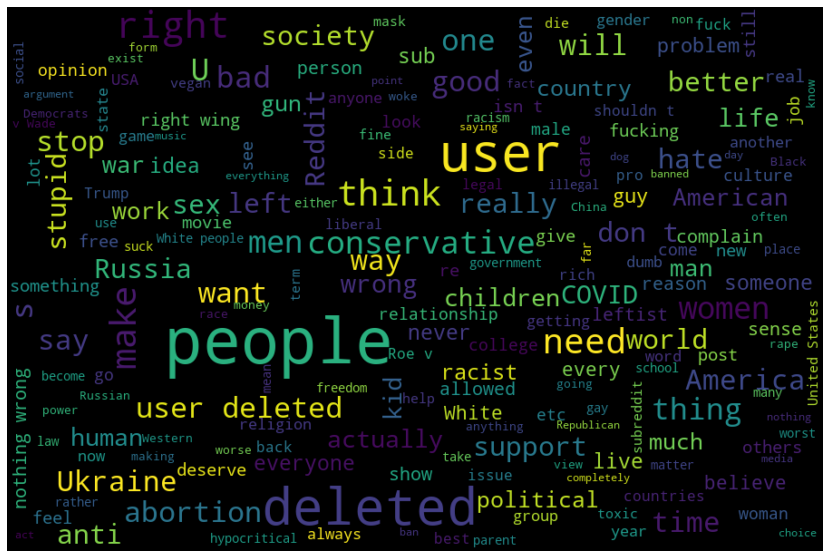

In [427]:
# Plot the Word Cloud
allWords = ' '.join( [word for word in all_titles] )
wordCloud = WordCloud(width = 900, height = 600, random_state = 21, max_font_size = 70).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [306]:
def sentimiento(texto):
    return sent_analyzer.predict(texto).output

In [308]:
a = sentimiento('Estoy contento.')
a

'NEU'

In [313]:
results_df_DOS['sentimiento'] = results_df_DOS['title'].apply(sentimiento)

In [324]:
b = results_df_DOS['sentimiento'].value_counts()

<AxesSubplot:title={'center':'Diagrama de barras - análisis de sentimiento'}, ylabel='nº de posts'>

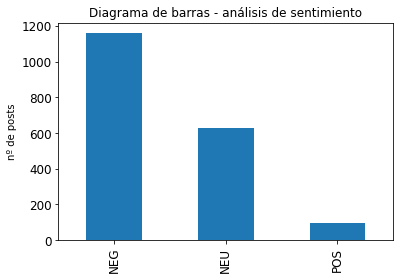

In [440]:
b.plot(figsize=(6,4), kind = 'bar', title = "Diagrama de barras - análisis de sentimiento", ylabel = "nº de posts", fontsize = 12)
#b.plot(kind = 'bar')

In [314]:
emo_analyzer = create_analyzer(task="emotion", lang="en")
hate_analyzer = create_analyzer(task="hate_speech", lang="en")

https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmpi1q2lk62


Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/tokenizer_config.json in cache at C:\Users\karel/.cache\huggingface\transformers\1740697312c59fe96586f476c7765cd6f08516a6102ea96f22ffee64f7553234.c260b44e952f7f2a825aac395f2ebbed4ac9553800d1e320af246e81a548f37c
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\1740697312c59fe96586f476c7765cd6f08516a6102ea96f22ffee64f7553234.c260b44e952f7f2a825aac395f2ebbed4ac9553800d1e320af246e81a548f37c
https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/config.json not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmp5kbyaau0


Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/config.json in cache at C:\Users\karel/.cache\huggingface\transformers\c246eed05359b1a49c45955b0265b488e35b0cbd2628e3ead7dd54c8815162ee.a2dff24b4e0a884c6d58a09968c5b68e7391e749eb698ad92541818d420fd01b
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\c246eed05359b1a49c45955b0265b488e35b0cbd2628e3ead7dd54c8815162ee.a2dff24b4e0a884c6d58a09968c5b68e7391e749eb698ad92541818d420fd01b
loading configuration file https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/config.json from cache at C:\Users\karel/.cache\huggingface\transformers\c246eed05359b1a49c45955b0265b488e35b0cbd2628e3ead7dd54c8815162ee.a2dff24b4e0a884c6d58a09968c5b68e7391e749eb698ad92541818d420fd01b
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/vocab.txt in cache at C:\Users\karel/.cache\huggingface\transformers\b7837213513a9f3852dcb04048f70c13cbd0590be030e534734ffd42cbdcf45a.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\b7837213513a9f3852dcb04048f70c13cbd0590be030e534734ffd42cbdcf45a.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmpmkfoz_ox


Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/bpe.codes in cache at C:\Users\karel/.cache\huggingface\transformers\76e357e2554ebe053d1c4c613506bc2cc19d66ae27fec8218261a7f73c6456b9.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\76e357e2554ebe053d1c4c613506bc2cc19d66ae27fec8218261a7f73c6456b9.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/added_tokens.json not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmpu84im3gf


Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/added_tokens.json in cache at C:\Users\karel/.cache\huggingface\transformers\c4b7522f44ed8adb95e62288c6458da591654f7466e3ce2f9c730bb4087411d2.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\c4b7522f44ed8adb95e62288c6458da591654f7466e3ce2f9c730bb4087411d2.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmpbypgzcnl


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/special_tokens_map.json in cache at C:\Users\karel/.cache\huggingface\transformers\01581144d9bf96cb9c7d8a77ee93c8b1f1095af5c1204b1b038a8cb0e3247aa8.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\01581144d9bf96cb9c7d8a77ee93c8b1f1095af5c1204b1b038a8cb0e3247aa8.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/vocab.txt from cache at C:\Users\karel/.cache\huggingface\transformers\b7837213513a9f3852dcb04048f70c13cbd0590be030e534734ffd42cbdcf45a.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
loading file https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/bpe.codes from cache at C:\Users\karel/.cache\huggingface\transformers\76e357e2554ebe053d1c4c613506bc2

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/pytorch_model.bin in cache at C:\Users\karel/.cache\huggingface\transformers\61c5894a0aca5ed63159e2ec6a5501db48124c1e6de287b82bc634334f031203.9c3c4c16d0dd174434d42471b9d4670734d982be506a06fc3111c12bee4380c7
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\61c5894a0aca5ed63159e2ec6a5501db48124c1e6de287b82bc634334f031203.9c3c4c16d0dd174434d42471b9d4670734d982be506a06fc3111c12bee4380c7
loading weights file https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis/resolve/main/pytorch_model.bin from cache at C:\Users\karel/.cache\huggingface\transformers\61c5894a0aca5ed63159e2ec6a5501db48124c1e6de287b82bc634334f031203.9c3c4c16d0dd174434d42471b9d4670734d982be506a06fc3111c12bee4380c7
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint 

Downloading:   0%|          | 0.00/335 [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/tokenizer_config.json in cache at C:\Users\karel/.cache\huggingface\transformers\9eec04ca3ab9bdc071fafcf37e270203d932078b7715016c2df05a0f3bd1bf07.7cf9bfd7af087e7e2ea689b159647c3c8a45e7f0b92609dce7bca18d806905da
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\9eec04ca3ab9bdc071fafcf37e270203d932078b7715016c2df05a0f3bd1bf07.7cf9bfd7af087e7e2ea689b159647c3c8a45e7f0b92609dce7bca18d806905da
https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmp4ov9ms0j


Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/vocab.txt in cache at C:\Users\karel/.cache\huggingface\transformers\af97f2d33aa35c368f65a032c5f6b065e8b88d9bdef502fbc2ce78e04579a0fa.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\af97f2d33aa35c368f65a032c5f6b065e8b88d9bdef502fbc2ce78e04579a0fa.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmpp9x4v4en


Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/bpe.codes in cache at C:\Users\karel/.cache\huggingface\transformers\c50391b2daa6a8c1be706382b1cd8d7f4996b5664c2a0bbab6c15097305ae731.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\c50391b2daa6a8c1be706382b1cd8d7f4996b5664c2a0bbab6c15097305ae731.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/added_tokens.json not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmpyw_j_9ve


Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/added_tokens.json in cache at C:\Users\karel/.cache\huggingface\transformers\8715836fc39b559eca950b73d5a4651bf34ab8d3acb1d0b81aae6d76e1a38fac.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\8715836fc39b559eca950b73d5a4651bf34ab8d3acb1d0b81aae6d76e1a38fac.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to C:\Users\karel\.cache\huggingface\transformers\tmp_e707zbu


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/special_tokens_map.json in cache at C:\Users\karel/.cache\huggingface\transformers\fdf2edf9c4b32d36848f3a7f4b9edd83fe65a7caa032a01e30f72cd87b62affc.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\fdf2edf9c4b32d36848f3a7f4b9edd83fe65a7caa032a01e30f72cd87b62affc.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/vocab.txt from cache at C:\Users\karel/.cache\huggingface\transformers\af97f2d33aa35c368f65a032c5f6b065e8b88d9bdef502fbc2ce78e04579a0fa.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
loading file https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/bpe.codes from cache at C:\Users\karel/.cache\huggingface\transformers\c50391b2daa6a8c1be706382b1cd8d7f4996b5664c2a0bbab6c15097305ae731

Downloading:   0%|          | 0.00/980 [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/config.json in cache at C:\Users\karel/.cache\huggingface\transformers\0c8f98b89844cfd90c61b9671ab81f30f6d2ffd807131275cc3d9fa6c8061b04.92562558566fffb3ff2db6e6250351c34cb7206924b30d0b25bc6447925d32c1
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\0c8f98b89844cfd90c61b9671ab81f30f6d2ffd807131275cc3d9fa6c8061b04.92562558566fffb3ff2db6e6250351c34cb7206924b30d0b25bc6447925d32c1
loading configuration file https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/config.json from cache at C:\Users\karel/.cache\huggingface\transformers\0c8f98b89844cfd90c61b9671ab81f30f6d2ffd807131275cc3d9fa6c8061b04.92562558566fffb3ff2db6e6250351c34cb7206924b30d0b25bc6447925d32c1
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/bertweet-hate-speech",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "c

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

storing https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/pytorch_model.bin in cache at C:\Users\karel/.cache\huggingface\transformers\b1b28641afa821c55bf1216f931286a1e2d6f2bdf6ce43893b82fd118ff62542.742154f1fb0df2aeaab5e0f8ce81baeb42a062ffddff7febde2369888239bf57
creating metadata file for C:\Users\karel/.cache\huggingface\transformers\b1b28641afa821c55bf1216f931286a1e2d6f2bdf6ce43893b82fd118ff62542.742154f1fb0df2aeaab5e0f8ce81baeb42a062ffddff7febde2369888239bf57
loading weights file https://huggingface.co/pysentimiento/bertweet-hate-speech/resolve/main/pytorch_model.bin from cache at C:\Users\karel/.cache\huggingface\transformers\b1b28641afa821c55bf1216f931286a1e2d6f2bdf6ce43893b82fd118ff62542.742154f1fb0df2aeaab5e0f8ce81baeb42a062ffddff7febde2369888239bf57
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at pysentimiento/bertw

In [315]:
def emocion(texto):
    return emo_analyzer.predict(texto).output

In [316]:
def hate(texto):
    return hate_analyzer.predict(texto).output

In [317]:
results_df_DOS['emocion'] = results_df_DOS['selftext'].apply(emocion)

In [318]:
results_df_DOS['emocion']

0       disgust
1       disgust
2        others
3       disgust
4       disgust
         ...   
1876     others
1877    disgust
1878     others
1879    disgust
1880     others
Name: emocion, Length: 1881, dtype: object

In [320]:
results_df_DOS['emocion'].unique()

array(['disgust', 'others', 'anger', 'sadness', 'fear', 'joy'],
      dtype=object)

In [321]:
a = results_df_DOS['emocion'].value_counts()

<AxesSubplot:title={'center':'Diagrama de barras - análisis de emoción'}, ylabel='nº de posts'>

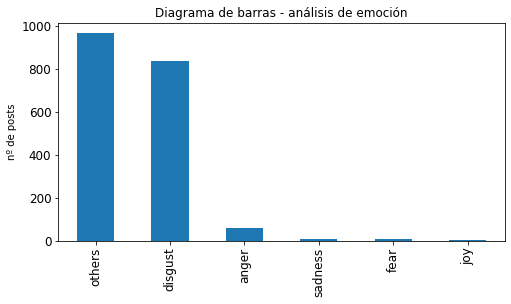

In [437]:
#plt.figure( figsize=(20,10) )
a.plot(figsize=(8,4), kind = 'bar', title = "Diagrama de barras - análisis de emoción", ylabel = "nº de posts", fontsize = 12)

In [436]:
?a.plot

In [392]:
results_df_DOS['hate'] = results_df_DOS['selftext'].apply(hate)

In [393]:
c = results_df_DOS['hate'].value_counts()

In [428]:
c   # Análisis de discurso de odio. Vemos que no aporta mucha información, la gran mayoría no los clasifica como tales.

[]                                 1768
[hateful]                            84
[hateful, aggressive]                21
[hateful, targeted]                   5
[hateful, targeted, aggressive]       3
Name: hate, dtype: int64

In [ ]:
x = ['none', 'hateful', 'hateful, aggressive', 'hateful, targeted', 'hateful, targeted, aggressive']
y = [1768, 84, 21, 5, 3]

AttributeError: 'Series' object has no attribute 'figure'

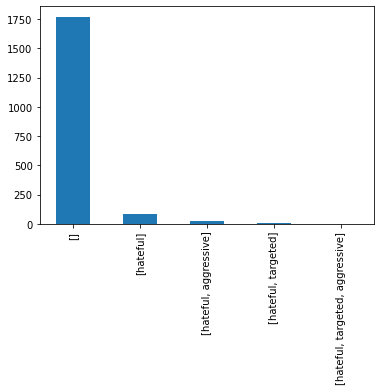

In [334]:
# Este da resultados menos interesantes, o menos informativos por lo menos.

c.plot(kind = 'bar')
c.figure.savefig("test.jpg")

In [391]:
results_df_DOS['hate'] = str(results_df_DOS['hate'])

x = results_df_DOS['hate']
type(results_df_DOS['hate'][0])#.unique()
#y = results_df_DOS['hate'].value_counts()
#y = results_df_DOS['hate'].value_counts()
type(results_df_DOS['sentimiento'][0])

0       0       0       0       0              []\n1  ...
1       0       0       0       0              []\n1  ...
2       0       0       0       0              []\n1  ...
3       0       0       0       0              []\n1  ...
4       0       0       0       0              []\n1  ...
                              ...                        
1876    0       0       0       0              []\n1  ...
1877    0       0       0       0              []\n1  ...
1878    0       0       0       0              []\n1  ...
1879    0       0       0       0              []\n1  ...
1880    0       0       0       0              []\n1  ...
Name: hate, Length: 1881, dtype: object

In [371]:
c

[]                                 1768
[hateful]                            84
[hateful, aggressive]                21
[hateful, targeted]                   5
[hateful, targeted, aggressive]       3
Name: hate, dtype: int64

In [388]:
d = c[c == 1768]

In [389]:
d.name

'hate'